### HOUSING: PRICE PREDICTION


#### Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:


- Which variables are important to predict the price of variable?

- How do these variables describe the price of the house?

#### Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

#### Technical Requirements:

- Data contains 1460 entries each having 81 variables.
- Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
- Extensive EDA has to be performed to gain relationships of important variable and price.
- Data contains numerical as well as categorical variable. You need to handle them accordingly.
- You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper 
Parameters. 
- You need to find important features which affect the price positively or negatively.
- Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on 
test.csv file.
The “Data file.csv” and “Data description.txt” are enclosed with this file

In [1]:
#Importing Necessory Libraries:

import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#Preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import zscore

#Model Creation :
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

#Metrics:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
path=r"C:\Users\HP\Downloads\Project-Housing--2-\train.csv"
train=pd.read_csv(path)
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

- train dataset is containing 81 columns out of which SalePrice column is the label variable. Hence it is a Regression type of problem.
- This dataset is a good blend of numrical,categorical and nominal data.
- As we can se there are missing values present in some columns. 

In [3]:
path=r"C:\Users\HP\Downloads\test.csv"
test=pd.read_csv(path)
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

- test dataset is containing 80 columns and as there is no label variable, we will use it for prediction purpose.
- This dataset is also a good blend of numrical,categorical and nominal data.
- As we can se there are missing values present in some columns, we need to treat them as well. 

In [4]:
train.shape

(1168, 81)

- train dataset is containing 1168 rows and 81 columns

In [5]:
test.shape

(292, 80)

- test dataset is containing 292 rows and 80 columns.

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

- There are the column names those are present in train dataset.

In [7]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

- There are the column names those are present in test dataset. And the Label variable is absent in this dataset.

In [8]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

- As we can see there missing value present in some columns in this dataset.

In [9]:
test.isna().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

- As we can see there missing value present in some columns in this dataset also.

<AxesSubplot:>

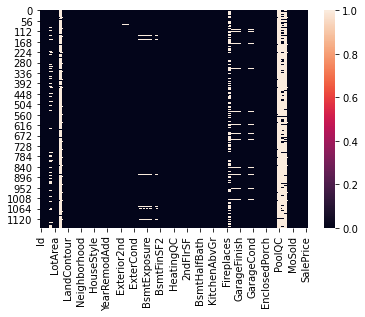

In [10]:
sns.heatmap(train.isnull())

- As we can see some festures are having null values in train dataset.

<AxesSubplot:>

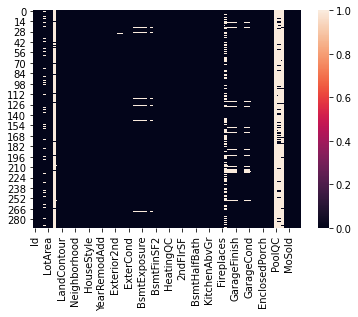

In [11]:
sns.heatmap(test.isnull())

- Both the train And test datasets are having missing values that we need to get rid off.

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

- This dataset is good blend of numerical, categorical and nominal data.
- Missing values are present in columns like LotFrontage, Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature.

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

- This dataset is good blend of numerical, categorical and nominal data.
- Missing values are present in columns like LotFrontage, Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1,Electrical, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, Fence, MiscFeature. PoolQC is having only 0 values that we need to deal with.

In [14]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 43
Numerical Features in Train Set: 38


In [15]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 42
Numerical Features in Train Set: 38


In [16]:
train.describe().T

count           mean           std      min        25%  \
Id             1168.0     724.136130    416.159877      1.0     360.50   
MSSubClass     1168.0      56.767979     41.940650     20.0      20.00   
LotFrontage     954.0      70.988470     24.828750     21.0      60.00   
LotArea        1168.0   10484.749144   8957.442311   1300.0    7621.50   
OverallQual    1168.0       6.104452      1.390153      1.0       5.00   
OverallCond    1168.0       5.595890      1.124343      1.0       5.00   
YearBuilt      1168.0    1970.930651     30.145255   1875.0    1954.00   
YearRemodAdd   1168.0    1984.758562     20.785185   1950.0    1966.00   
MasVnrArea     1161.0     102.310078    182.595606      0.0       0.00   
BsmtFinSF1     1168.0     444.726027    462.664785      0.0       0.00   
BsmtFinSF2     1168.0      46.647260    163.520016      0.0       0.00   
BsmtUnfSF      1168.0     569.721747    449.375525      0.0     216.00   
TotalBsmtSF    1168.0    1061.095034    442.272249      0.0     799.00   
1stFlrSF       1168.0    1169.860445    391.161983    334.0     892.00   
2ndFlrSF       1168.0     348.826199    439.696370      0.0       0.00   
LowQualFinSF   1168.0       6.380137     50.892844      0.0       0.00   
GrLivArea      1168.0    1525.066781    528.042957    334.0    1143.25   
BsmtFullBath   1168.0       0.425514      0.521615      0.0       0.00   
BsmtHalfBath   1168.0       0.055651      0.236699      0.0       0.00   
FullBath       1168.0       1.562500      0.551882      0.0       1.00   
HalfBath       1168.0       0.388699      0.504929      0.0       0.00   
BedroomAbvGr   1168.0       2.884418      0.817229      0.0       2.00   
KitchenAbvGr   1168.0       1.045377      0.216292      0.0       1.00   
TotRmsAbvGrd   1168.0       6.542808      1.598484      2.0       5.00   
Fireplaces     1168.0       0.617295      0.650575      0.0       0.00   
GarageYrBlt    1104.0    1978.193841     24.890704   1900.0    1961.00   
GarageCars     1168.0       1.776541      0.745554      0.0       1.00   
GarageArea     1168.0     476.860445    214.466769      0.0     338.00   
WoodDeckSF     1168.0      96.206336    126.158988      0.0       0.00   
OpenPorchSF    1168.0      46.559932     66.381023      0.0       0.00   
EnclosedPorch  1168.0      23.015411     63.191089      0.0       0.00   
3SsnPorch      1168.0       3.639555     29.088867      0.0       0.00   
ScreenPorch    1168.0      15.051370     55.080816      0.0       0.00   
PoolArea       1168.0       3.448630     44.896939      0.0       0.00   
MiscVal        1168.0      47.315068    543.264432      0.0       0.00   
MoSold         1168.0       6.344178      2.686352      1.0       5.00   
YrSold         1168.0    2007.804795      1.329738   2006.0    2007.00   
SalePrice      1168.0  181477.005993  79105.586863  34900.0  130375.00   

                    50%       75%       max  
Id                714.5    1079.5    1460.0  
MSSubClass         50.0      70.0     190.0  
LotFrontage        70.0      80.0     313.0  
LotArea          9522.5   11515.5  164660.0  
OverallQual         6.0       7.0      10.0  
OverallCond         5.0       6.0       9.0  
YearBuilt        1972.0    2000.0    2010.0  
YearRemodAdd     1993.0    2004.0    2010.0  
MasVnrArea          0.0     160.0    1600.0  
BsmtFinSF1        385.5     714.5    5644.0  
BsmtFinSF2          0.0       0.0    1474.0  
BsmtUnfSF         474.0     816.0    2336.0  
TotalBsmtSF      1005.5    1291.5    6110.0  
1stFlrSF         1096.5    1392.0    4692.0  
2ndFlrSF            0.0     729.0    2065.0  
LowQualFinSF        0.0       0.0     572.0  
GrLivArea        1468.5    1795.0    5642.0  
BsmtFullBath        0.0       1.0       3.0  
BsmtHalfBath        0.0       0.0       2.0  
FullBath            2.0       2.0       3.0  
HalfBath            0.0       1.0       2.0  
BedroomAbvGr        3.0       3.0       8.0  
KitchenAbvGr        1.0       1.0       3.0  
TotRmsAbvGrd        6.0  

- Missing values are present in columns like LotFrontage, Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature.
- On comparing the mean and the std it can be made out that there are some unusual distribution which hints at skewness in the continuous data. 
- The highest value in the SalePrice (target) column is 755000 that is maximum price. 
- Some variables are having discrete data because they are containing categories.
- It can also be seen that some of the columns are containing continuous data.
- As it also contains years columns like - ""YearBuilt","YearRemodAdd", "GarageYrBlt", "YrSold"
- It also conatains an id column which is not going to contribute in the model bulding / analysis part so it has to be dropped. 

In [17]:
test.describe().T

count          mean           std     min      25%     50%  \
Id             292.0    755.955479    442.565228     6.0   377.75   778.0   
MSSubClass     292.0     57.414384     43.780649    20.0    20.00    50.0   
LotFrontage    247.0     66.425101     21.726343    21.0    53.50    65.0   
LotArea        292.0  10645.143836  13330.669795  1526.0  7200.00  9200.0   
OverallQual    292.0      6.078767      1.356147     3.0     5.00     6.0   
OverallCond    292.0      5.493151      1.063267     3.0     5.00     5.0   
YearBuilt      292.0   1972.616438     30.447016  1872.0  1954.00  1976.0   
YearRemodAdd   292.0   1985.294521     20.105792  1950.0  1968.00  1994.0   
MasVnrArea     291.0    109.171821    175.030021     0.0     0.00     0.0   
BsmtFinSF1     292.0    439.294521    429.559675     0.0     0.00   369.5   
BsmtFinSF2     292.0     46.157534    152.467119     0.0     0.00     0.0   
BsmtUnfSF      292.0    557.315068    411.043768     0.0   255.00   487.0   
TotalBsmtSF    292.0   1042.767123    424.561153     0.0   771.75   971.0   
1stFlrSF       292.0   1133.691781    366.941919   372.0   858.00  1047.5   
2ndFlrSF       292.0    339.657534    424.278825     0.0     0.00     0.0   
LowQualFinSF   292.0      3.702055     38.219527     0.0     0.00     0.0   
GrLivArea      292.0   1477.051370    514.199429   520.0  1061.50  1440.0   
BsmtFullBath   292.0      0.424658      0.508831     0.0     0.00     0.0   
BsmtHalfBath   292.0      0.065068      0.247070     0.0     0.00     0.0   
FullBath       292.0      1.575342      0.547856     0.0     1.00     2.0   
HalfBath       292.0      0.359589      0.494795     0.0     0.00     0.0   
BedroomAbvGr   292.0      2.794521      0.807336     0.0     2.00     3.0   
KitchenAbvGr   292.0      1.051370      0.236160     1.0     1.00     1.0   
TotRmsAbvGrd   292.0      6.417808      1.728105     3.0     5.00     6.0   
Fireplaces     292.0      0.595890      0.621259     0.0     0.00     1.0   
GarageYrBlt    275.0   1979.760000     23.868875  1916.0  1964.00  1979.0   
GarageCars     292.0      1.729452      0.754430     0.0     1.00     2.0   
GarageArea     292.0    457.458904    210.785591     0.0   300.00   467.5   
WoodDeckSF     292.0     86.397260    121.898836     0.0     0.00     0.0   
OpenPorchSF    292.0     47.061644     65.865449     0.0     0.00    28.5   
EnclosedPorch  292.0     17.708904     51.892906     0.0     0.00     0.0   
3SsnPorch      292.0      2.489726     30.247488     0.0     0.00     0.0   
ScreenPorch    292.0     15.099315     58.483473     0.0     0.00     0.0   
PoolArea       292.0      0.000000      0.000000     0.0     0.00     0.0   
PoolQC           0.0           NaN           NaN     NaN      NaN     NaN   
MiscVal        292.0     28.184932    224.036218     0.0     0.00     0.0   
MoSold         292.0      6.232877      2.774556     1.0     4.00     6.0   
YrSold         292.0   2007.859589      1.322867  2006.0  2007.00  2008.0   

                    75%       max  
Id              1152.25    1456.0  
MSSubClass        70.00     190.0  
LotFrontage       79.00     150.0  
LotArea        11658.75  215245.0  
OverallQual        7.00      10.0  
OverallCond        6.00       9.0  
YearBuilt       2001.00    2009.0  
YearRemodAdd    2003.25    2010.0  
MasVnrArea       180.00    1031.0  
BsmtFinSF1       700.50    1767.0  
BsmtFinSF2         0.00    1085.0  
BsmtUnfSF        780.00    1935.0  
TotalBsmtSF     1322.00    3094.0  
1stFlrSF        1370.50    2402.0  
2ndFlrSF         717.00    1589.0  
LowQualFinSF       0.00     479.0  
GrLivArea       1720.25    3447.0  
BsmtFullBath       1.00       2.0  
BsmtHalfBath       0.00       1.0  
FullBath           2.00       3.0  
HalfBath           1.00       2.0  
BedroomAbvGr       3.00       6.0  
KitchenAbvGr       1.00       3.0  
TotRmsAbvGrd       7.00      12.0  
Fireplaces         1.00       2.0  
GarageYrBlt     2003.00    2010.0  
GarageCars         2.00       4.0  
Gar

- Missing values are present in columns like LotFrontage, Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1,Electrical, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, Fence, MiscFeature. 
- PoolQC is having only 0 values that we need to deal with.
- On comparing the mean and the std it can be made out that there are some unusual distribution which hints at skewness in the continuous data. 
- Some variables are having discrete data because they are containing categories.
- It can also be seen that some of the columns are containing continuous data.
- As it also contains years columns like - "YearBuilt","YearRemodAdd", "GarageYrBlt", "YrSold"
- It also conatains an id column which is not going to contribute in the model prediction.Hence, we will drop it.

#### Exploratory Data Analysis:

We will do Univariate Analysis to understand the distribution of continuous features and count of the categorical features. Then we will do Bivariate Analysis to understand relation between feature vs target and feature vs feature. After that we will do multivariate Analysis to check multicolinearity and correlation.
Let's do that:

#### Univariate Analysis:

It is done to understand the distribution of the continuous data and also to get the count of the categorial data. But in this dataset there is no column which is containing float or continuous data. Hence we are only checking the count in univariate analysis.


In [7]:
# only taking the continuous features:
train_features=train[['MSSubClass','LotFrontage', 'LotArea', 'OverallQual','OverallCond',
                   'YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1',
                   'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
                   'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                  'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','WoodDeckSF','OpenPorchSF',
                  'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice']]

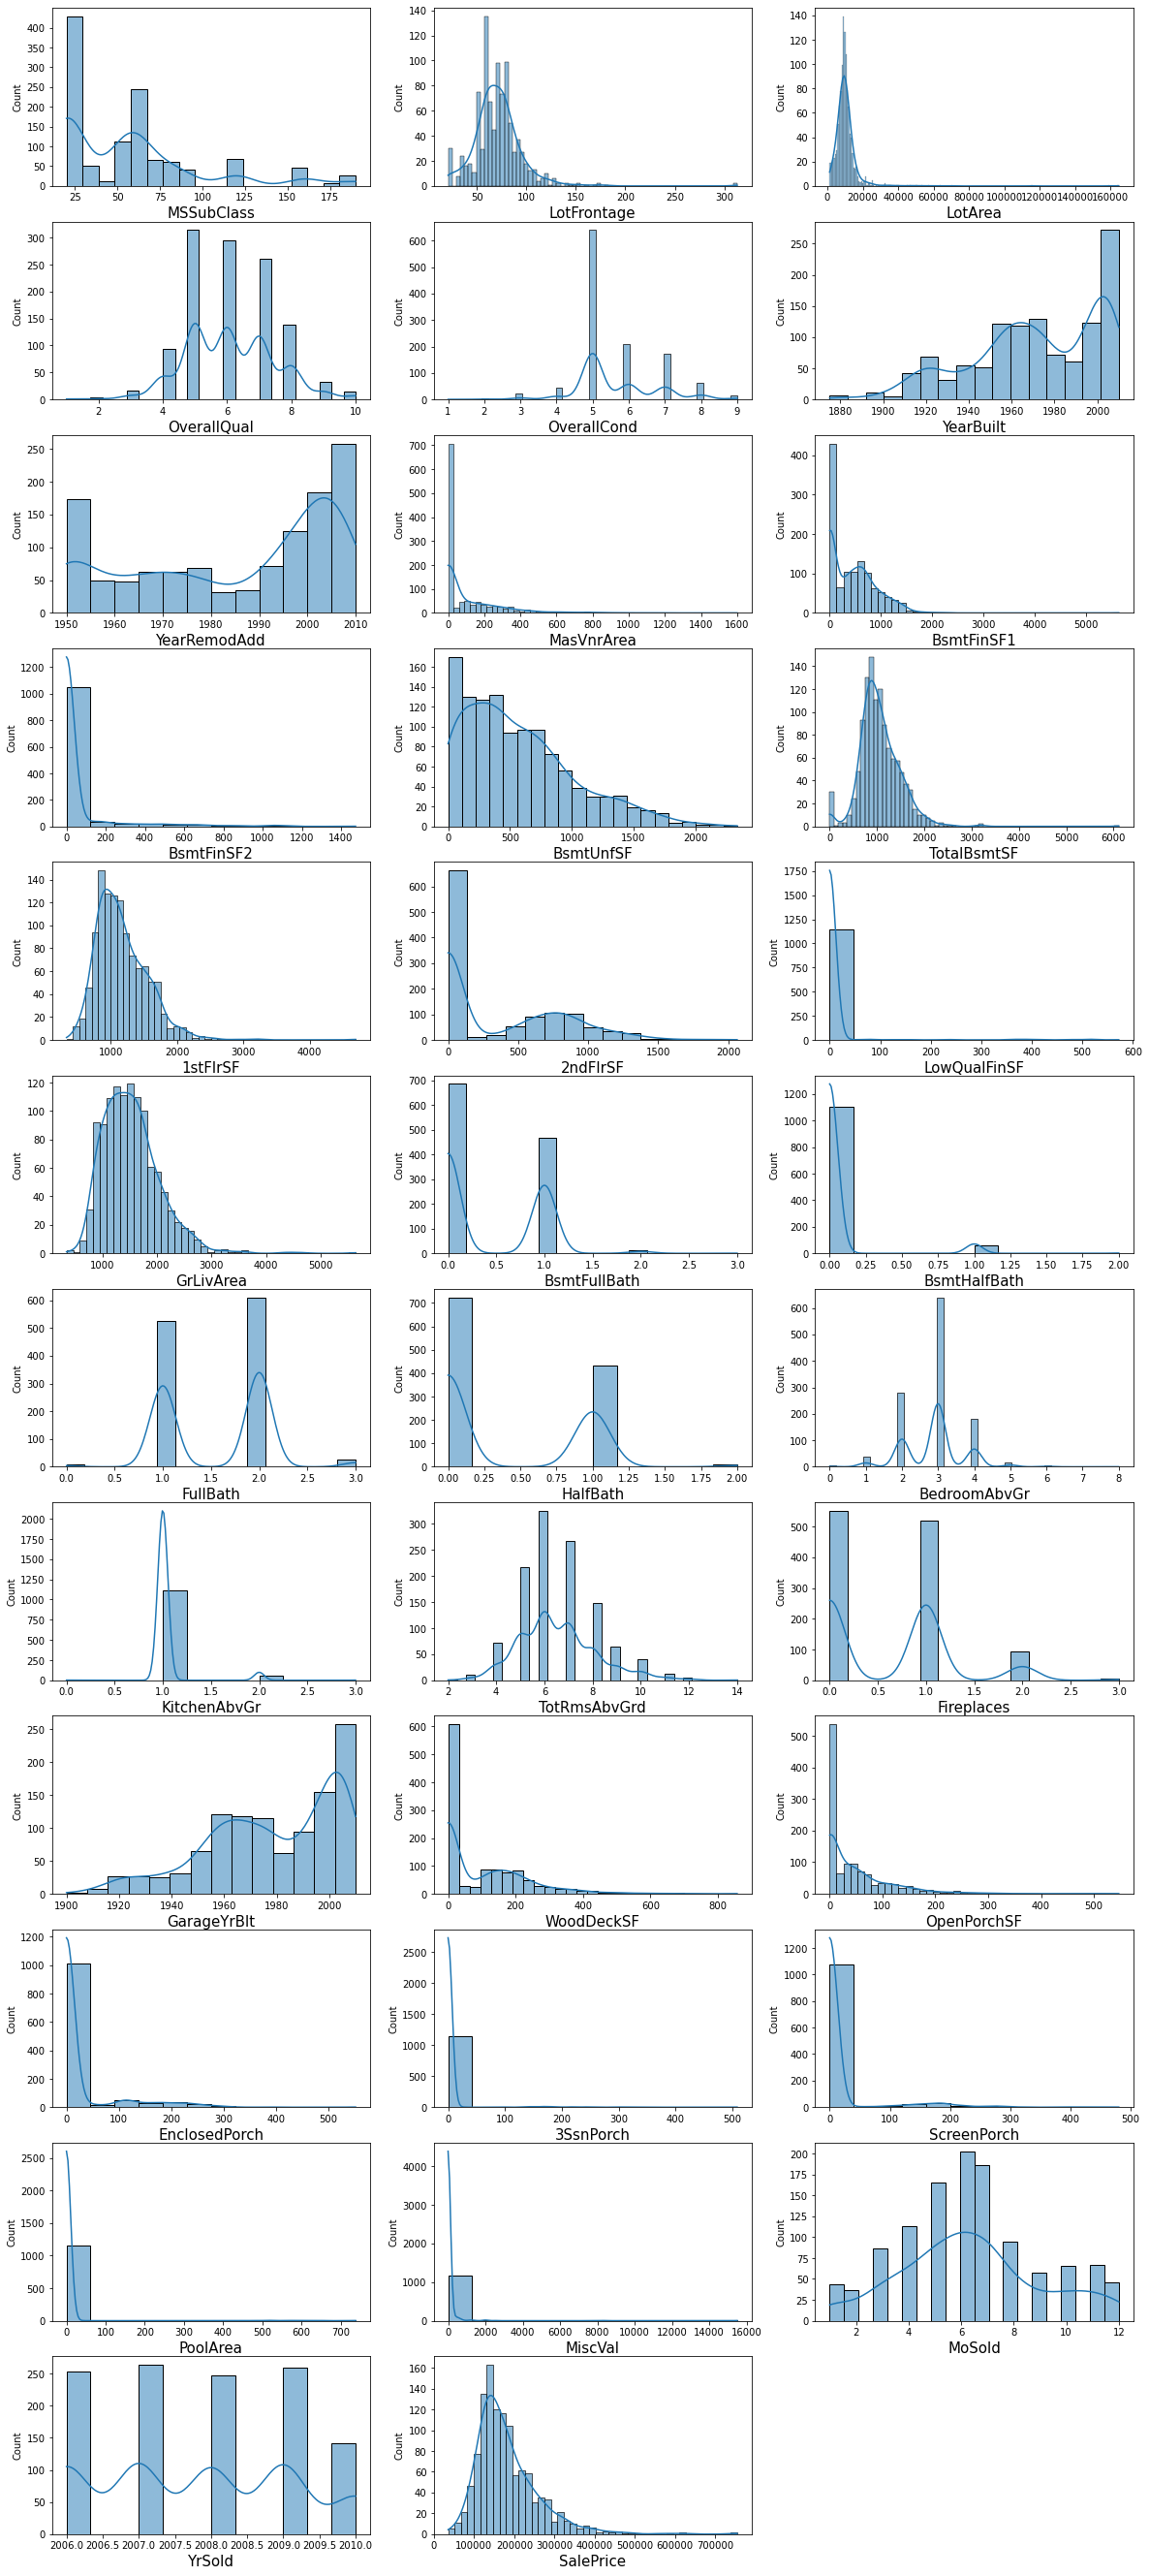

In [31]:
plt.figure(figsize=(20,52))
plotnumber=1
for column in train_features:
    if plotnumber<=38:
        ax=plt.subplot(13,3,plotnumber)
        sns.histplot(train_features[column],kde=True)
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show() 

- As we can see there are skewness present in the features. Those features are 'MSSubClass','LotArea','MasVnrArea','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal'.
- There are categorical columns as well like,MSSubClass, YrSold, MoSold, TotRmsAbvGrd etc.

In [32]:
cat_data_train= [columns for columns in train.columns if train[columns].dtype=='O'] #as 'O' is genearlly associated with the object data type, so its easier to get all the columns having object data type together. 
cat_data_train

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

- These columns of train dataset are containing nominal data. That we need to visualize. Let's do it.

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

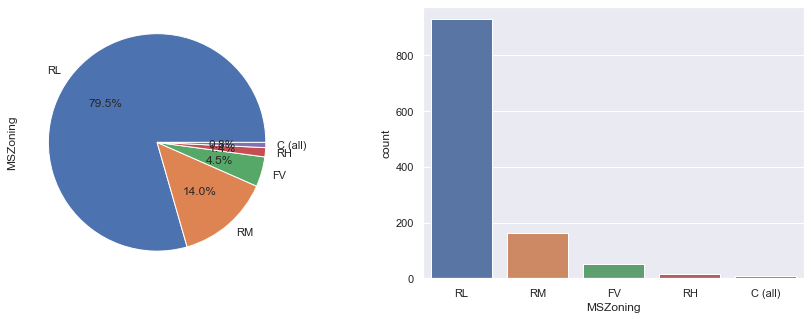

In [33]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
train['MSZoning'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['MSZoning'])
train['MSZoning'].value_counts()

- The general zoning classification is showing 5 categories out of which RL category is highest in count.

Pave    1164
Grvl       4
Name: Street, dtype: int64

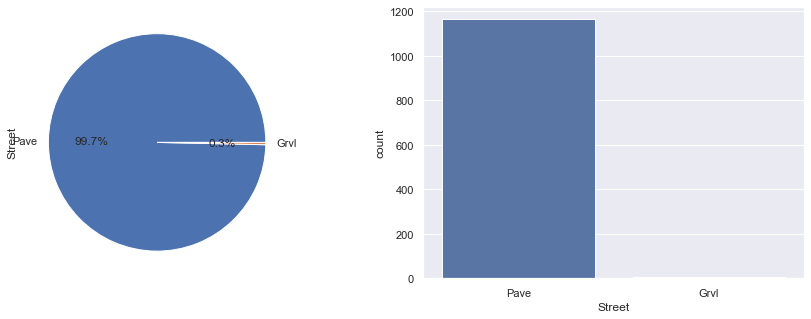

In [34]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
train['Street'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['Street'])
train['Street'].value_counts()

- Pave is the main type of road access.

Grvl    41
Pave    36
Name: Alley, dtype: int64

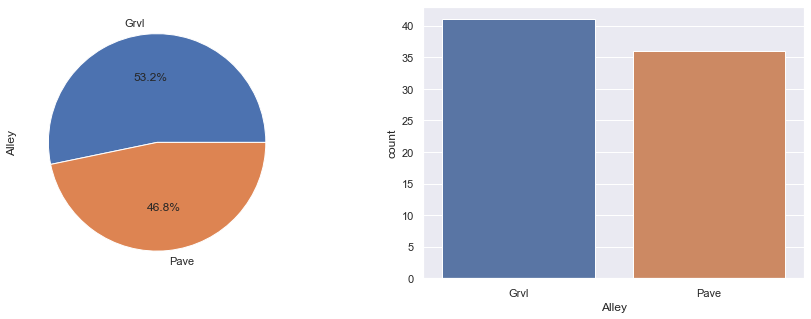

In [35]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
train['Alley'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['Alley'])
train['Alley'].value_counts()

- Grvl and pave are the types of Alley. Where Gvrl is more in counts 41.

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64

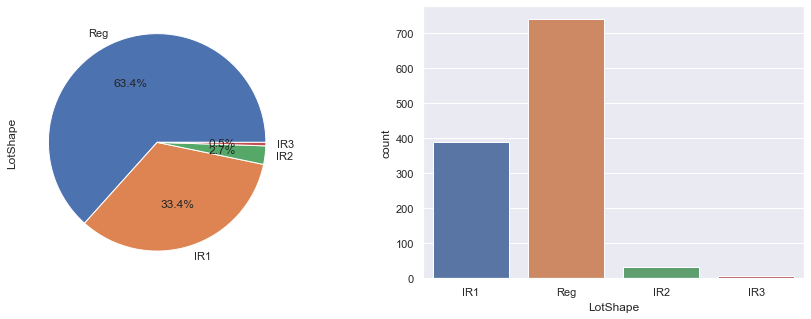

In [36]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
train['LotShape'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['LotShape'])
train['LotShape'].value_counts()

- Reguler shape of the property is highest in count 740 (63%) .

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64

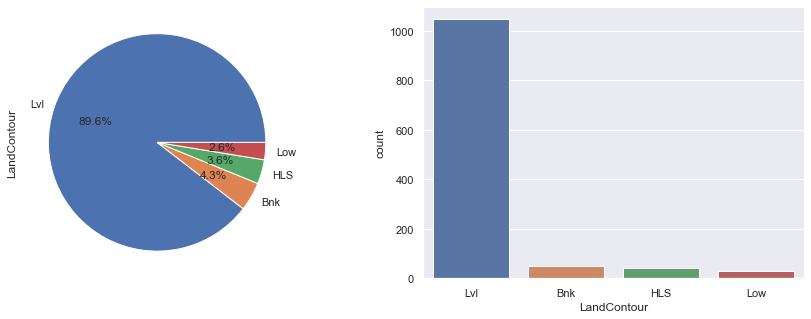

In [37]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
train['LandContour'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['LandContour'])
train['LandContour'].value_counts()

- Most of the properties are having Leveled flatness. As it counts highest 1046 (89.6%).

AllPub    1168
Name: Utilities, dtype: int64

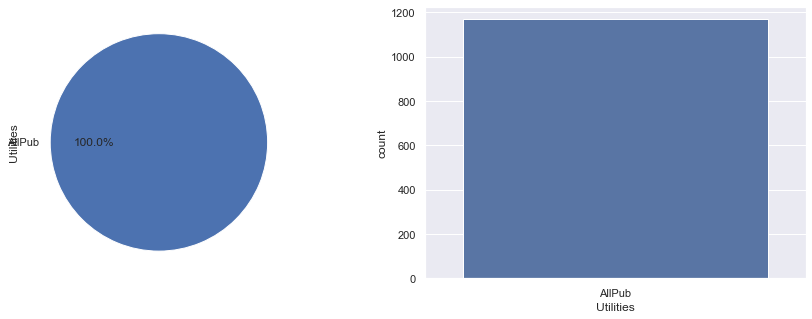

In [38]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
train['Utilities'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['Utilities'])
train['Utilities'].value_counts()

- According to  utilities availablity all properties are public.

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64

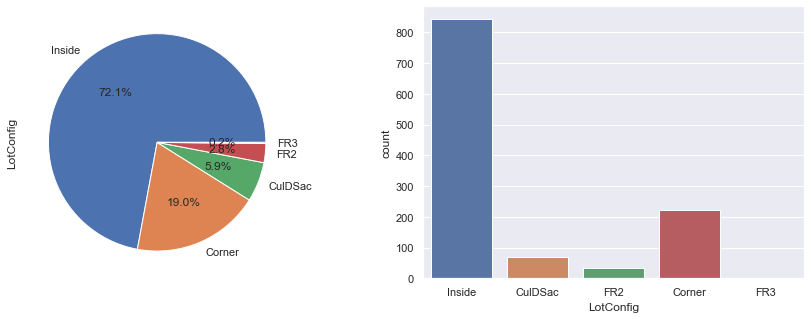

In [39]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
train['LotConfig'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['LotConfig'])
train['LotConfig'].value_counts()

- The highest count of Lot configuration is Inside (842).

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64

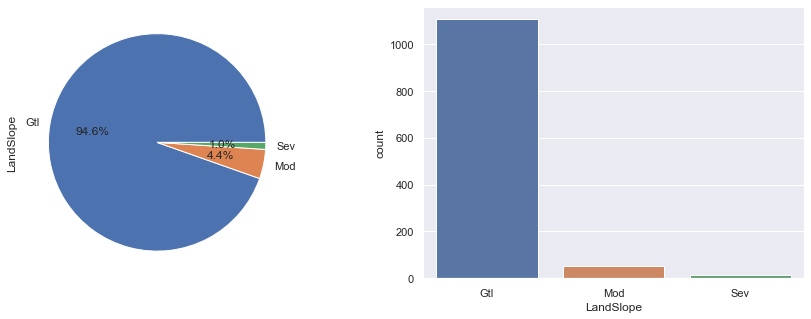

In [40]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
train['LandSlope'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['LandSlope'])
train['LandSlope'].value_counts()

- The type of Slope of properties that is highest Gtl (1105) .

NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
ClearCr     24
Timber      24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64

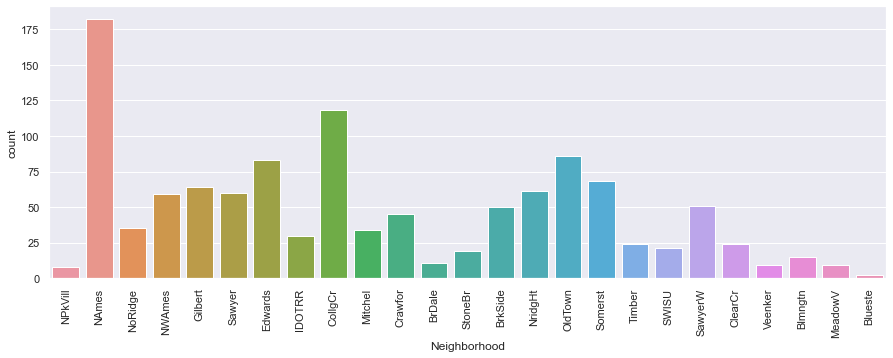

In [43]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(train['Neighborhood'])
plt.xticks(rotation=90)
train['Neighborhood'].value_counts()

- Highest count of physical locations within Ames city limits is NAmes.

Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64

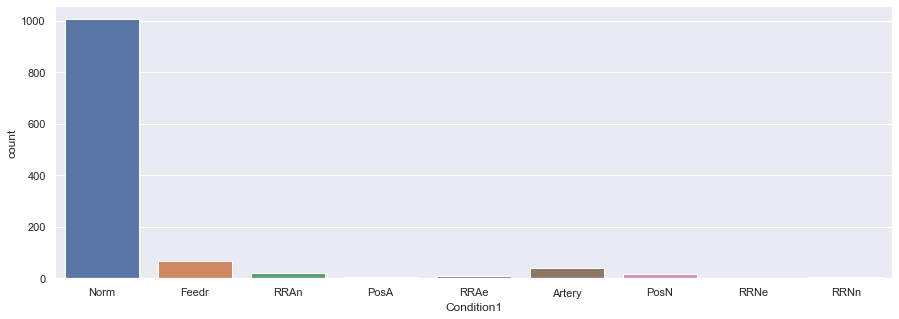

In [92]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(train['Condition1'])
train['Condition1'].value_counts()

Norm      1154
Feedr        6
PosN         2
Artery       2
RRNn         1
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64

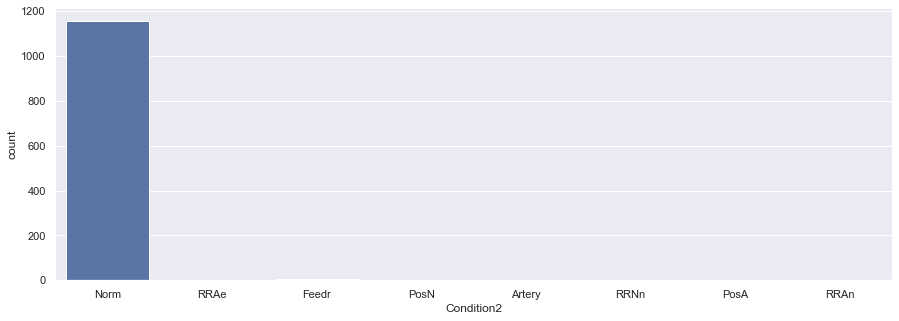

In [46]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(train['Condition2'])
train['Condition2'].value_counts()

1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64

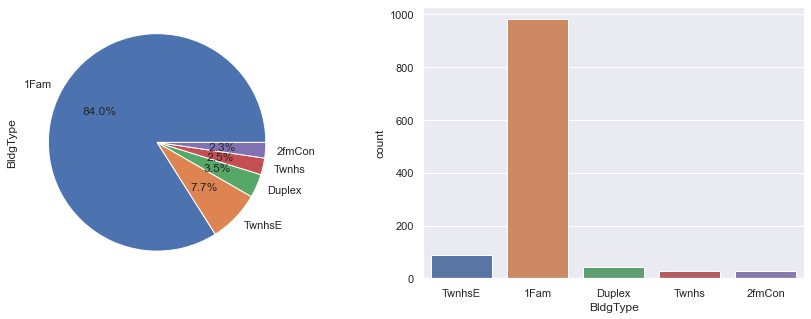

In [47]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
train['BldgType'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['BldgType'])
train['BldgType'].value_counts()

1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64

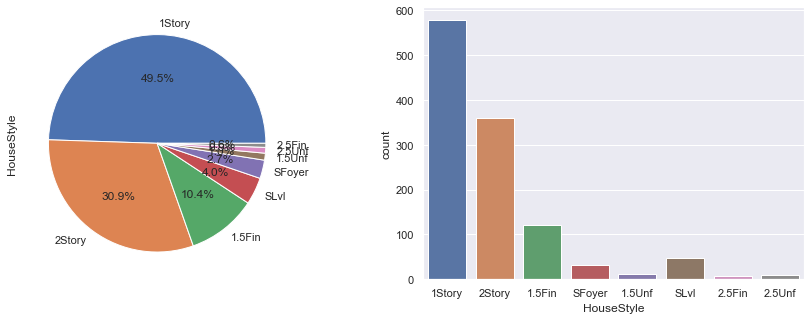

In [48]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
train['HouseStyle'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['HouseStyle'])
train['HouseStyle'].value_counts()

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64

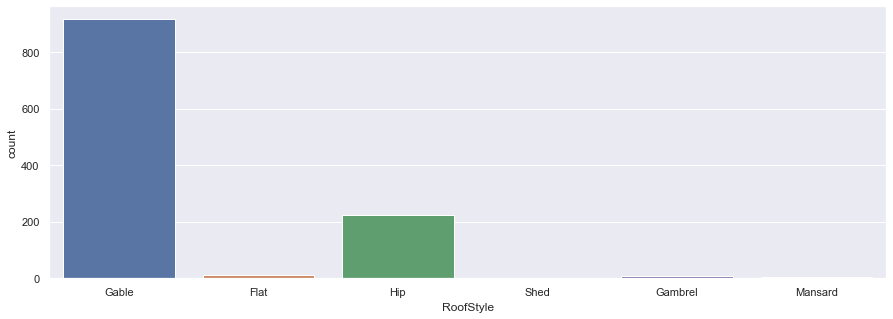

In [50]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(train['RoofStyle'])
train['RoofStyle'].value_counts()

CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
Roll          1
ClyTile       1
Metal         1
Membran       1
Name: RoofMatl, dtype: int64

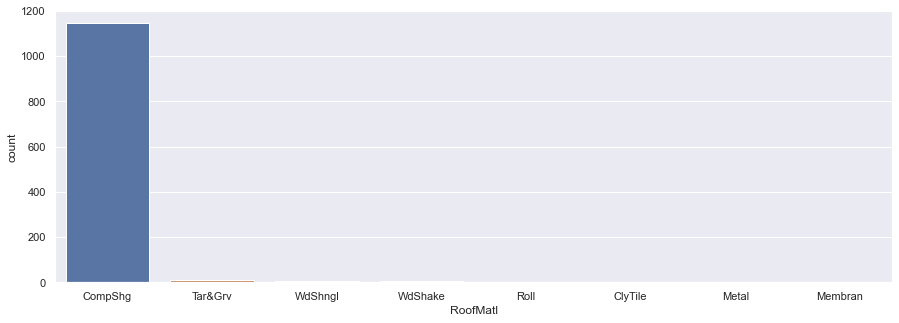

In [52]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(train['RoofMatl'])
train['RoofMatl'].value_counts()

VinylSd    396
HdBoard    179
MetalSd    178
Wd Sdng    174
Plywood     93
CemntBd     42
BrkFace     41
Stucco      22
WdShing     19
AsbShng     19
Stone        2
ImStucc      1
BrkComm      1
AsphShn      1
Name: Exterior1st, dtype: int64

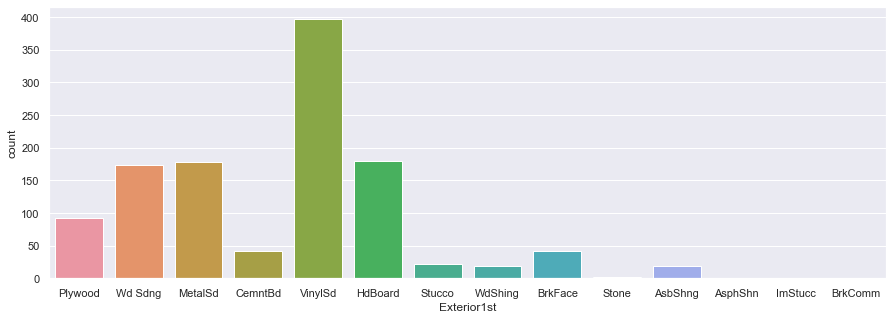

In [54]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(train['Exterior1st'])
train['Exterior1st'].value_counts()

VinylSd    387
MetalSd    173
HdBoard    170
Wd Sdng    165
Plywood    118
CmentBd     42
Wd Shng     31
Stucco      23
BrkFace     20
AsbShng     18
ImStucc      8
Brk Cmn      5
Stone        4
AsphShn      3
Other        1
Name: Exterior2nd, dtype: int64

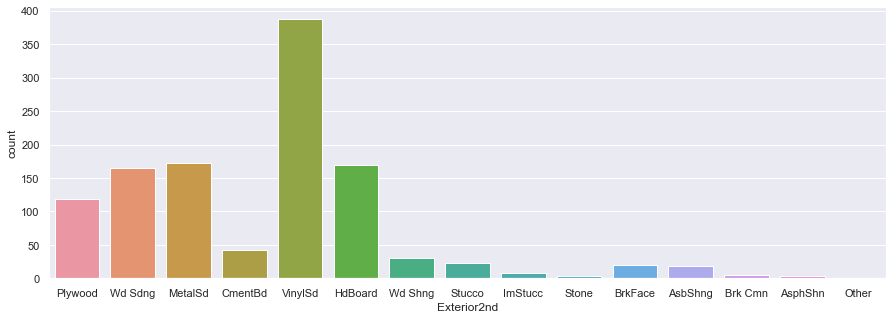

In [56]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(train['Exterior2nd'])
train['Exterior2nd'].value_counts()

None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

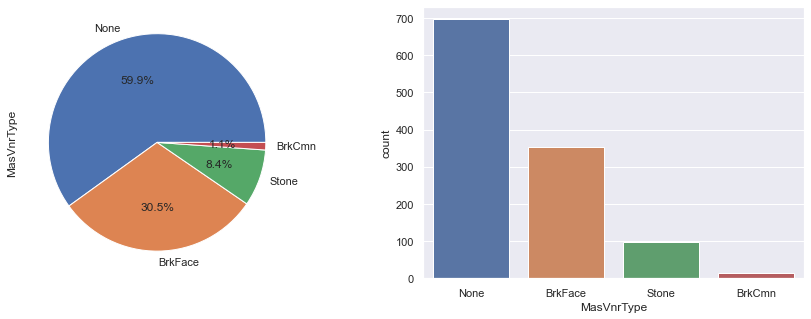

In [57]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
train['MasVnrType'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['MasVnrType'])
train['MasVnrType'].value_counts()

TA    717
Gd    397
Ex     43
Fa     11
Name: ExterQual, dtype: int64

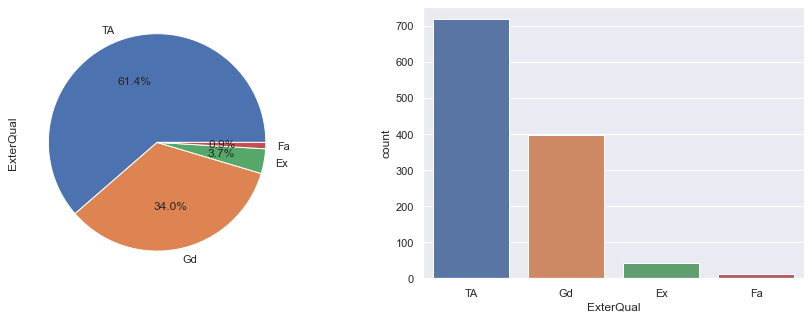

In [58]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
train['ExterQual'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['ExterQual'])
train['ExterQual'].value_counts()

TA    1022
Gd     117
Fa      26
Ex       2
Po       1
Name: ExterCond, dtype: int64

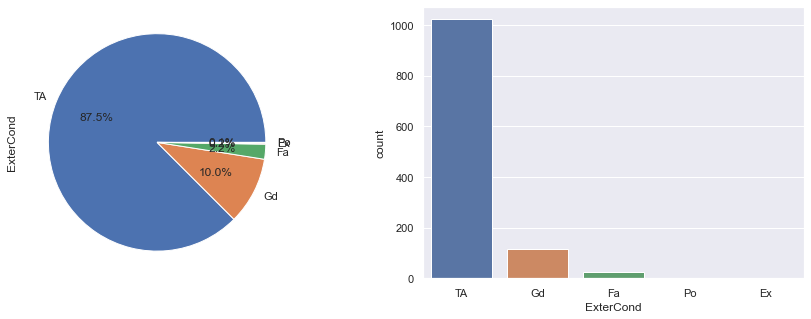

In [59]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
train['ExterCond'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['ExterCond'])
train['ExterCond'].value_counts()

CBlock    516
PConc     513
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64

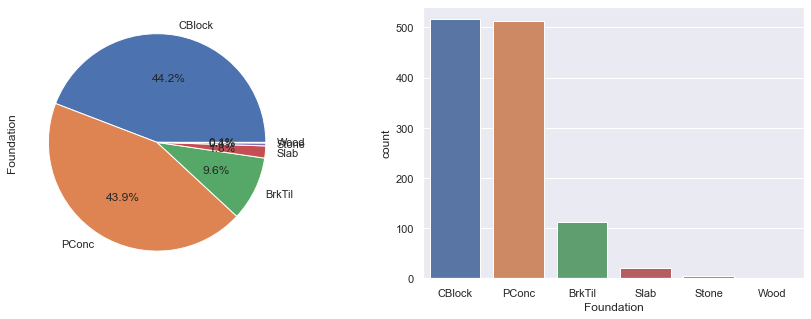

In [60]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
train['Foundation'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['Foundation'])
train['Foundation'].value_counts()

TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64

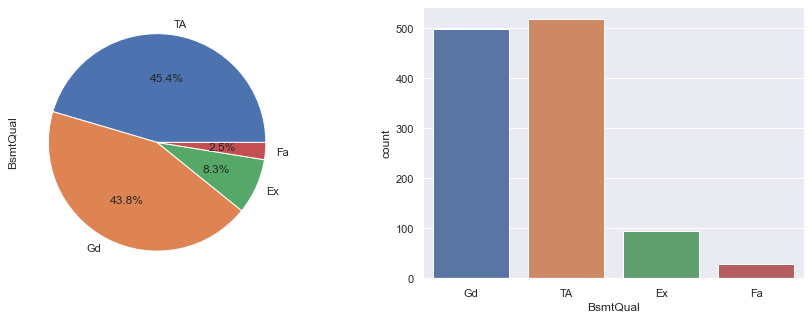

In [61]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
train['BsmtQual'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['BsmtQual'])
train['BsmtQual'].value_counts()

TA    1041
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64

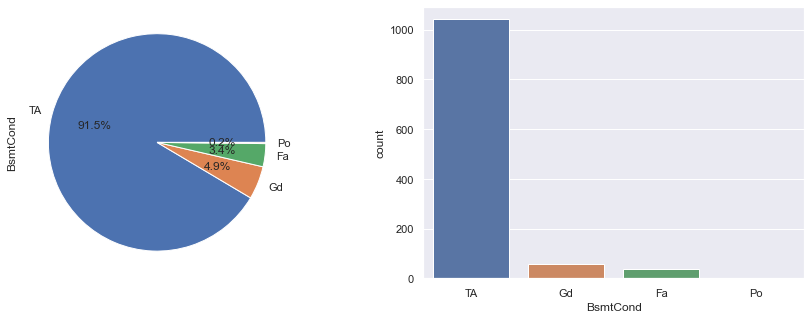

In [62]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
train['BsmtCond'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['BsmtCond'])
train['BsmtCond'].value_counts()

No    756
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64

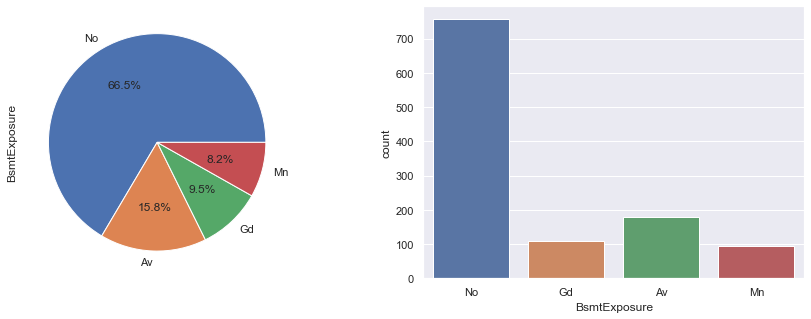

In [63]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
train['BsmtExposure'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['BsmtExposure'])
train['BsmtExposure'].value_counts()

Unf    345
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64

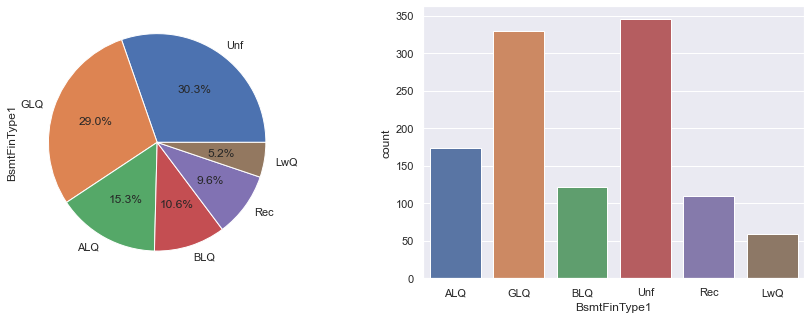

In [64]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
train['BsmtFinType1'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['BsmtFinType1'])
train['BsmtFinType1'].value_counts()

Unf    1002
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64

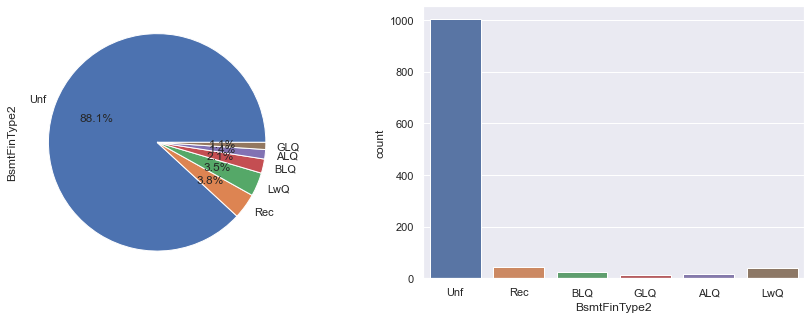

In [65]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
train['BsmtFinType2'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['BsmtFinType2'])
train['BsmtFinType2'].value_counts()

GasA     1143
GasW       14
Grav        5
Wall        4
OthW        1
Floor       1
Name: Heating, dtype: int64

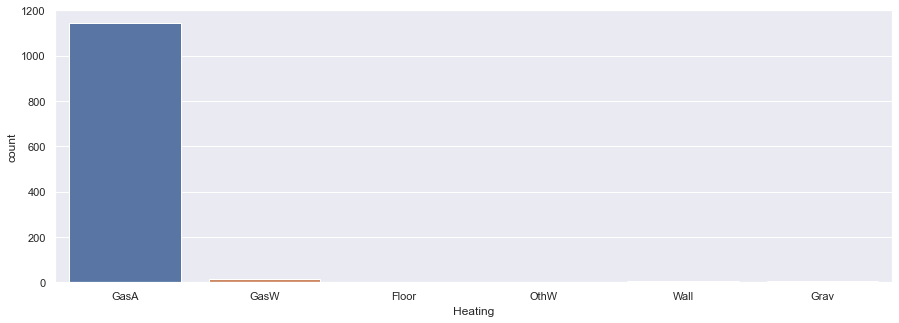

In [67]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(train['Heating'])
train['Heating'].value_counts()

Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: HeatingQC, dtype: int64

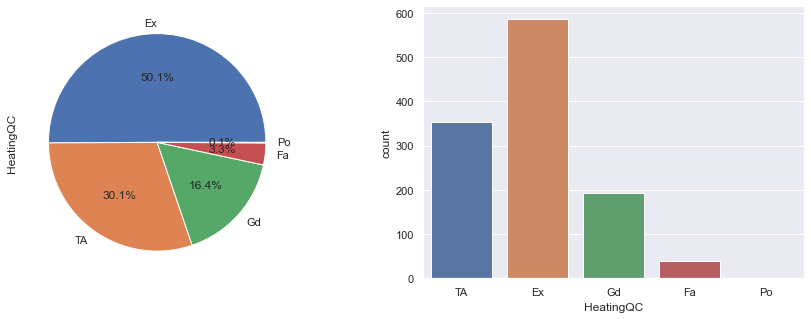

In [68]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
train['HeatingQC'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['HeatingQC'])
train['HeatingQC'].value_counts()

Y    1090
N      78
Name: CentralAir, dtype: int64

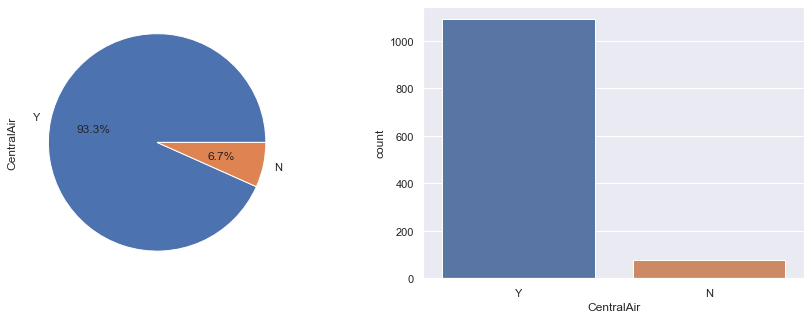

In [69]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
train['CentralAir'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['CentralAir'])
train['CentralAir'].value_counts()

SBrkr    1070
FuseA      74
FuseF      21
FuseP       2
Mix         1
Name: Electrical, dtype: int64

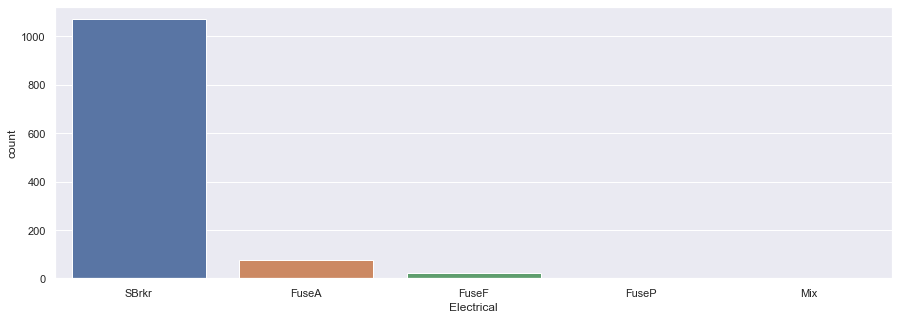

In [71]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(train['Electrical'])
train['Electrical'].value_counts()

TA    578
Gd    478
Ex     82
Fa     30
Name: KitchenQual, dtype: int64

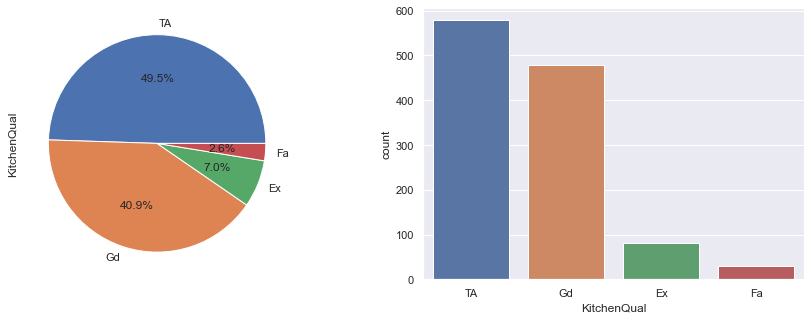

In [72]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
train['KitchenQual'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['KitchenQual'])
train['KitchenQual'].value_counts()

Typ     1085
Min2      30
Min1      25
Mod       12
Maj1      11
Maj2       4
Sev        1
Name: Functional, dtype: int64

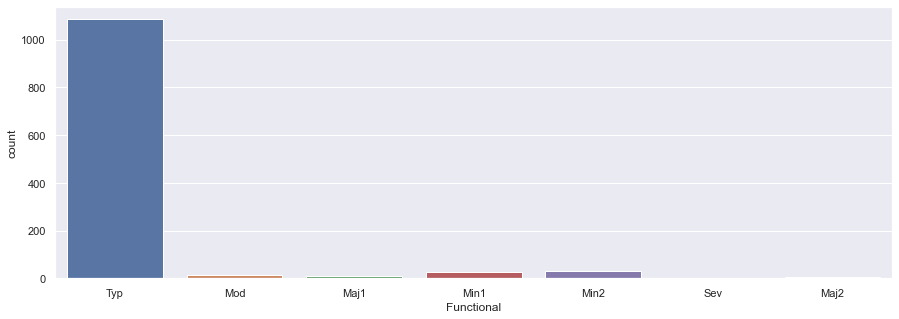

In [74]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(train['Functional'])
train['Functional'].value_counts()

Gd    301
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64

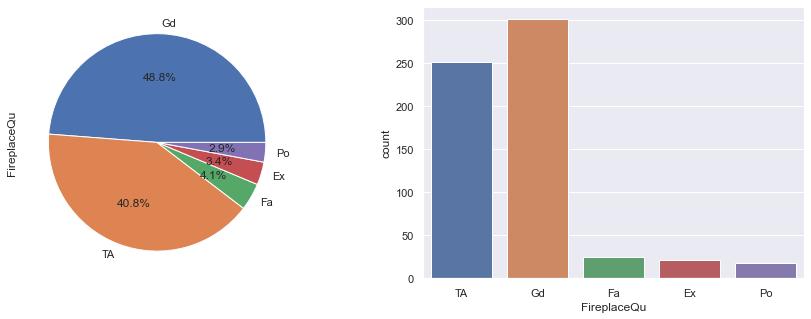

In [75]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
train['FireplaceQu'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['FireplaceQu'])
train['FireplaceQu'].value_counts()

Attchd     691
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64

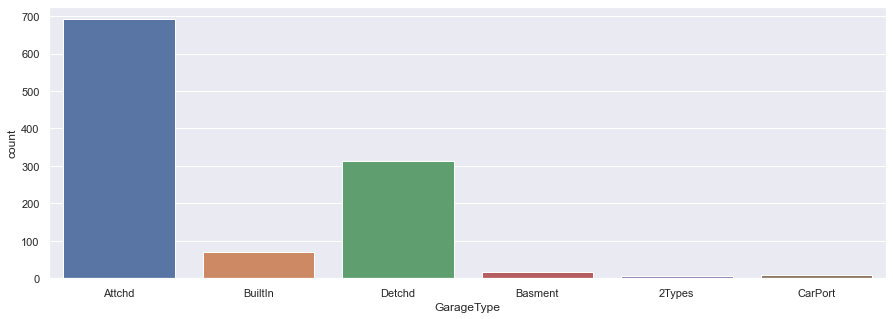

In [77]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(train['GarageType'])
train['GarageType'].value_counts()

Unf    487
RFn    339
Fin    278
Name: GarageFinish, dtype: int64

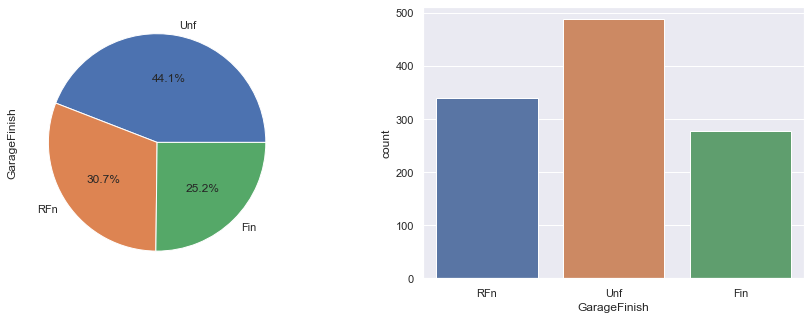

In [78]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
train['GarageFinish'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['GarageFinish'])
train['GarageFinish'].value_counts()

TA    1050
Fa      39
Gd      11
Po       2
Ex       2
Name: GarageQual, dtype: int64

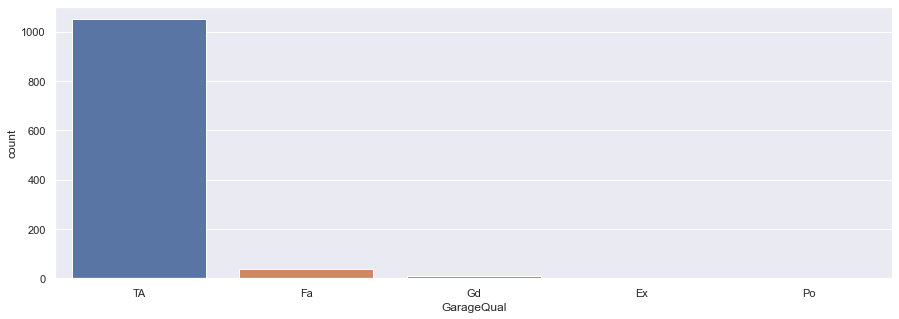

In [80]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(train['GarageQual'])
train['GarageQual'].value_counts()

TA    1061
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64

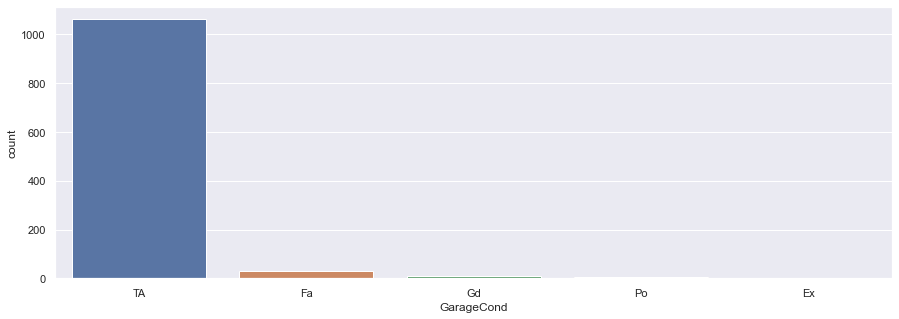

In [82]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(train['GarageCond'])
train['GarageCond'].value_counts()

Y    1071
N      74
P      23
Name: PavedDrive, dtype: int64

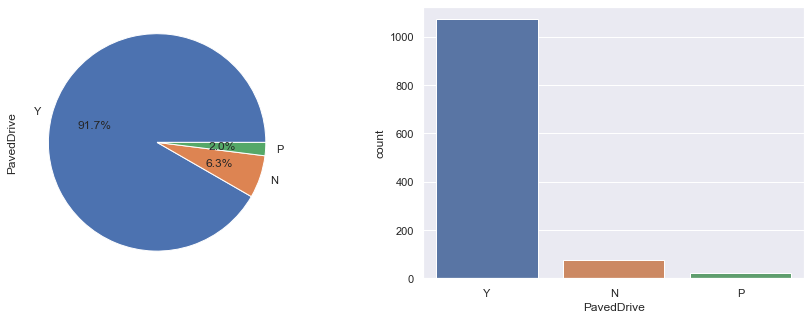

In [83]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
train['PavedDrive'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['PavedDrive'])
train['PavedDrive'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

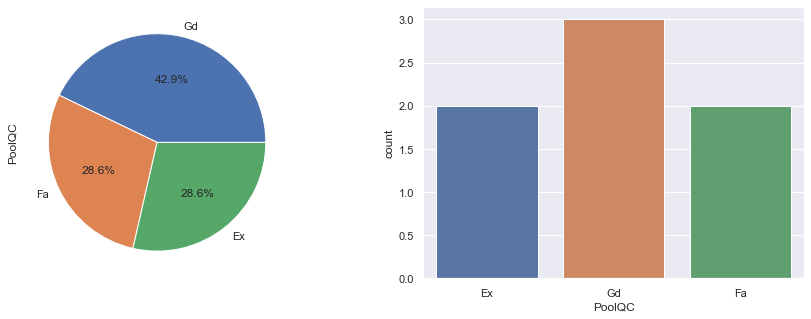

In [84]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
train['PoolQC'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['PoolQC'])
train['PoolQC'].value_counts()

MnPrv    129
GdPrv     51
GdWo      47
MnWw      10
Name: Fence, dtype: int64

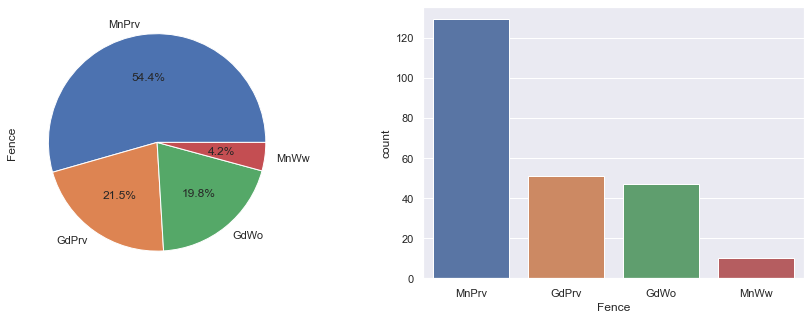

In [85]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
train['Fence'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['Fence'])
train['Fence'].value_counts()

Shed    40
Gar2     2
TenC     1
Othr     1
Name: MiscFeature, dtype: int64

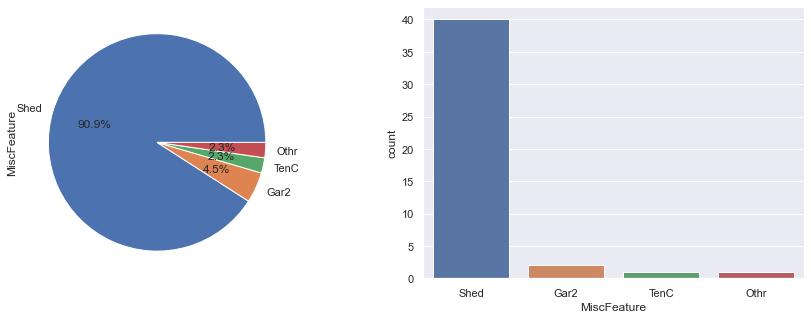

In [86]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
train['MiscFeature'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['MiscFeature'])
train['MiscFeature'].value_counts()

WD       999
New      106
COD       38
ConLD      8
ConLI      5
ConLw      4
Oth        3
CWD        3
Con        2
Name: SaleType, dtype: int64

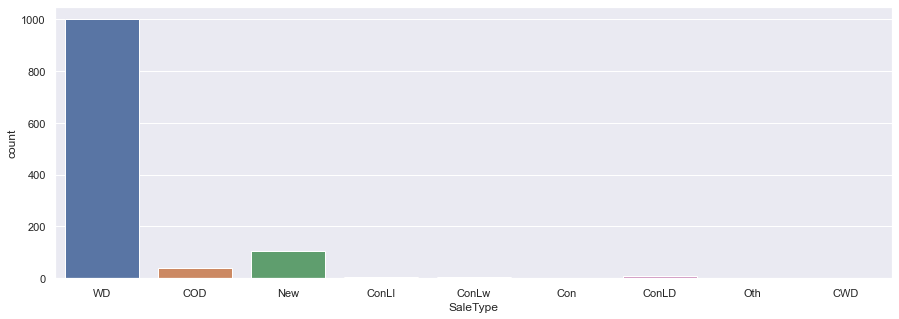

In [88]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(train['SaleType'])
train['SaleType'].value_counts()

Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64

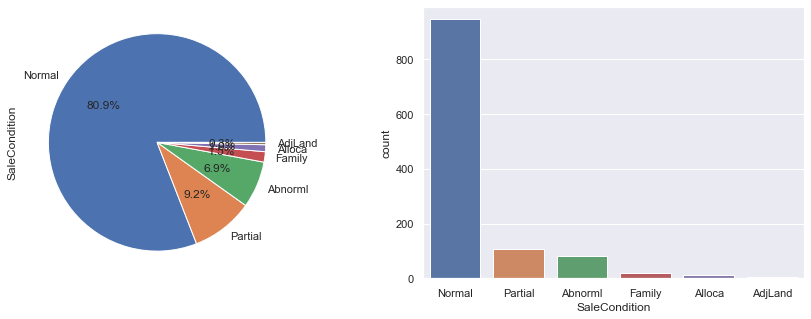

In [89]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
train['SaleCondition'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(train['SaleCondition'])
train['SaleCondition'].value_counts()

In [6]:
test_features=test[['MSSubClass','LotFrontage', 'LotArea', 'OverallQual','OverallCond',
                   'YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1',
                   'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
                   'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                  'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','WoodDeckSF','OpenPorchSF',
                  'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']]

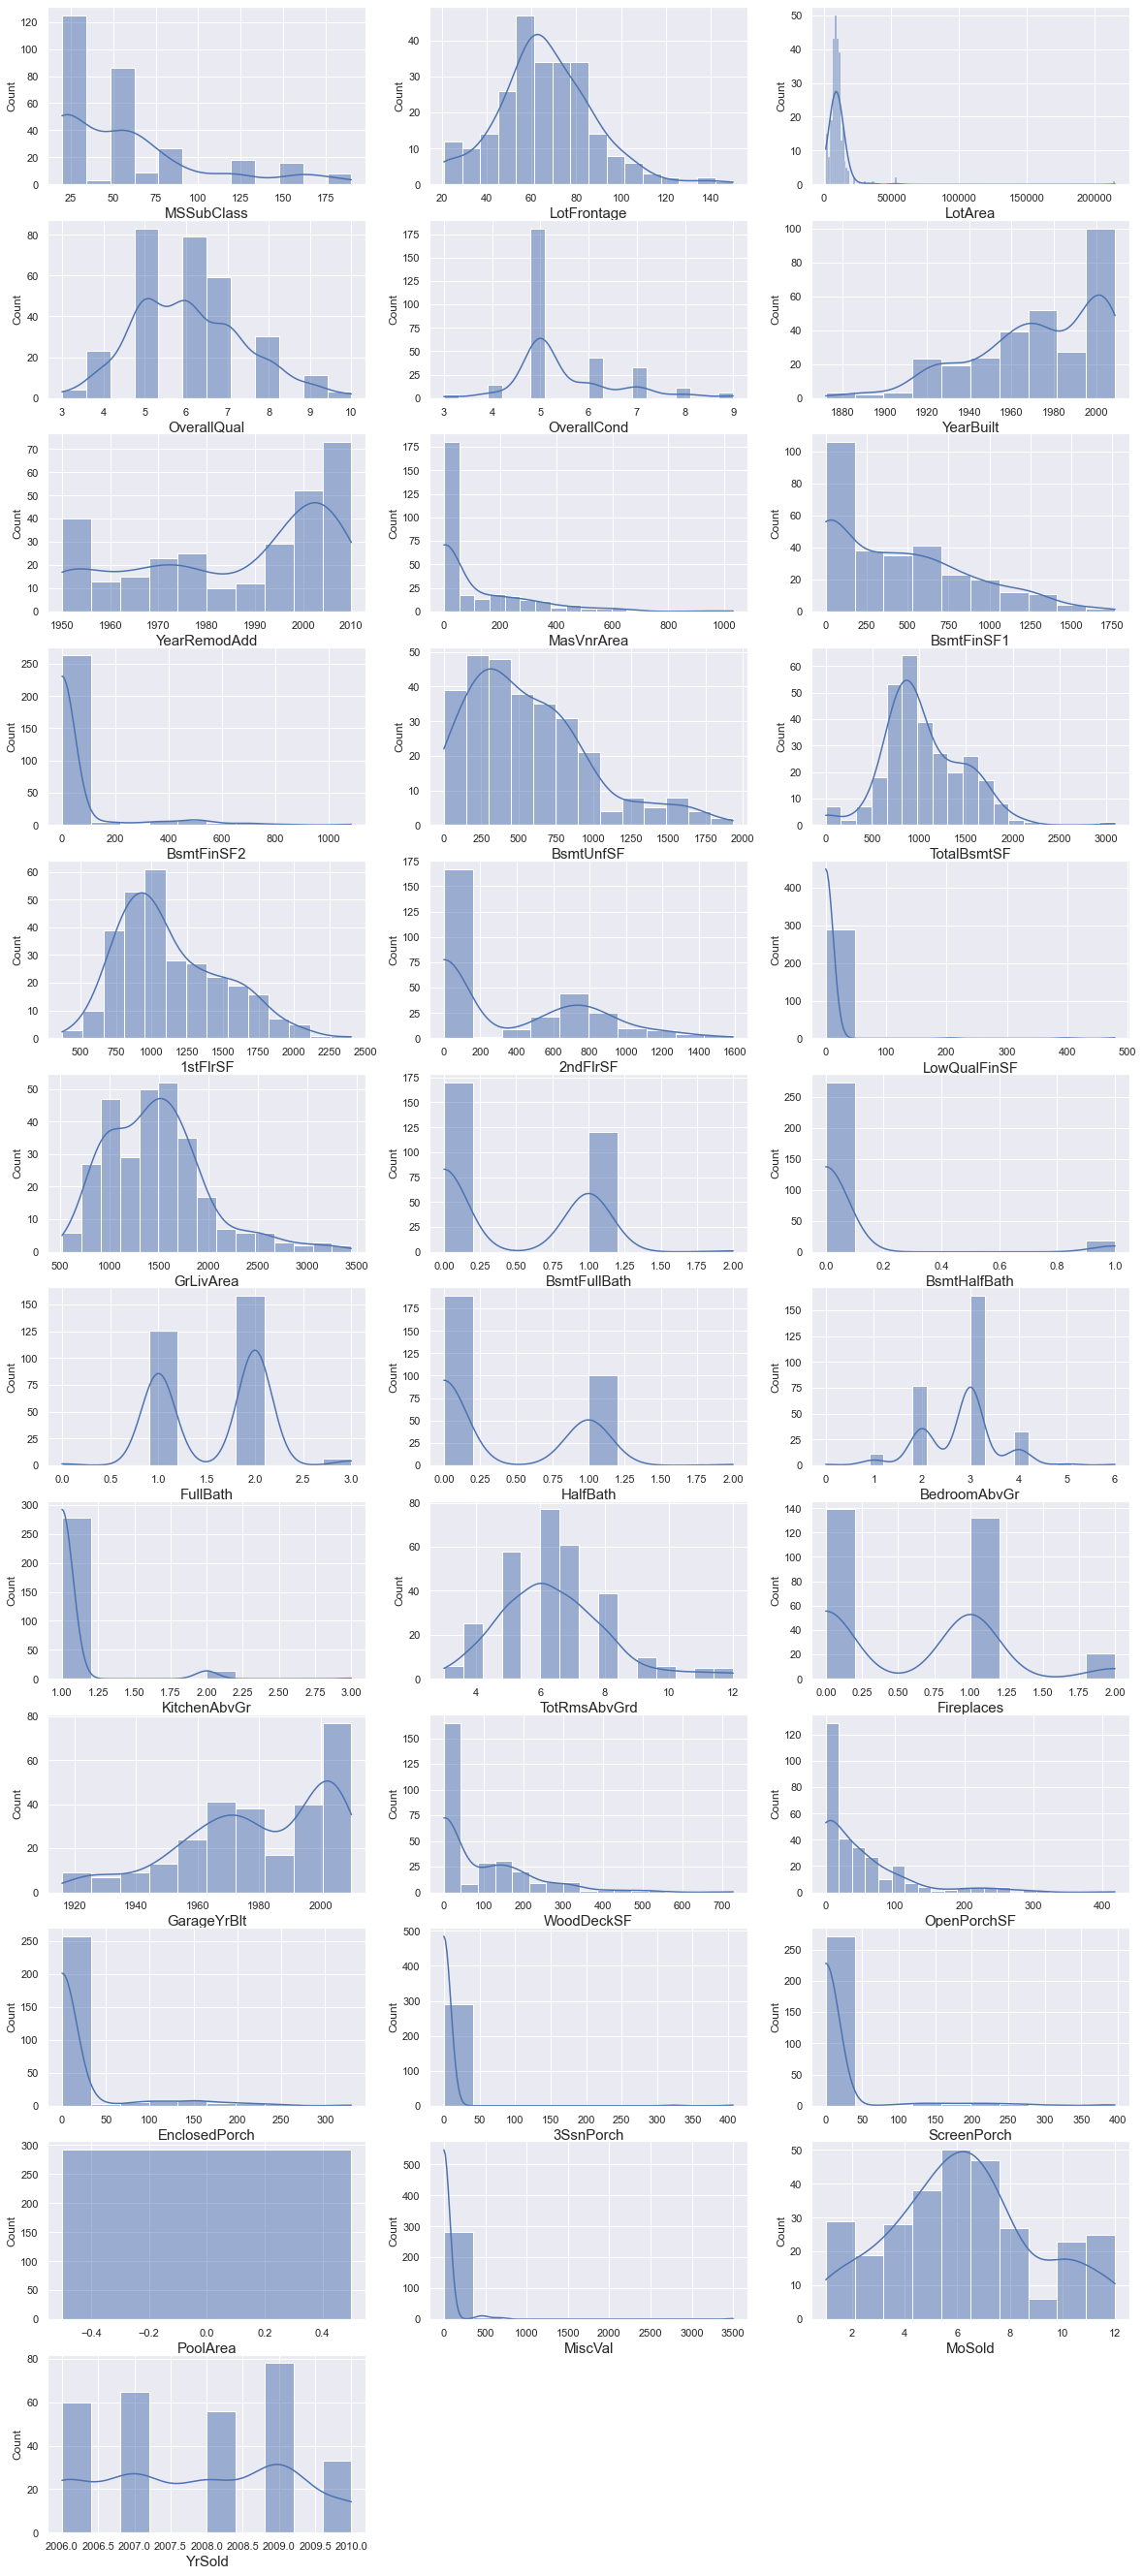

In [91]:
plt.figure(figsize=(20,52))
plotnumber=1
for column in test_features:
    if plotnumber<=38:
        ax=plt.subplot(13,3,plotnumber)
        sns.histplot(test_features[column],kde=True)
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show() 

1. As we can see there are skewness present in the features. Those features are 'MSSubClass','LotArea','MasVnrArea','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal'.
2. There are categorical columns as well like,MSSubClass, YrSold, MoSold, TotRmsAbvGrd, PoolArea etc.

In [93]:
cat_data_test= [columns for columns in test.columns if test[columns].dtype=='O'] #as 'O' is genearlly associated with the object data type, so its easier to get all the columns having object data type together. 
cat_data_test

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

RL         223
RM          55
FV          13
C (all)      1
Name: MSZoning, dtype: int64

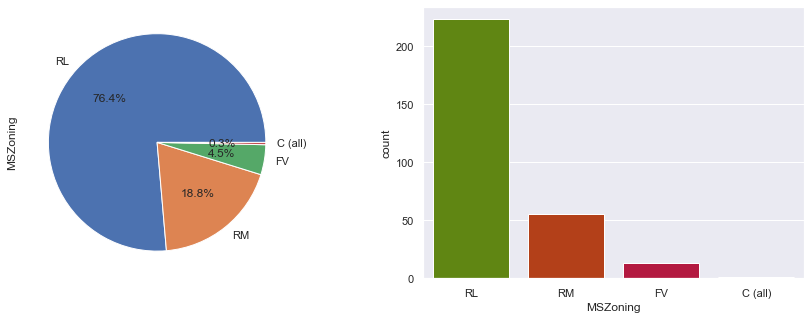

In [103]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
test['MSZoning'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['MSZoning'],palette='brg_r')
test['MSZoning'].value_counts()

Pave    290
Grvl      2
Name: Street, dtype: int64

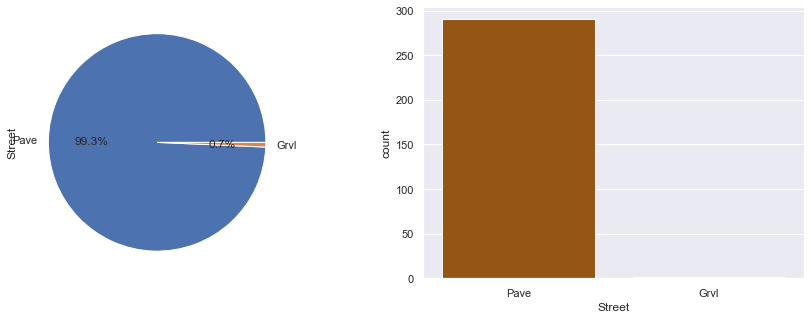

In [104]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
test['Street'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['Street'],palette='brg_r')
test['Street'].value_counts()

Grvl    9
Pave    5
Name: Alley, dtype: int64

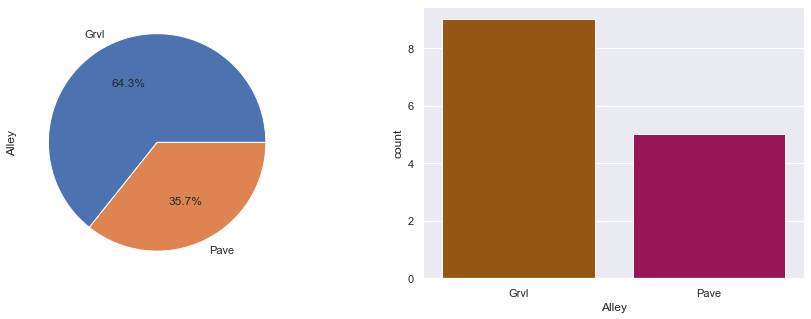

In [105]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
test['Alley'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['Alley'],palette='brg_r')
test['Alley'].value_counts()

Reg    185
IR1     94
IR2      9
IR3      4
Name: LotShape, dtype: int64

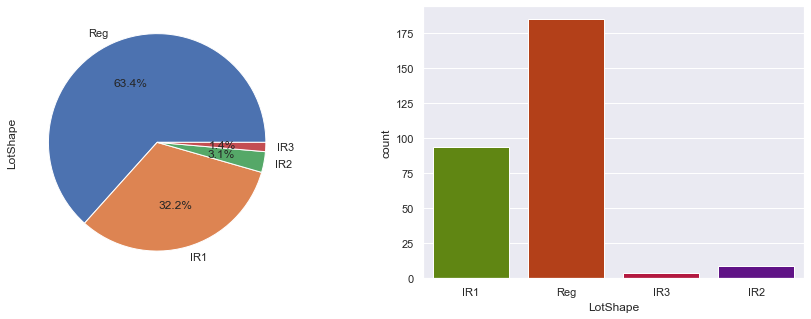

In [106]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
test['LotShape'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['LotShape'],palette='brg_r')
test['LotShape'].value_counts()

Lvl    265
Bnk     13
HLS      8
Low      6
Name: LandContour, dtype: int64

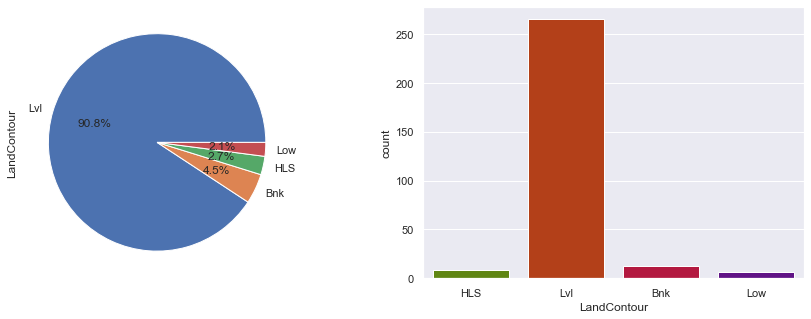

In [107]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
test['LandContour'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['LandContour'],palette='brg_r')
test['LandContour'].value_counts()

AllPub    291
NoSeWa      1
Name: Utilities, dtype: int64

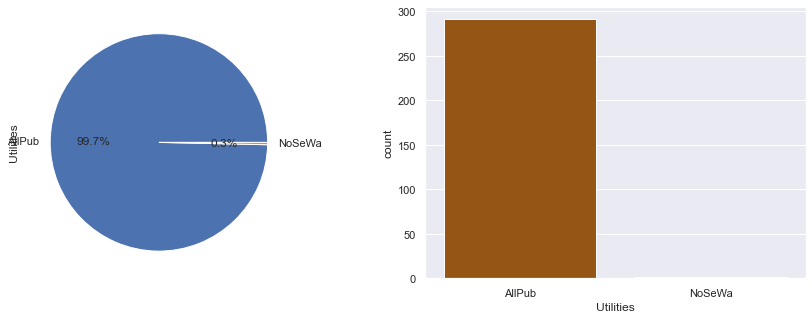

In [108]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
test['Utilities'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['Utilities'],palette='brg_r')
test['Utilities'].value_counts()

Inside     210
Corner      41
CulDSac     25
FR2         14
FR3          2
Name: LotConfig, dtype: int64

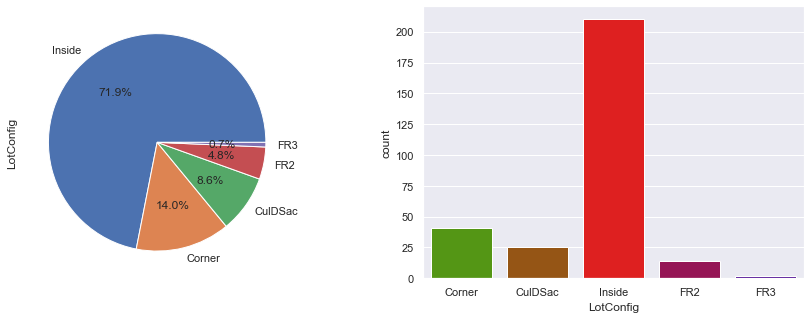

In [109]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
test['LotConfig'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['LotConfig'],palette='brg_r')
test['LotConfig'].value_counts()

Lvl    265
Bnk     13
HLS      8
Low      6
Name: LandContour, dtype: int64

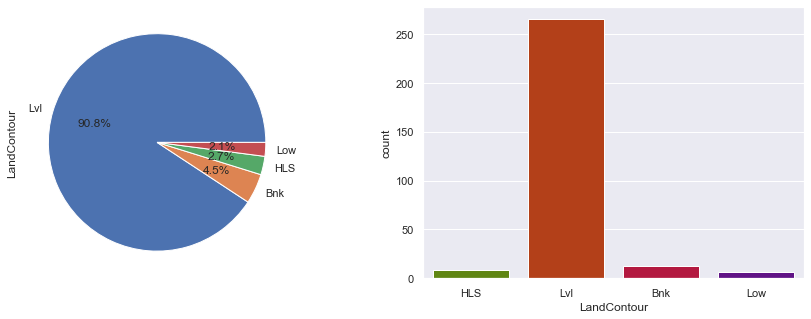

In [110]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
test['LandContour'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['LandContour'],palette='brg_r')
test['LandContour'].value_counts()

AllPub    291
NoSeWa      1
Name: Utilities, dtype: int64

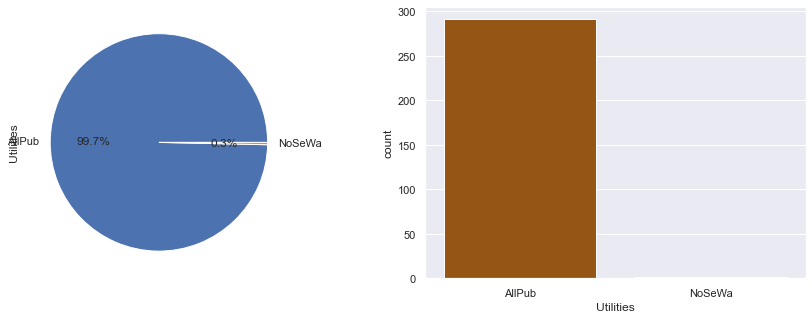

In [111]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
test['Utilities'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['Utilities'],palette='brg_r')
test['Utilities'].value_counts()

Inside     210
Corner      41
CulDSac     25
FR2         14
FR3          2
Name: LotConfig, dtype: int64

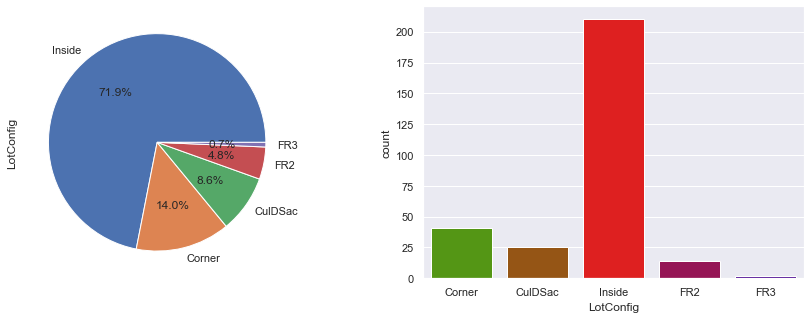

In [112]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
test['LotConfig'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['LotConfig'],palette='brg_r')
test['LotConfig'].value_counts()

Gtl    277
Mod     14
Sev      1
Name: LandSlope, dtype: int64

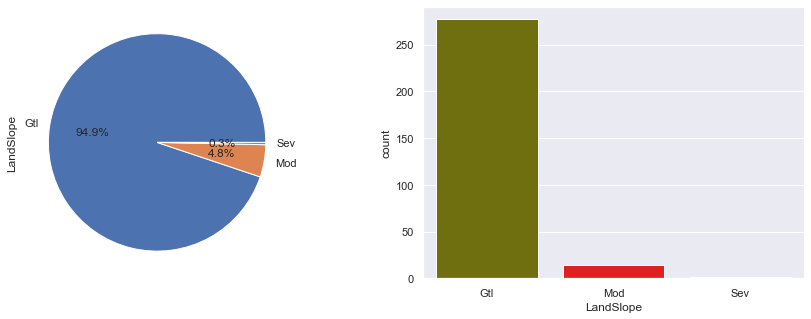

In [113]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
test['LandSlope'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['LandSlope'],palette='brg_r')
test['LandSlope'].value_counts()

NAmes      43
CollgCr    32
OldTown    27
Somerst    18
Edwards    17
NridgHt    16
Mitchel    15
Gilbert    15
Sawyer     14
NWAmes     14
Timber     14
SawyerW     8
BrkSide     8
MeadowV     8
IDOTRR      7
NoRidge     6
Crawfor     6
StoneBr     6
BrDale      5
ClearCr     4
SWISU       4
Veenker     2
Blmngtn     2
NPkVill     1
Name: Neighborhood, dtype: int64

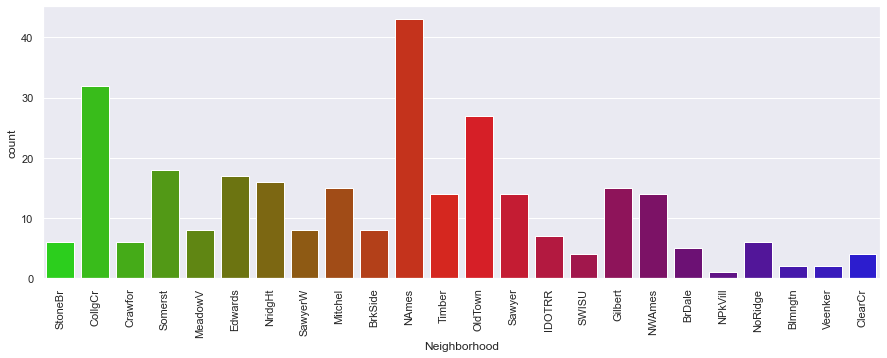

In [116]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(test['Neighborhood'],palette='brg_r')
plt.xticks(rotation=90)
test['Neighborhood'].value_counts()

Norm      255
Feedr      14
Artery     10
RRAn        6
PosN        2
RRAe        2
PosA        2
RRNn        1
Name: Condition1, dtype: int64

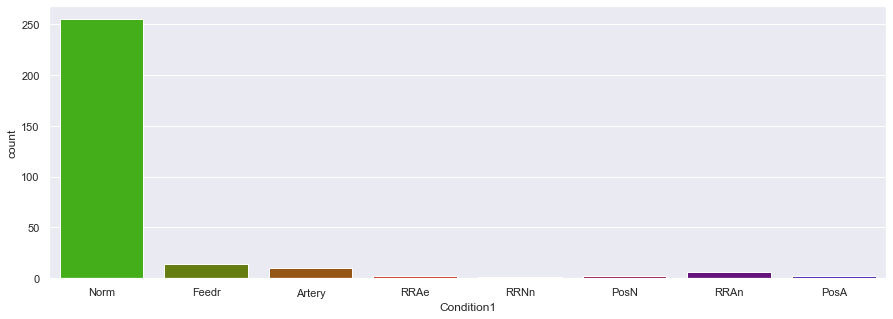

In [118]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(test['Condition1'],palette='brg_r')
test['Condition1'].value_counts()

Norm    291
RRNn      1
Name: Condition2, dtype: int64

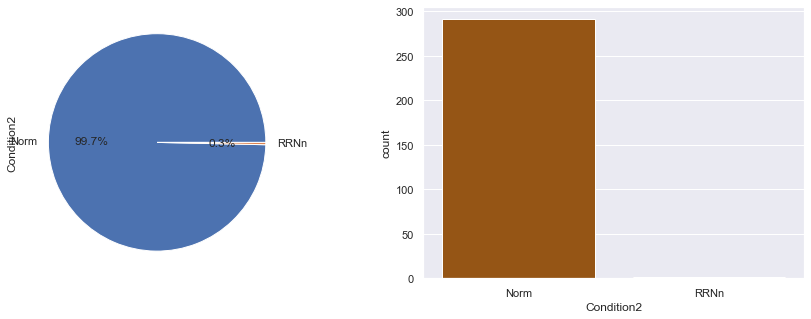

In [119]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
test['Condition2'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['Condition2'],palette='brg_r')
test['Condition2'].value_counts()

1Fam      239
TwnhsE     24
Twnhs      14
Duplex     11
2fmCon      4
Name: BldgType, dtype: int64

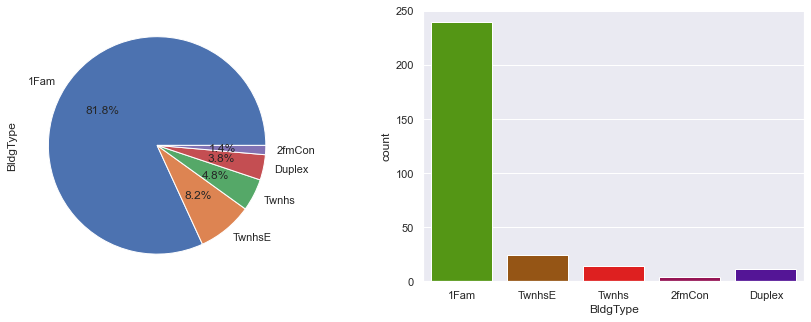

In [120]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
test['BldgType'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['BldgType'],palette='brg_r')
test['BldgType'].value_counts()

1Story    148
2Story     84
1.5Fin     33
SLvl       18
SFoyer      5
1.5Unf      2
2.5Fin      1
2.5Unf      1
Name: HouseStyle, dtype: int64

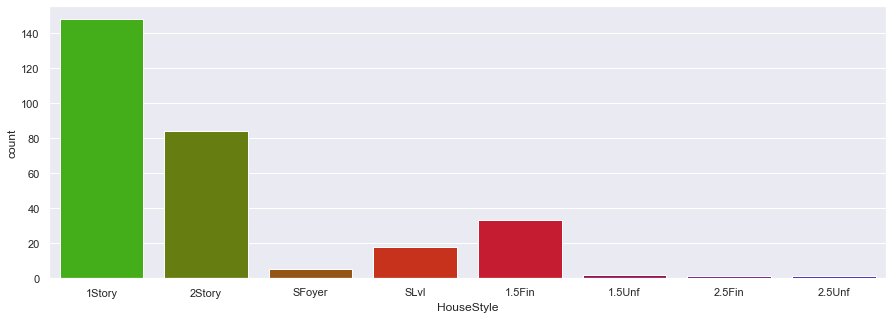

In [122]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(test['HouseStyle'],palette='brg_r')
test['HouseStyle'].value_counts()

Gable      226
Hip         61
Mansard      2
Gambrel      2
Flat         1
Name: RoofStyle, dtype: int64

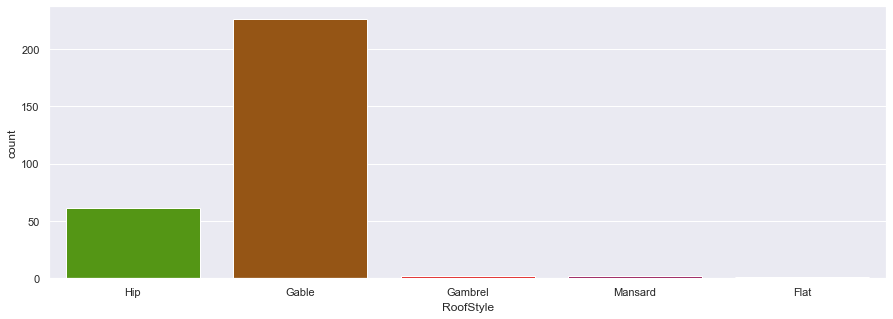

In [124]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(test['RoofStyle'],palette='brg_r')
test['RoofStyle'].value_counts()

CompShg    290
Tar&Grv      1
WdShake      1
Name: RoofMatl, dtype: int64

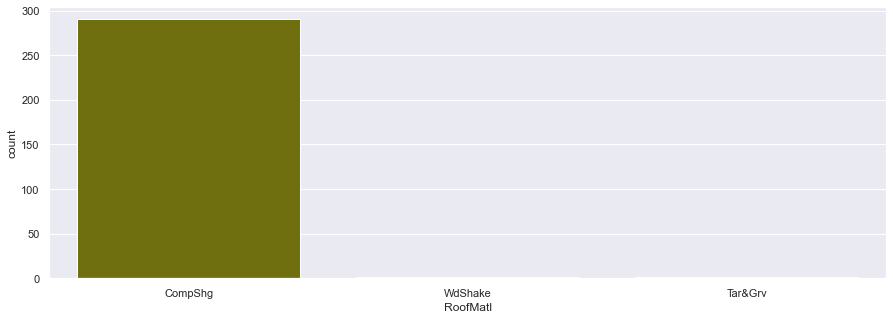

In [126]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(test['RoofMatl'],palette='brg_r')
test['RoofMatl'].value_counts()

VinylSd    119
HdBoard     43
MetalSd     42
Wd Sdng     32
CemntBd     19
Plywood     15
BrkFace      9
WdShing      7
Stucco       3
BrkComm      1
CBlock       1
AsbShng      1
Name: Exterior1st, dtype: int64

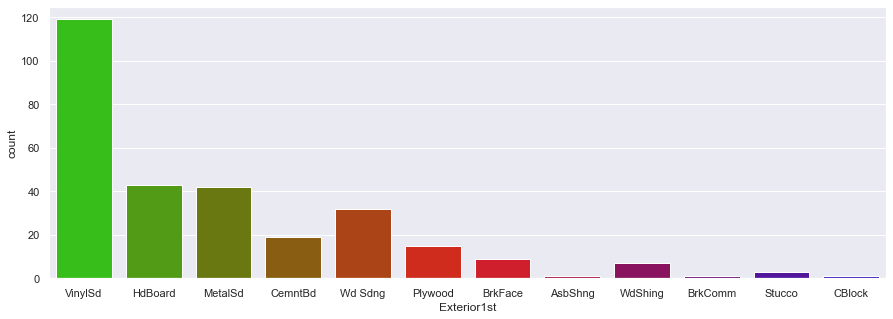

In [128]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(test['Exterior1st'],palette='brg_r')
test['Exterior1st'].value_counts()

VinylSd    117
MetalSd     41
HdBoard     37
Wd Sdng     32
Plywood     24
CmentBd     18
Wd Shng      7
BrkFace      5
Stucco       3
ImStucc      2
Brk Cmn      2
AsbShng      2
Stone        1
CBlock       1
Name: Exterior2nd, dtype: int64

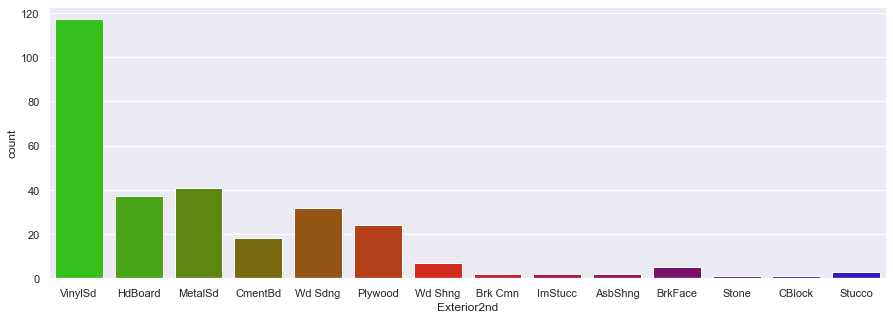

In [130]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(test['Exterior2nd'],palette='brg_r')
test['Exterior2nd'].value_counts()

None       168
BrkFace     91
Stone       30
BrkCmn       2
Name: MasVnrType, dtype: int64

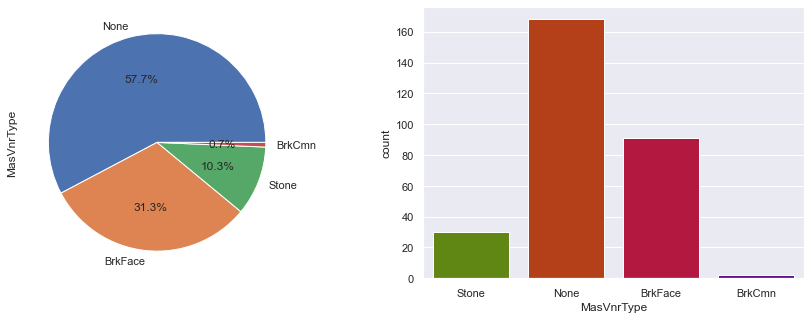

In [131]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
test['MasVnrType'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['MasVnrType'],palette='brg_r')
test['MasVnrType'].value_counts()

TA    189
Gd     91
Ex      9
Fa      3
Name: ExterQual, dtype: int64

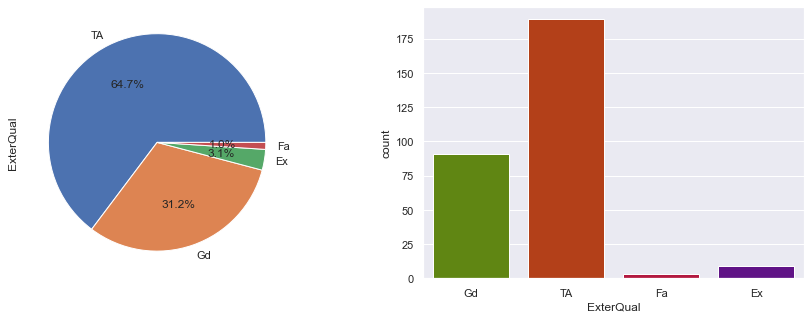

In [132]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
test['ExterQual'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['ExterQual'],palette='brg_r')
test['ExterQual'].value_counts()

TA    260
Gd     29
Fa      2
Ex      1
Name: ExterCond, dtype: int64

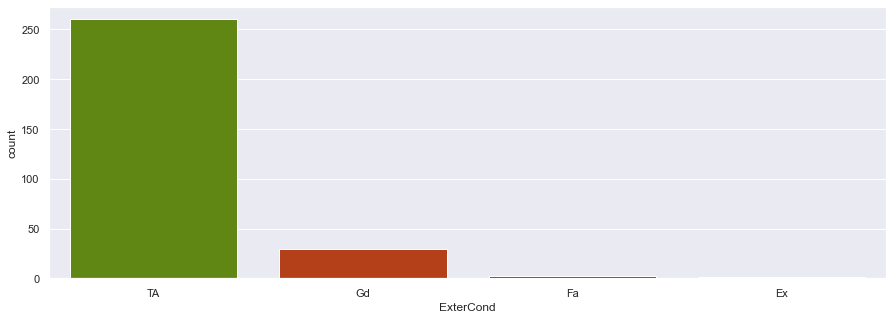

In [134]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(test['ExterCond'],palette='brg_r')
test['ExterCond'].value_counts()

PConc     134
CBlock    118
BrkTil     34
Slab        3
Wood        2
Stone       1
Name: Foundation, dtype: int64

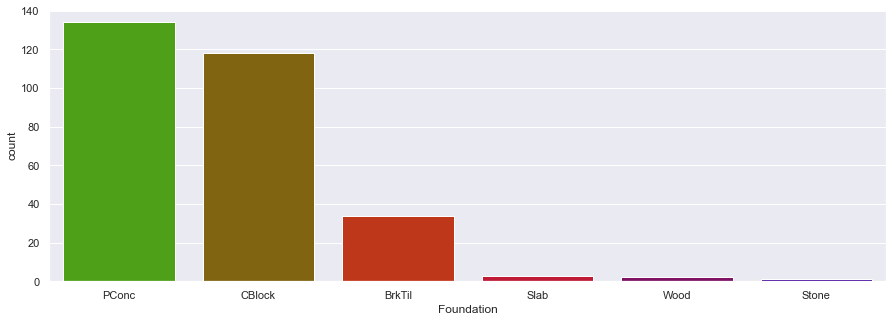

In [136]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(test['Foundation'],palette='brg_r')
test['Foundation'].value_counts()

TA    132
Gd    120
Ex     27
Fa      6
Name: BsmtQual, dtype: int64

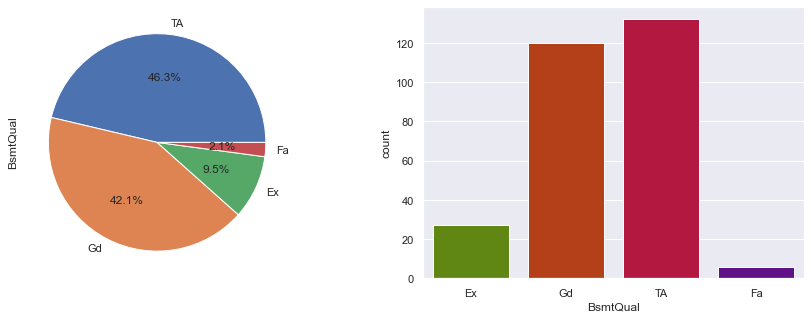

In [137]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
test['BsmtQual'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['BsmtQual'],palette='brg_r')
test['BsmtQual'].value_counts()

TA    270
Gd      9
Fa      6
Name: BsmtCond, dtype: int64

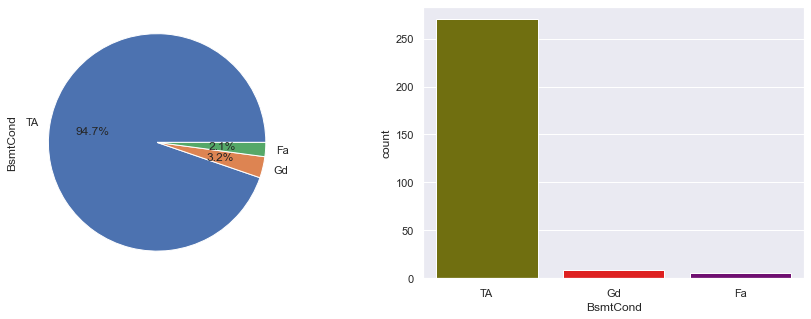

In [138]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
test['BsmtCond'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['BsmtCond'],palette='brg_r')
test['BsmtCond'].value_counts()

No    197
Av     41
Gd     26
Mn     21
Name: BsmtExposure, dtype: int64

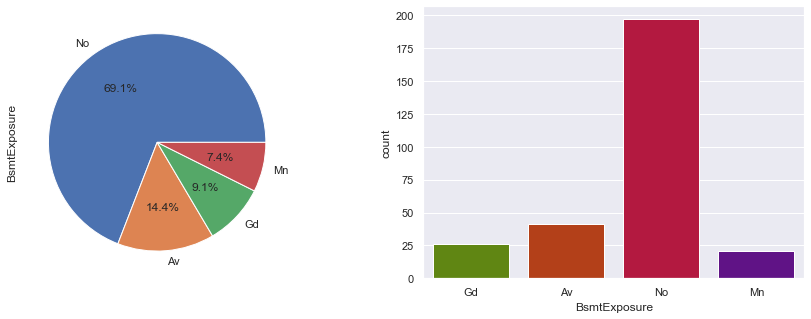

In [139]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
test['BsmtExposure'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['BsmtExposure'],palette='brg_r')
test['BsmtExposure'].value_counts()

GLQ    88
Unf    85
ALQ    46
BLQ    27
Rec    24
LwQ    15
Name: BsmtFinType1, dtype: int64

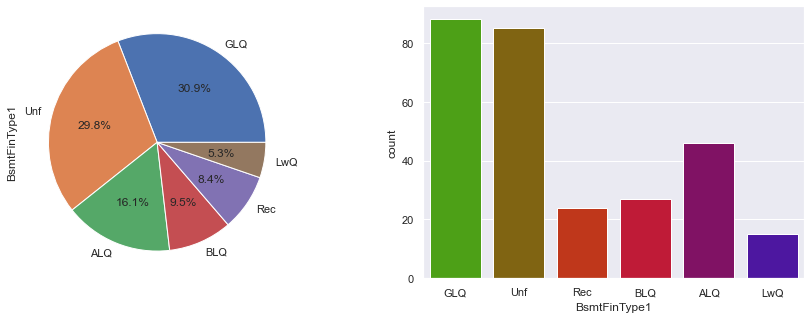

In [140]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
test['BsmtFinType1'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['BsmtFinType1'],palette='brg_r')
test['BsmtFinType1'].value_counts()

Unf    254
Rec     11
BLQ      9
LwQ      6
ALQ      3
GLQ      2
Name: BsmtFinType2, dtype: int64

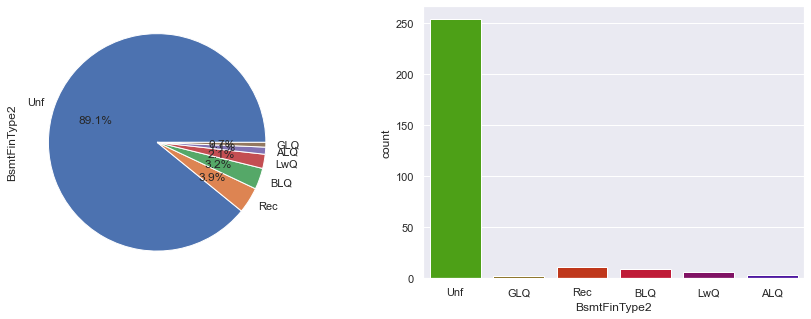

In [141]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
test['BsmtFinType2'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['BsmtFinType2'],palette='brg_r')
test['BsmtFinType2'].value_counts()

GasA    285
GasW      4
Grav      2
OthW      1
Name: Heating, dtype: int64

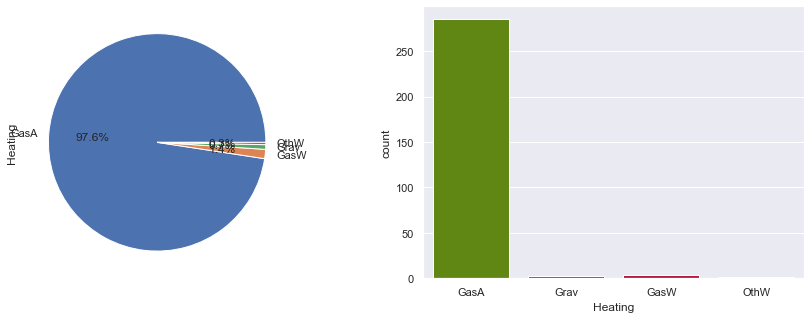

In [142]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
test['Heating'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['Heating'],palette='brg_r')
test['Heating'].value_counts()

Ex    156
TA     76
Gd     49
Fa     11
Name: HeatingQC, dtype: int64

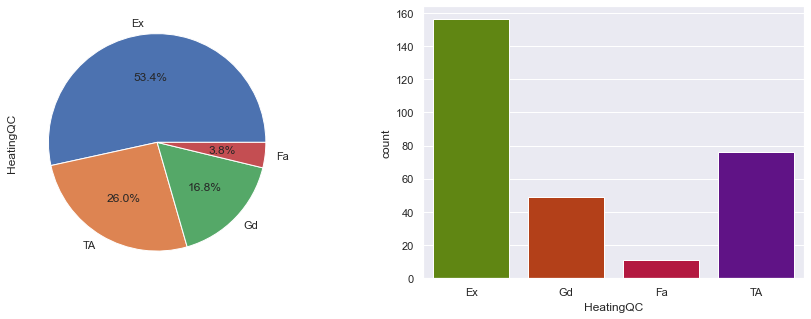

In [143]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
test['HeatingQC'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['HeatingQC'],palette='brg_r')
test['HeatingQC'].value_counts()

Y    275
N     17
Name: CentralAir, dtype: int64

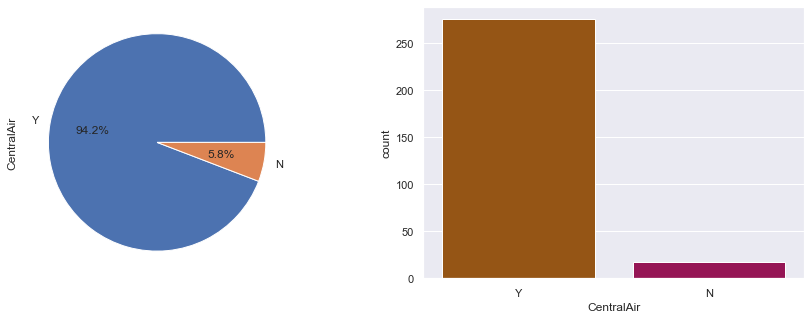

In [144]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
test['CentralAir'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['CentralAir'],palette='brg_r')
test['CentralAir'].value_counts()

SBrkr    264
FuseA     20
FuseF      6
FuseP      1
Name: Electrical, dtype: int64

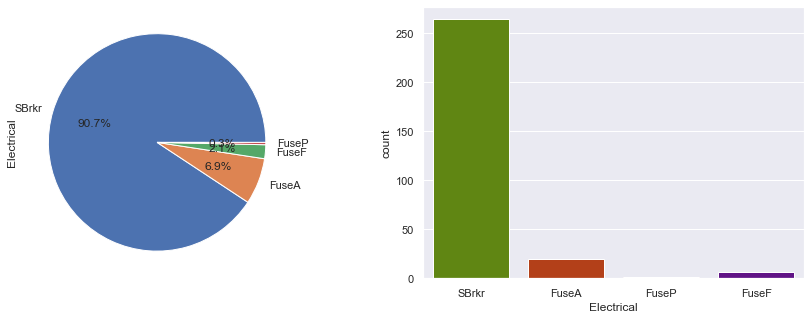

In [145]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
test['Electrical'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['Electrical'],palette='brg_r')
test['Electrical'].value_counts()

TA    157
Gd    108
Ex     18
Fa      9
Name: KitchenQual, dtype: int64

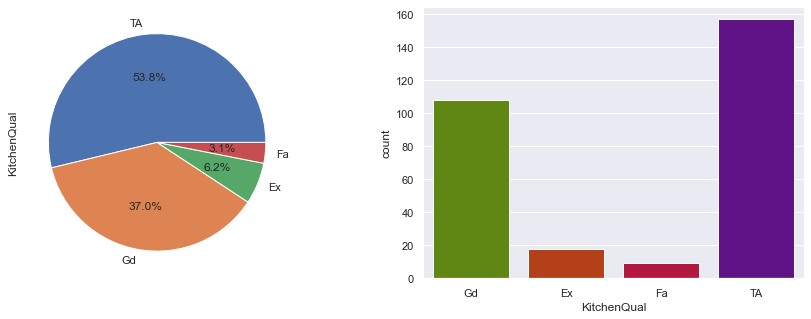

In [146]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
test['KitchenQual'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['KitchenQual'],palette='brg_r')
test['KitchenQual'].value_counts()

Typ     275
Min1      6
Min2      4
Maj1      3
Mod       3
Maj2      1
Name: Functional, dtype: int64

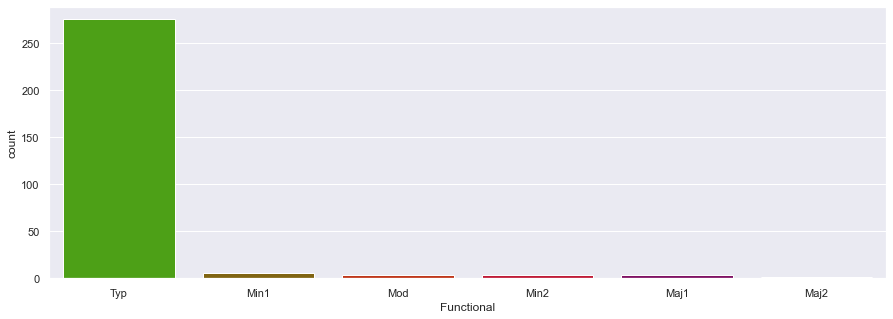

In [148]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(test['Functional'],palette='brg_r')
test['Functional'].value_counts()

Gd    79
TA    61
Fa     8
Ex     3
Po     2
Name: FireplaceQu, dtype: int64

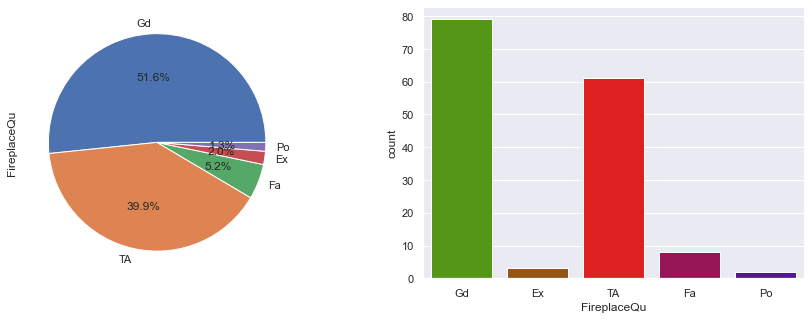

In [149]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
test['FireplaceQu'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['FireplaceQu'],palette='brg_r')
test['FireplaceQu'].value_counts()

Attchd     179
Detchd      73
BuiltIn     18
Basment      3
2Types       1
CarPort      1
Name: GarageType, dtype: int64

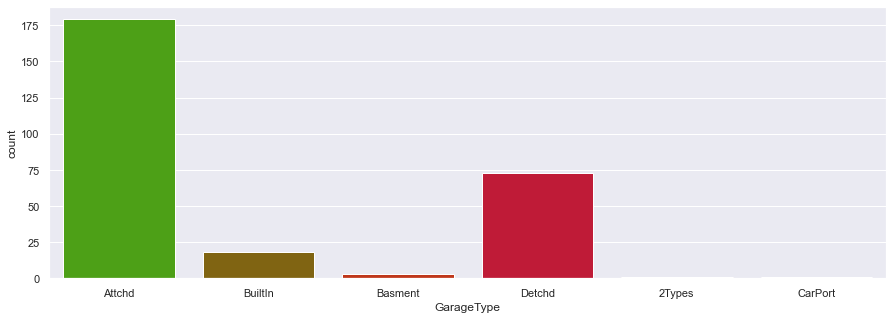

In [151]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(test['GarageType'],palette='brg_r')
test['GarageType'].value_counts()

Unf    118
RFn     83
Fin     74
Name: GarageFinish, dtype: int64

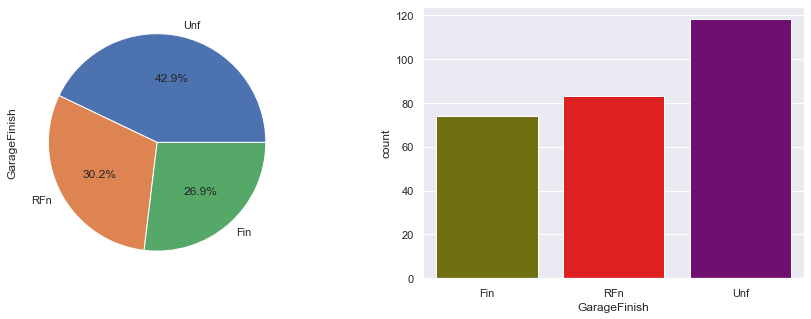

In [152]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
test['GarageFinish'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['GarageFinish'],palette='brg_r')
test['GarageFinish'].value_counts()

TA    261
Fa      9
Gd      3
Po      1
Ex      1
Name: GarageQual, dtype: int64

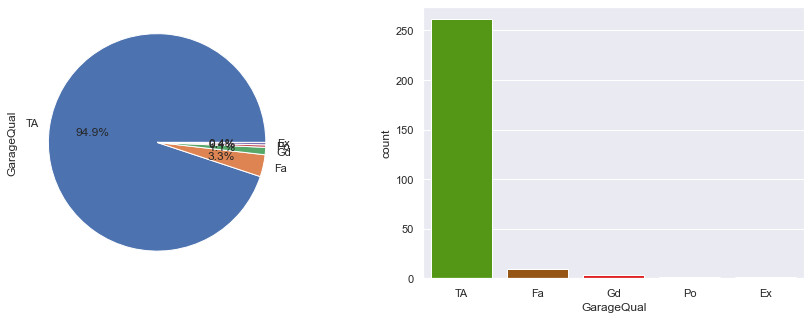

In [153]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
test['GarageQual'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['GarageQual'],palette='brg_r')
test['GarageQual'].value_counts()

TA    265
Fa      7
Gd      1
Po      1
Ex      1
Name: GarageCond, dtype: int64

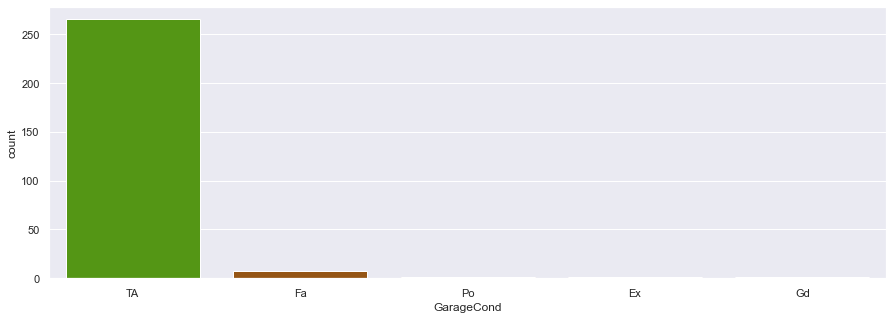

In [155]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(test['GarageCond'],palette='brg_r')
test['GarageCond'].value_counts()

Y    269
N     16
P      7
Name: PavedDrive, dtype: int64

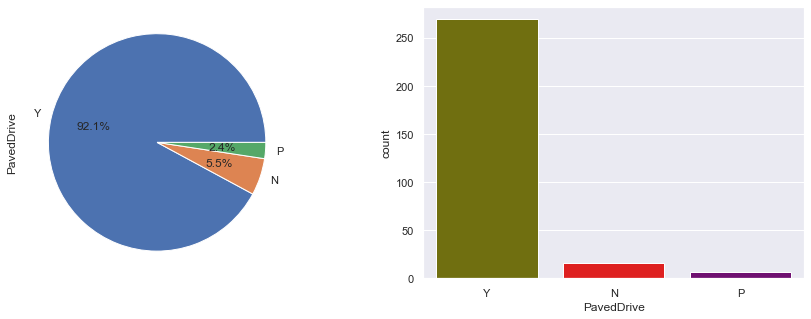

In [156]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
test['PavedDrive'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['PavedDrive'],palette='brg_r')
test['PavedDrive'].value_counts()

MnPrv    28
GdPrv     8
GdWo      7
MnWw      1
Name: Fence, dtype: int64

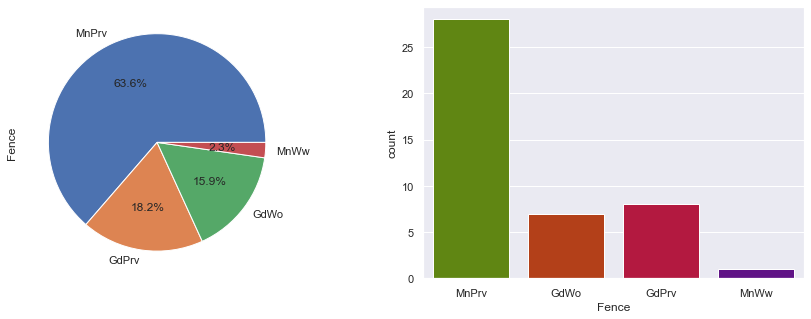

In [157]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
test['Fence'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['Fence'],palette='brg_r')
test['Fence'].value_counts()

Shed    9
Othr    1
Name: MiscFeature, dtype: int64

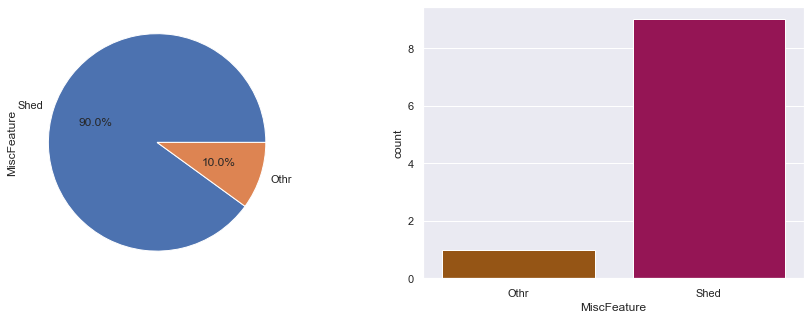

In [158]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
test['MiscFeature'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['MiscFeature'],palette='brg_r')
test['MiscFeature'].value_counts()

WD       268
New       16
COD        5
ConLw      1
ConLD      1
CWD        1
Name: SaleType, dtype: int64

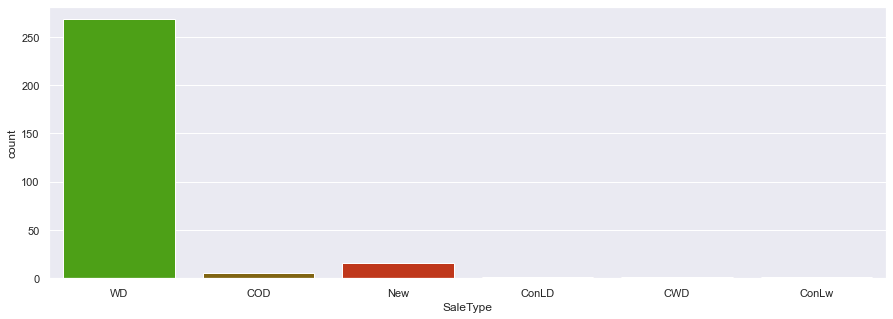

In [160]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
sns.countplot(test['SaleType'],palette='brg_r')
test['SaleType'].value_counts()

Normal     253
Abnorml     20
Partial     17
Family       2
Name: SaleCondition, dtype: int64

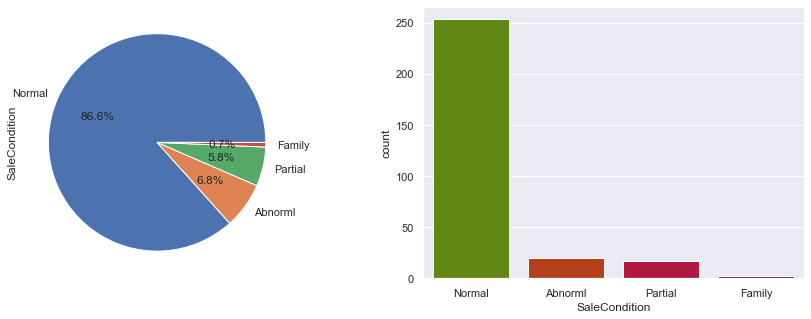

In [161]:
plt.figure(figsize=(15,5))
sns.set_theme(style="darkgrid")
plt.subplot(1,2,1)
test['SaleCondition'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(test['SaleCondition'],palette='brg_r')
test['SaleCondition'].value_counts()

#### Outlier detection:

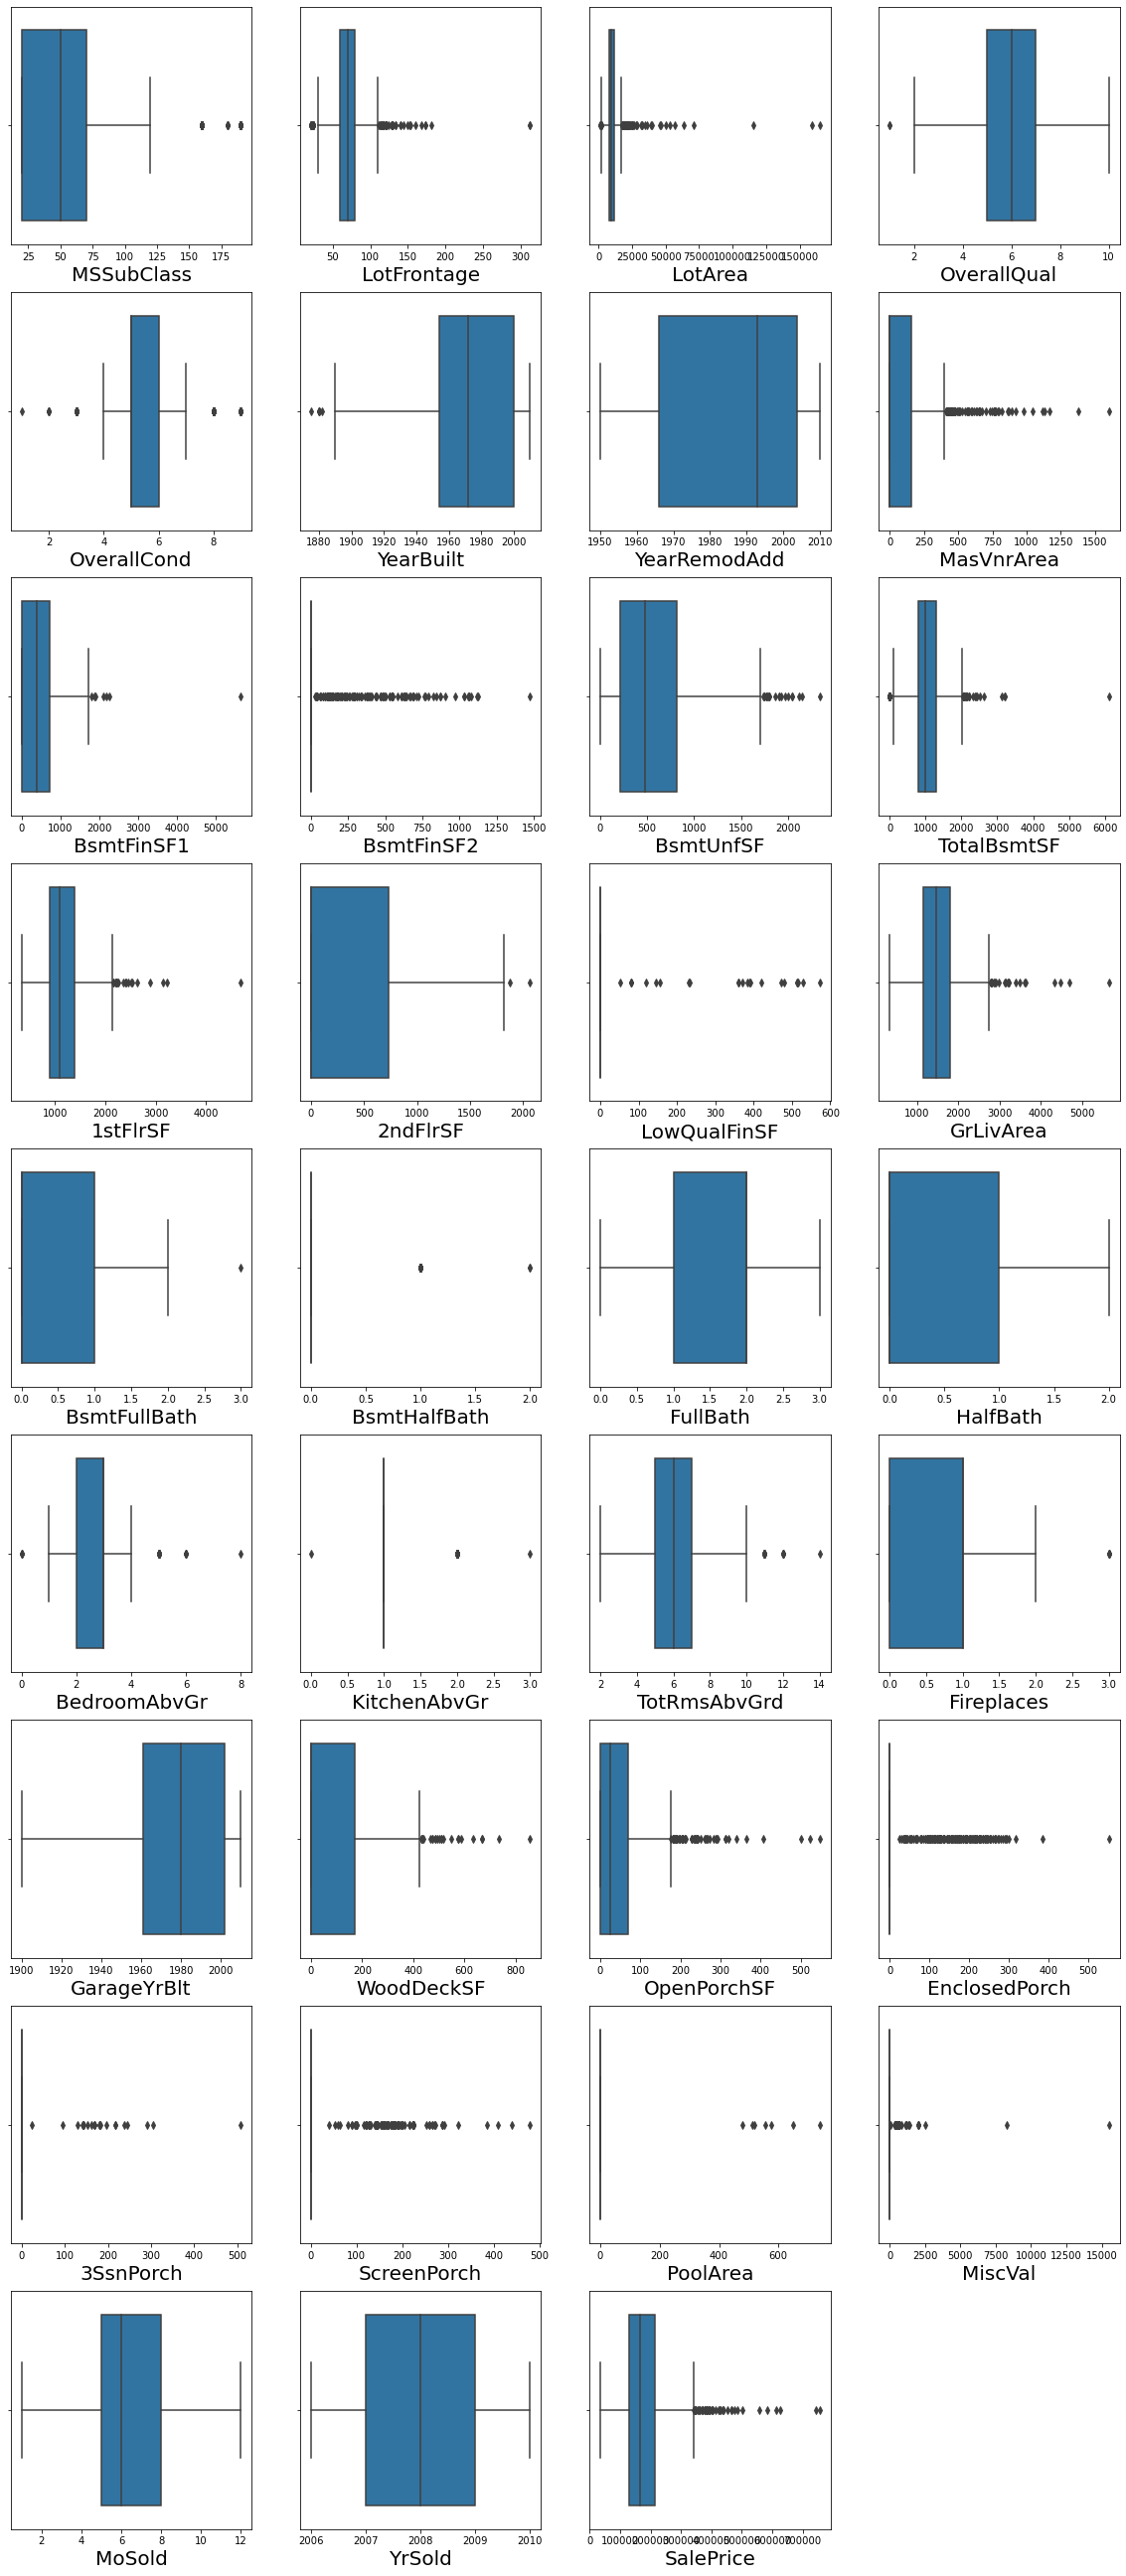

In [10]:
plt.figure(figsize=(20,52),facecolor='white')
plotnumber=1
for column in train_features:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.boxplot(train_features[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- LOtFrontage, LotArea, MansVnrArea, BsmtfinSF2, BsmtUnfSF, TotalBsmtSF, 1stflrSF, LowqualFinSF, GrLivArea, WooddeckSF, OpenporchSF, EnclosedPorch,3SsnPorch, ScreenPorch, PoolArea,MiscVal,Sale price columns are having outliers.

#### Bivariate Analysis:

We need to check Relation between feature vs label for that we need to divide the dataset and analyze.

In [11]:
#Dividing Dataset into Features and Label:

y=train['SalePrice']
x=train.drop(columns=['SalePrice'])

#### Let's Check the relationship between numerical features and label:

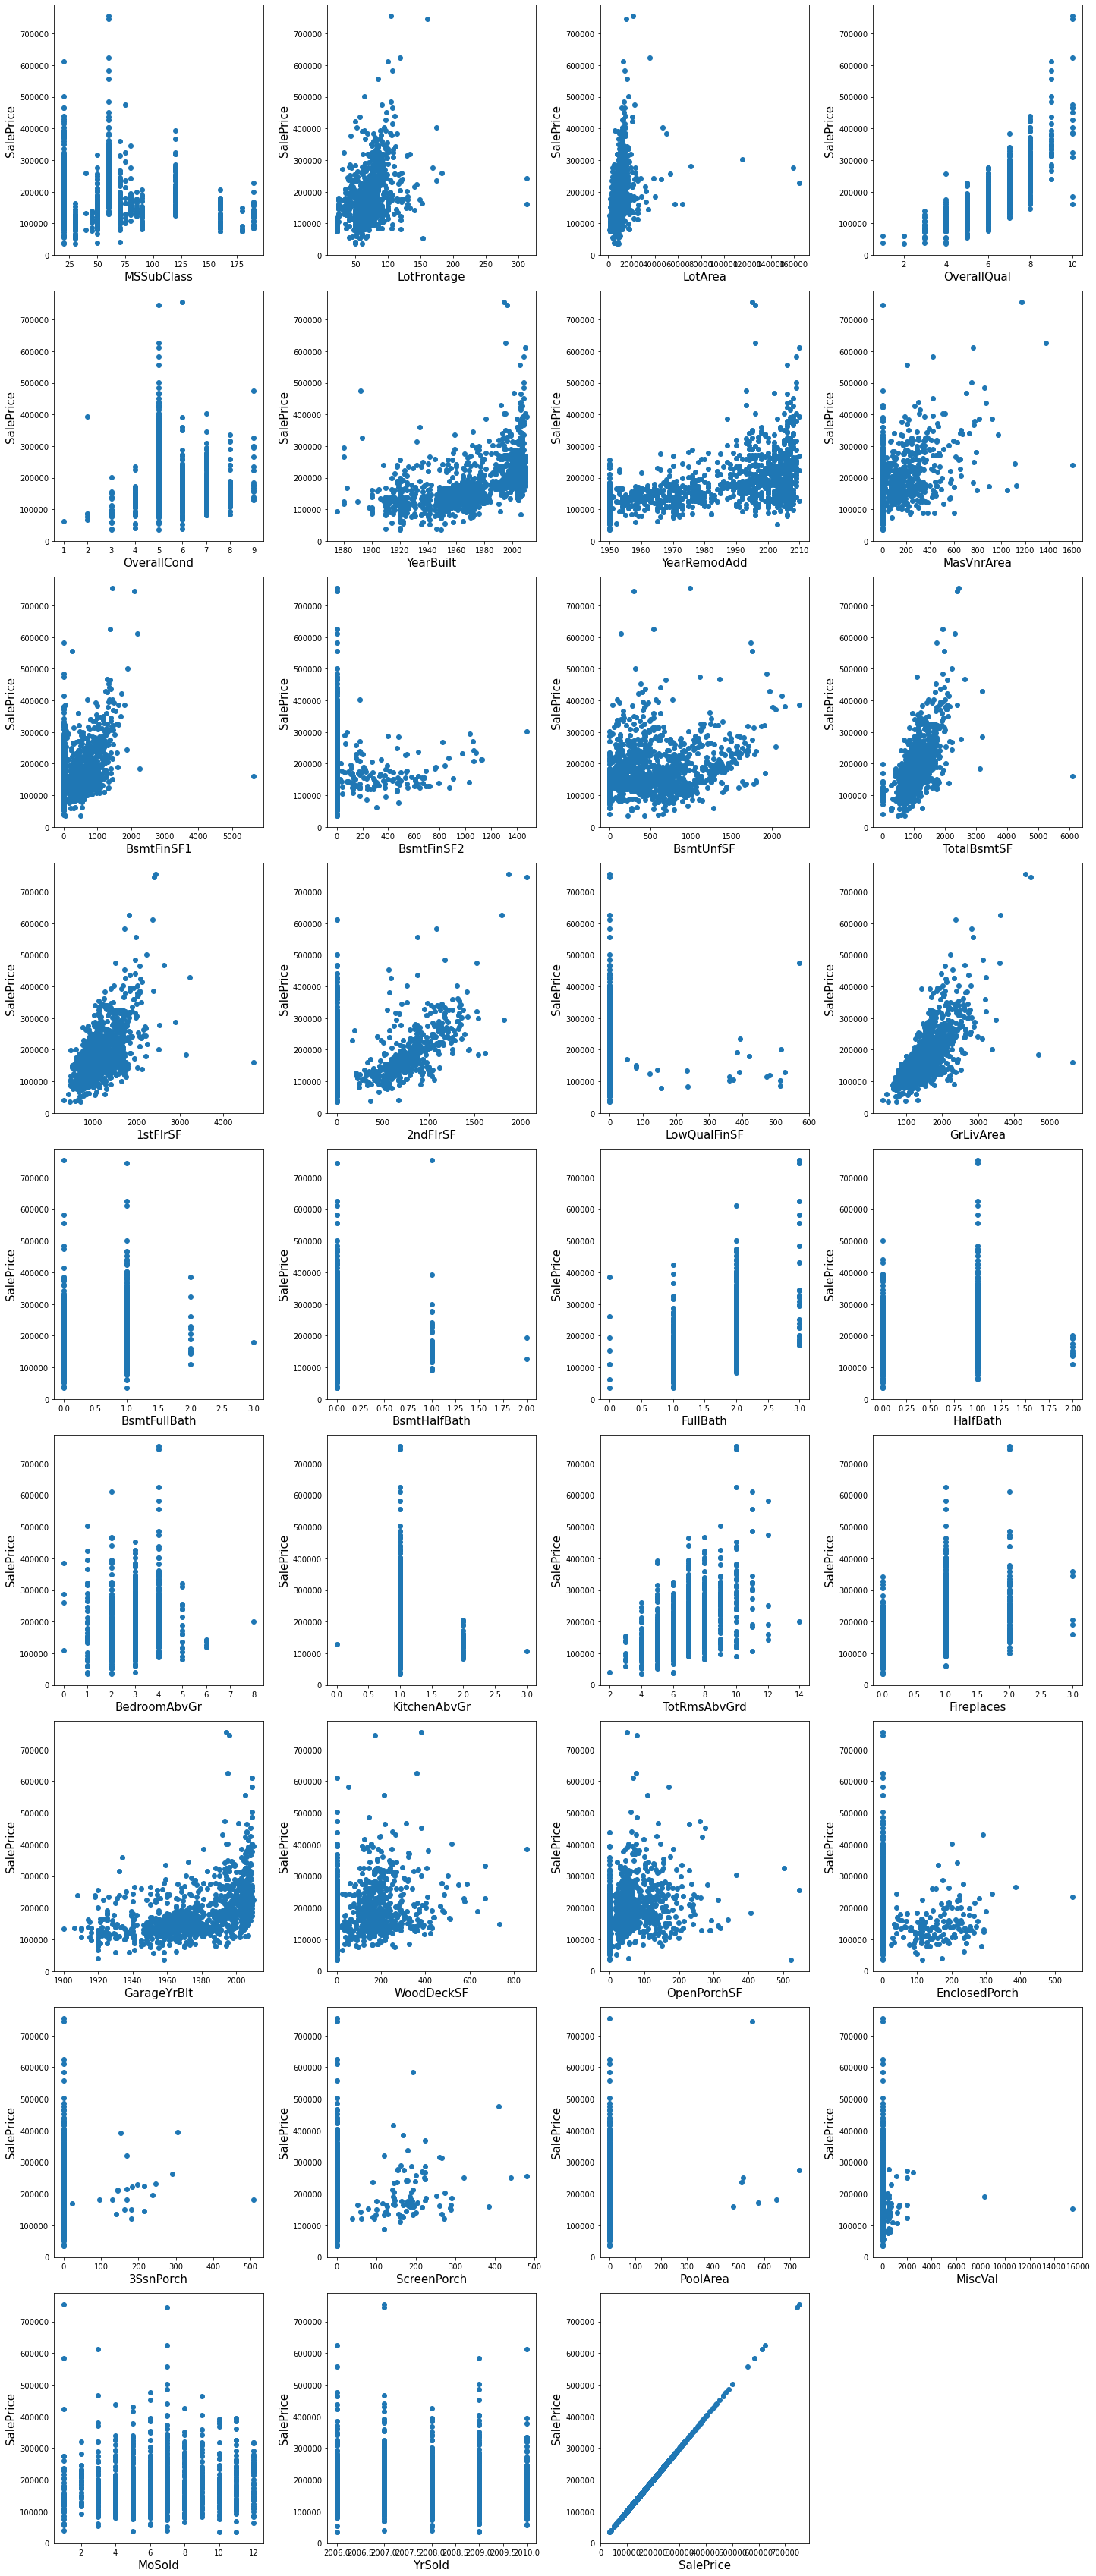

In [12]:
plt.figure(figsize=(20,52),facecolor='white')
plotnumber=1
for column in train_features:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        plt.scatter(train_features[column],y)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('SalePrice',fontsize=15)
    plotnumber+=1
plt.tight_layout()

- The sale price of building class (MsSubClass) 25 to 100 are higher than the rest.
- The sale price and linear feet of street connected to property (LotFrontage), LotArea has a positive linear relation. 
- It seems some numerical columns are discrete. Like  overAllcond(Overall condition rating),overallQual(Overall material and finish quality),Bsmtfullbath, halfbath, fullbath,BsmtHalf bath, totrmsabvgrd(total rooms above grade (does not include bathrooms), BedroomAbvgr(Number of bedrooms above basement level),KitchenAbvGr(Number of kitchens), fireplaces, Mosold(Month Sold), Yrsold .
- Sale price of category 5 of overAllcond(Overall condition rating) is highest.
- Yearbuilt, YearRemodAdd(Remodel date), MasVnrArea , BsmtFinSF1 (Type 1 finished square feet), BsmtFinSF2( Type 2 finished square fee), BsmtUnfSF (Unfinished square feet of basement area), TotalBsmtSF (Total square feet of basement area), 1stFlrSF, 2ndFlrSF,GrlivArea(Above grade (ground) living area square feet), GarageYrBlt(Year garage was built),WoodDeckSF (Wood deck area in square feet),OpenPorchSF(Open porch area in square feet),EnclosedPorch(Enclosed porch area in square feet) features are having somewhat positive linear relation with sale price.

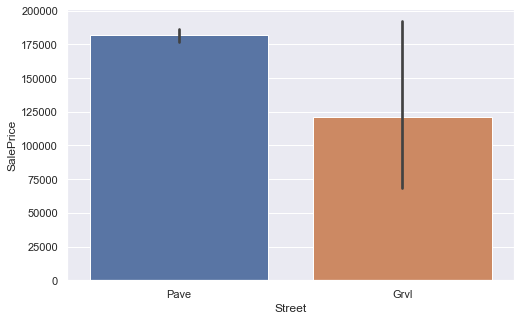

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(x='Street',y='SalePrice',data=train)
plt.show()

- Street type Pave is more costlier than Grvl.

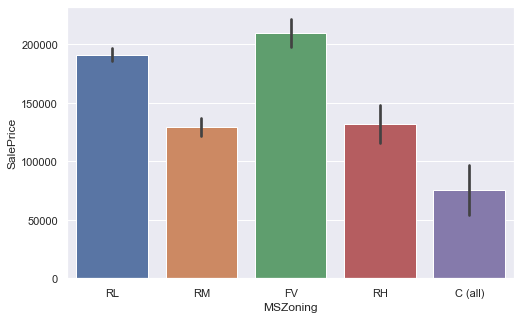

In [31]:
plt.figure(figsize=(8,5))
sns.barplot(x='MSZoning',y='SalePrice',data=train)
plt.show()

- FV zone is most coslier than the rest of the zones.

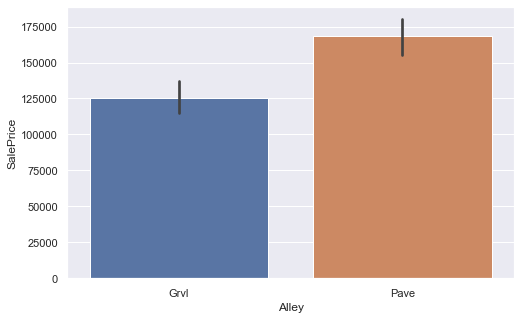

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(x='Alley',y='SalePrice',data=train)
plt.show()

- Alley type Pave is more costlier than Grvl.

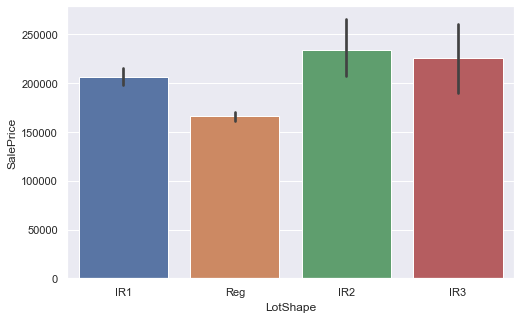

In [35]:
plt.figure(figsize=(8,5))
sns.barplot(x='LotShape',y='SalePrice',data=train)
plt.show()

- IR2 category of LotShape(General shape of property) is costlier than rest of the categories.

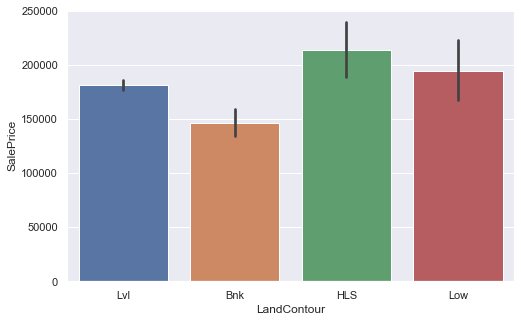

In [36]:
plt.figure(figsize=(8,5))
sns.barplot(x='LandContour',y='SalePrice',data=train)
plt.show()

- HLS category of LandContour(Flatness of the property) is costlier than rest of the categories.

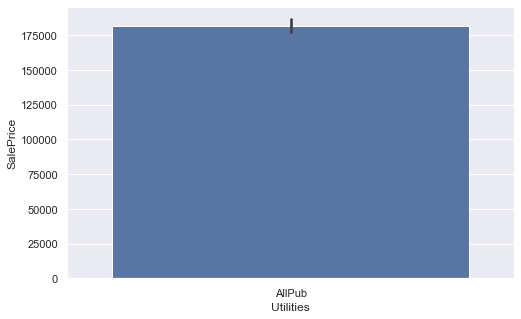

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(x='Utilities',y='SalePrice',data=train)
plt.show()

- Utilities has only one category and that is AllPub.

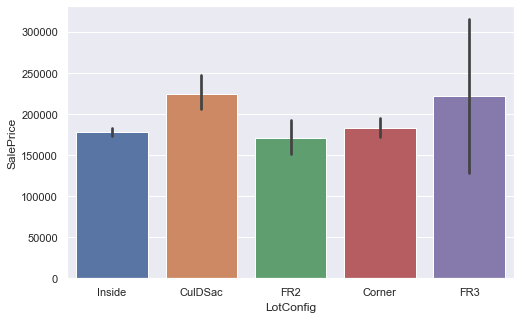

In [38]:
plt.figure(figsize=(8,5))
sns.barplot(x='LotConfig',y='SalePrice',data=train)
plt.show()

- FR3 category of LotConfig(Lot configuration) is costlier than rest of the categories.

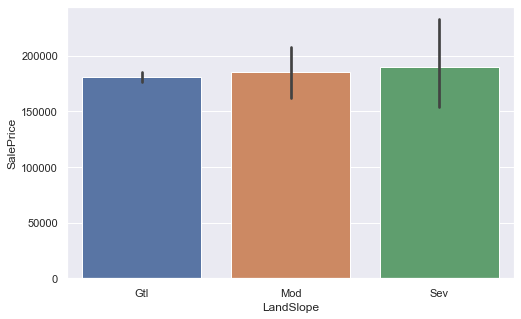

In [39]:
plt.figure(figsize=(8,5))
sns.barplot(x='LandSlope',y='SalePrice',data=train)
plt.show()

- Sev category ofLandSlope(Slope of property) is costlier than rest of the categories.

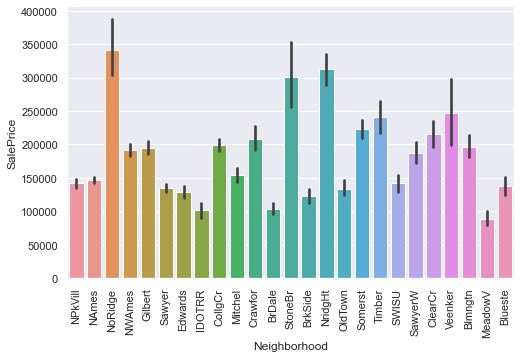

In [41]:
plt.figure(figsize=(8,5))
sns.barplot(x='Neighborhood',y='SalePrice',data=train)
plt.xticks(rotation=90)
plt.show()

- NoRidge of Neighborhood(Physical locations within Ames city limits) is costlier than rest of the categories.

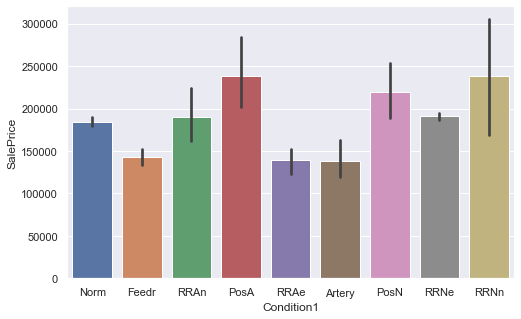

In [42]:
plt.figure(figsize=(8,5))
sns.barplot(x='Condition1',y='SalePrice',data=train)
plt.show()

- PosA and RRNn of Condition1(Proximity to main road or railroad) are costlier than rest of the categories.

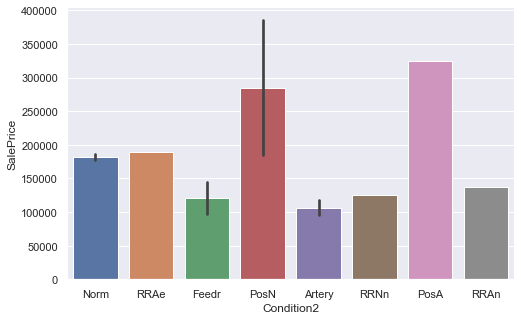

In [43]:
plt.figure(figsize=(8,5))
sns.barplot(x='Condition2',y='SalePrice',data=train)
plt.show()

- PosA  of Condition2(proximity to main road or railroad (if a second is present)) is costlier than rest of the categories.

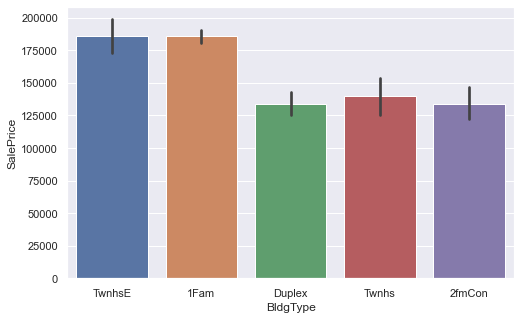

In [44]:
plt.figure(figsize=(8,5))
sns.barplot(x='BldgType',y='SalePrice',data=train)
plt.show()

- TwnhsE and 1Fan of BldgType(Type of dwelling) is costlier than rest of the categories.

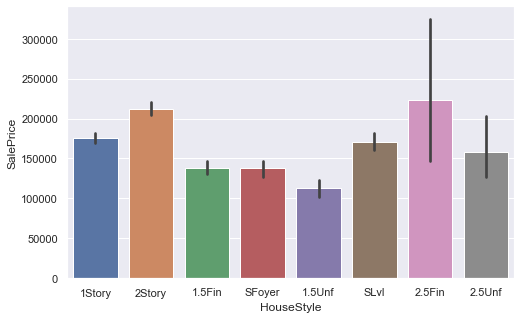

In [45]:
plt.figure(figsize=(8,5))
sns.barplot(x='HouseStyle',y='SalePrice',data=train)
plt.show()

- 2.5Fin of HouseStyle(Style of dwelling) is costlier than rest of the categories.

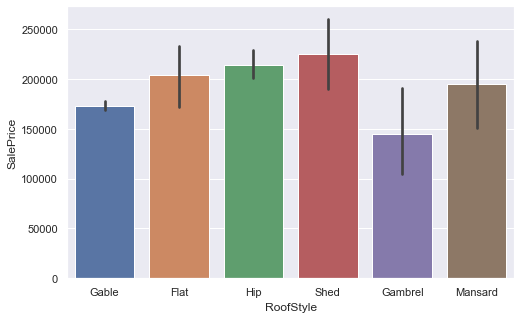

In [46]:
plt.figure(figsize=(8,5))
sns.barplot(x='RoofStyle',y='SalePrice',data=train)
plt.show()

- Shed of RoofStyle(Type of roof) is costlier than rest of the categories.

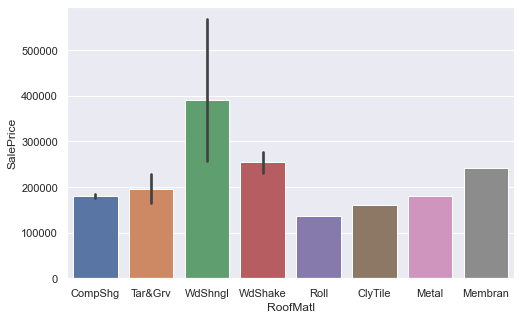

In [47]:
plt.figure(figsize=(8,5))
sns.barplot(x='RoofMatl',y='SalePrice',data=train)
plt.show()

- Wdshngl of RoofMatl(Roof material) is costlier than rest of the categories.

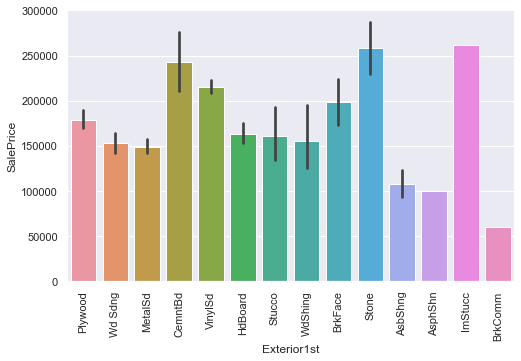

In [49]:
plt.figure(figsize=(8,5))
sns.barplot(x='Exterior1st',y='SalePrice',data=train)
plt.xticks(rotation=90)
plt.show()

-  Stone and ImStucc of Exterior1st(Exterior covering on house) are costlier than rest of the categories.

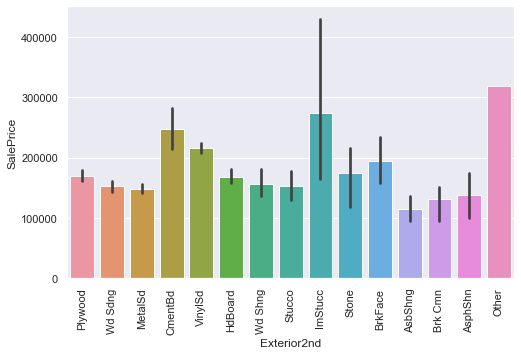

In [51]:
plt.figure(figsize=(8,5))
sns.barplot(x='Exterior2nd',y='SalePrice',data=train)
plt.xticks(rotation=90)
plt.show()

- Other of Exterior2nd( Exterior covering on house (if more than one material)) are costlier than rest of the categories.

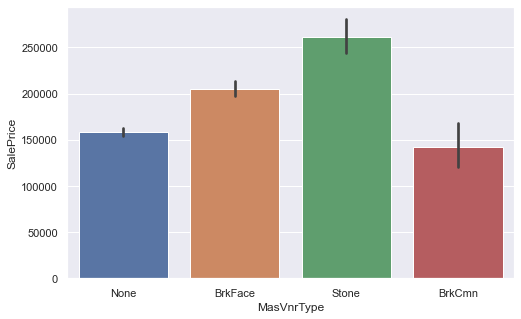

In [52]:
plt.figure(figsize=(8,5))
sns.barplot(x='MasVnrType',y='SalePrice',data=train)
plt.show()

- Stone of MasVnrType( Masonry veneer type) are costlier than rest of the categories.

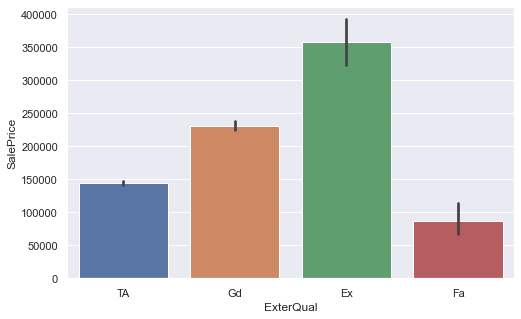

In [53]:
plt.figure(figsize=(8,5))
sns.barplot(x='ExterQual',y='SalePrice',data=train)
plt.show()

- Ex of ExterQual(Exterior material quality) are costlier than rest of the categories.

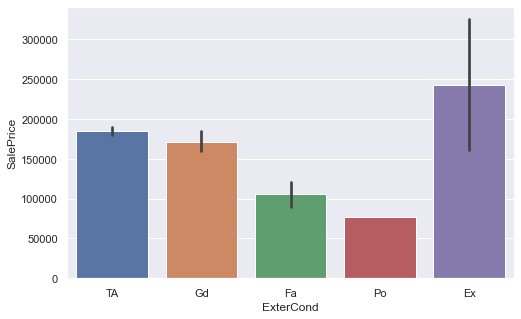

In [54]:
plt.figure(figsize=(8,5))
sns.barplot(x='ExterCond',y='SalePrice',data=train)
plt.show()

- Ex of ExterCond(Present condition of the material on the exterior)is costlier than rest of the categories.

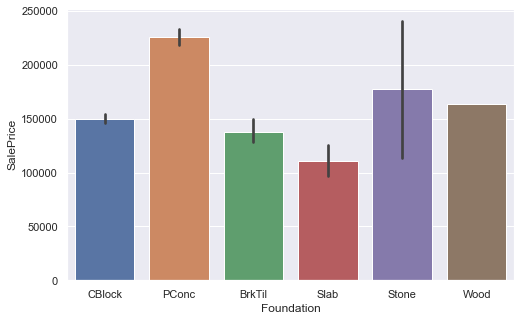

In [55]:
plt.figure(figsize=(8,5))
sns.barplot(x='Foundation',y='SalePrice',data=train)
plt.show()

- PConc of Foundation(Type of foundation) is costlier than rest of the categories.

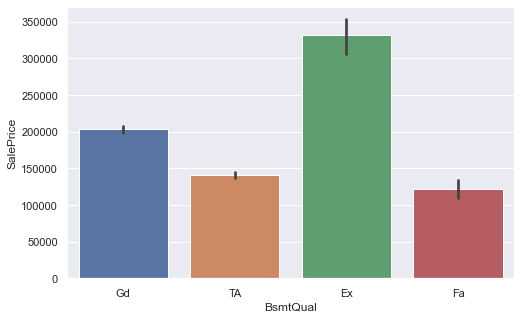

In [56]:
plt.figure(figsize=(8,5))
sns.barplot(x='BsmtQual',y='SalePrice',data=train)
plt.show()

- Ex of BsmtQual(Height of the basement) is costlier than rest of the categories.

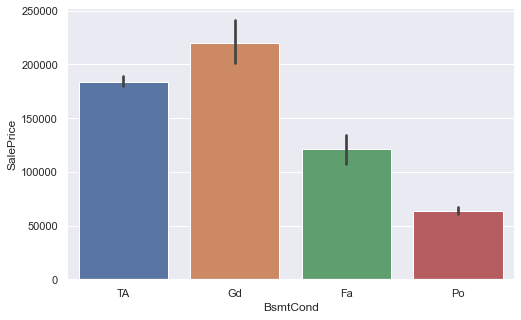

In [57]:
plt.figure(figsize=(8,5))
sns.barplot(x='BsmtCond',y='SalePrice',data=train)
plt.show()

- Gd of BsmtCond(General condition of the basement) is costlier than rest of the categories.

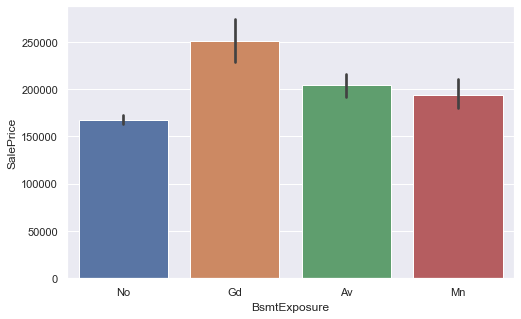

In [58]:
plt.figure(figsize=(8,5))
sns.barplot(x='BsmtExposure',y='SalePrice',data=train)
plt.show()

- Gd of BsmtExposure(Walkout or garden level basement walls) is costlier than rest of the categories.

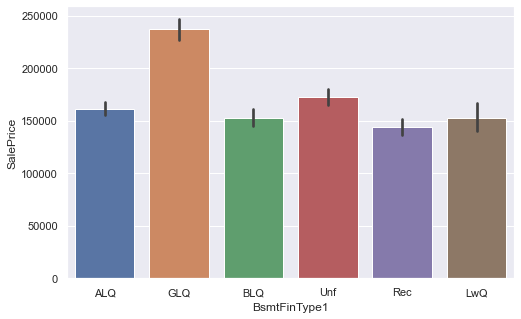

In [60]:
plt.figure(figsize=(8,5))
sns.barplot(x='BsmtFinType1',y='SalePrice',data=train)
plt.show()

- GLQ of BsmtFinType1(Quality of basement finished area) is costlier than rest of the categories.

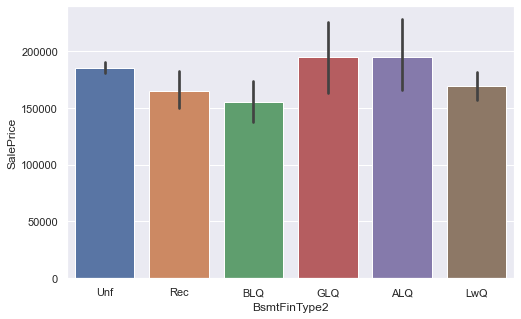

In [61]:
plt.figure(figsize=(8,5))
sns.barplot(x='BsmtFinType2',y='SalePrice',data=train)
plt.show()

- GLQ and ALQ of BsmtFinType2(Quality of second finished area (if present)) are costlier than rest of the categories.

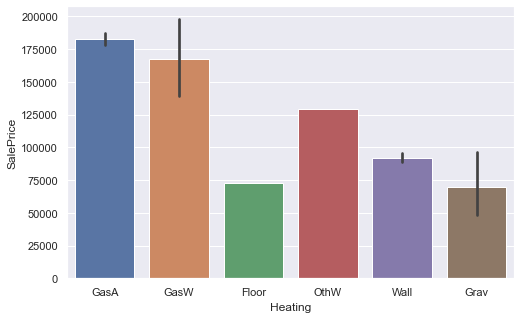

In [62]:
plt.figure(figsize=(8,5))
sns.barplot(x='Heating',y='SalePrice',data=train)
plt.show()

- GasA  of Heating( Type of heating) is costlier than rest of the categories.

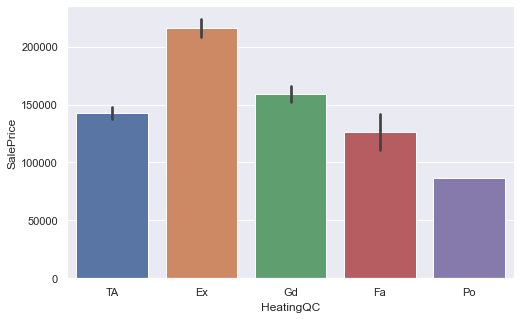

In [63]:
plt.figure(figsize=(8,5))
sns.barplot(x='HeatingQC',y='SalePrice',data=train)
plt.show()

- Ex  of HeatingQC(Heating quality and condition) is costlier than rest of the categories.

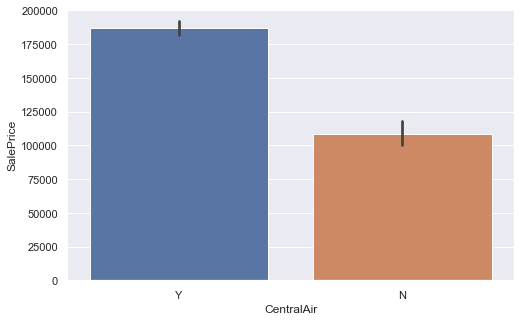

In [64]:
plt.figure(figsize=(8,5))
sns.barplot(x='CentralAir',y='SalePrice',data=train)
plt.show()

- With Central air conditioning, the sale price is more. 

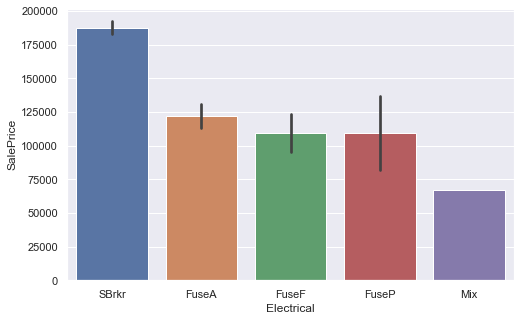

In [65]:
plt.figure(figsize=(8,5))
sns.barplot(x='Electrical',y='SalePrice',data=train)
plt.show()

- SBrkr  of Electrical(Electrical system) is costlier than rest of the categories.

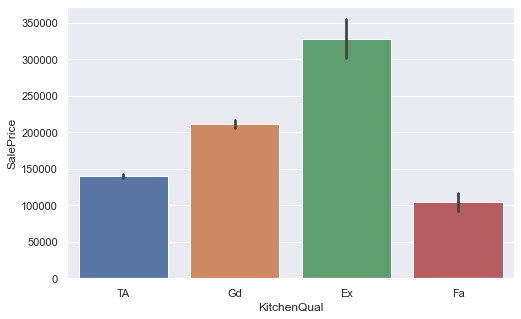

In [66]:
plt.figure(figsize=(8,5))
sns.barplot(x='KitchenQual',y='SalePrice',data=train)
plt.show()

- Ex of KitchenQual(Kitchen quality) is costlier than rest of the categories.

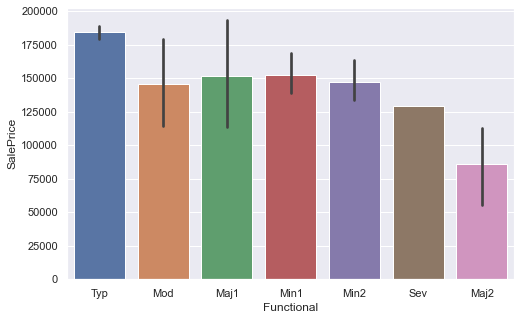

In [67]:
plt.figure(figsize=(8,5))
sns.barplot(x='Functional',y='SalePrice',data=train)
plt.show()

- Typ of Functional(Home functionality rating) is costlier than rest of the categories.

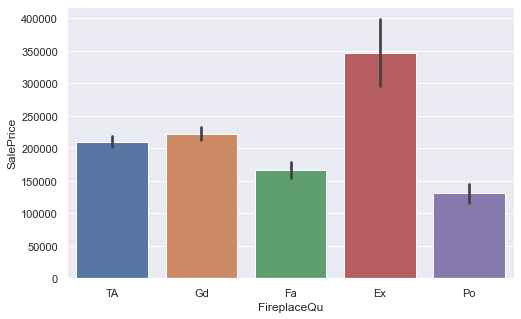

In [68]:
plt.figure(figsize=(8,5))
sns.barplot(x='FireplaceQu',y='SalePrice',data=train)
plt.show()

- Ex of FireplaceQu(Fireplace quality) is costlier than rest of the categories.

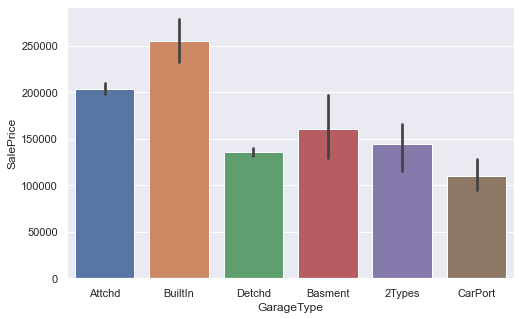

In [69]:
plt.figure(figsize=(8,5))
sns.barplot(x='GarageType',y='SalePrice',data=train)
plt.show()

- Builtin of GarageType(Garage location) is costlier than rest of the categories.

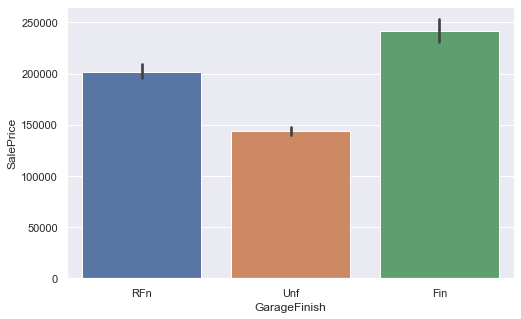

In [70]:
plt.figure(figsize=(8,5))
sns.barplot(x='GarageFinish',y='SalePrice',data=train)
plt.show()

- Fin of GarageFinish(Interior finish of the garage) is costlier than rest of the categories.

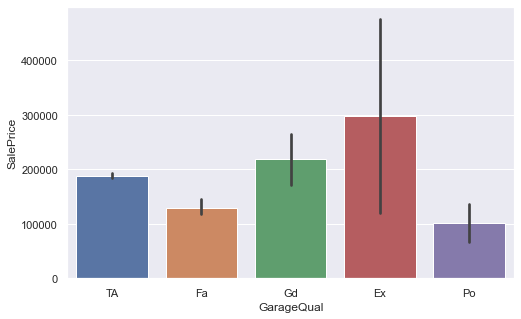

In [71]:
plt.figure(figsize=(8,5))
sns.barplot(x='GarageQual',y='SalePrice',data=train)
plt.show()

- Ex of GarageQual(Garage quality) is costlier than rest of the categories.

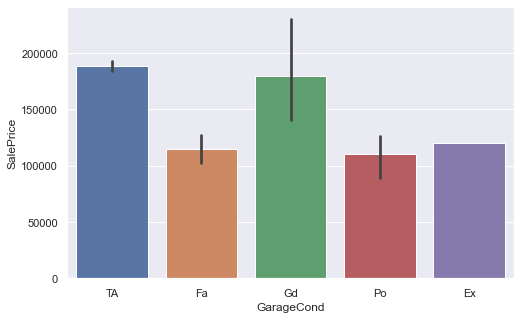

In [72]:
plt.figure(figsize=(8,5))
sns.barplot(x='GarageCond',y='SalePrice',data=train)
plt.show()

- TA of GarageCond(Garage condition) is costlier than rest of the categories.

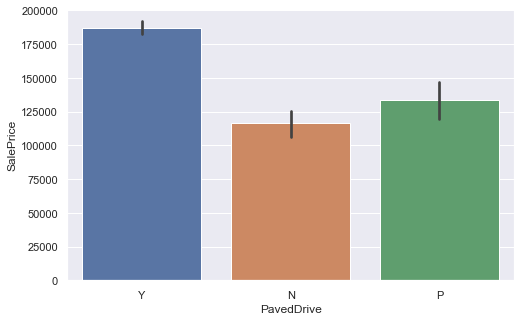

In [73]:
plt.figure(figsize=(8,5))
sns.barplot(x='PavedDrive',y='SalePrice',data=train)
plt.show()

- Y (yes)of PavedDrive(Paved driveway) is costlier than rest of the categories.

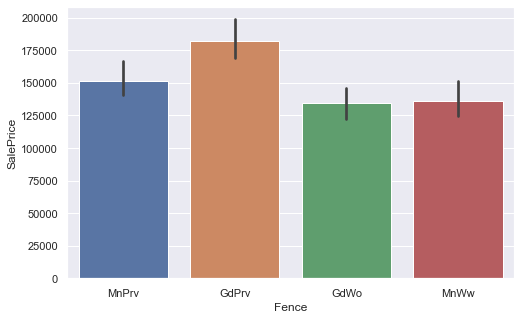

In [75]:
plt.figure(figsize=(8,5))
sns.barplot(x='Fence',y='SalePrice',data=train)
plt.show()

- GdPv of Fence(Fence quality) is costlier than rest of the categories.

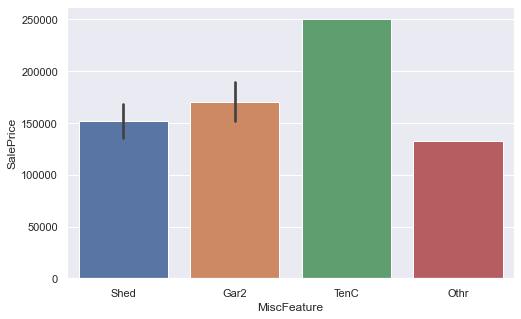

In [76]:
plt.figure(figsize=(8,5))
sns.barplot(x='MiscFeature',y='SalePrice',data=train)
plt.show()

- TenC of MiscFeature(Miscellaneous feature not covered in other categories) is costlier than rest of the categories.

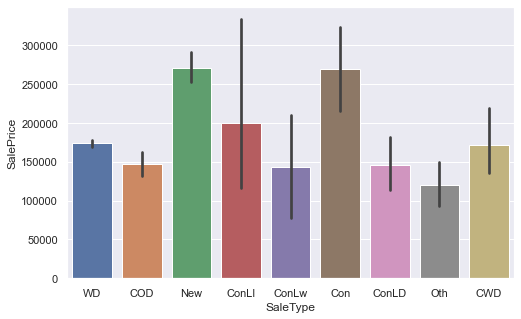

In [77]:
plt.figure(figsize=(8,5))
sns.barplot(x='SaleType',y='SalePrice',data=train)
plt.show()

- New and Con of SaleType(Type of sale) are costlier than rest of the categories.

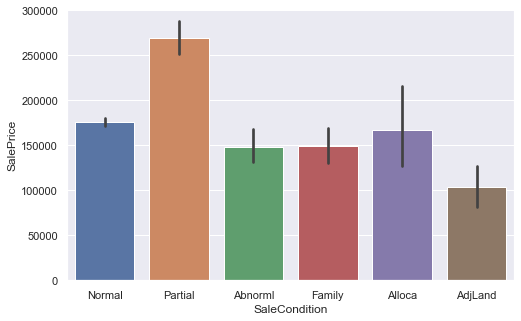

In [79]:
plt.figure(figsize=(8,5))
sns.barplot(x='SaleCondition',y='SalePrice',data=train)
plt.show()

- Partial of SaleCondition( Condition of sale) is costlier than rest of the categories.

#### Checking Multicolinearity:

Let's find the coefficient of multicolinearty to check if any feature is corelated to another featue or not.

In [114]:
corr = train.corr()
corr.shape

(38, 38)

#### Plotting heatmap (correlation matrix) :

Let's try to see if we can reduce the features of train dataset , using different techniques. Let's plot Heatmap to visualize and find the coefficient and multicolinearity.

#### for train dataset: 

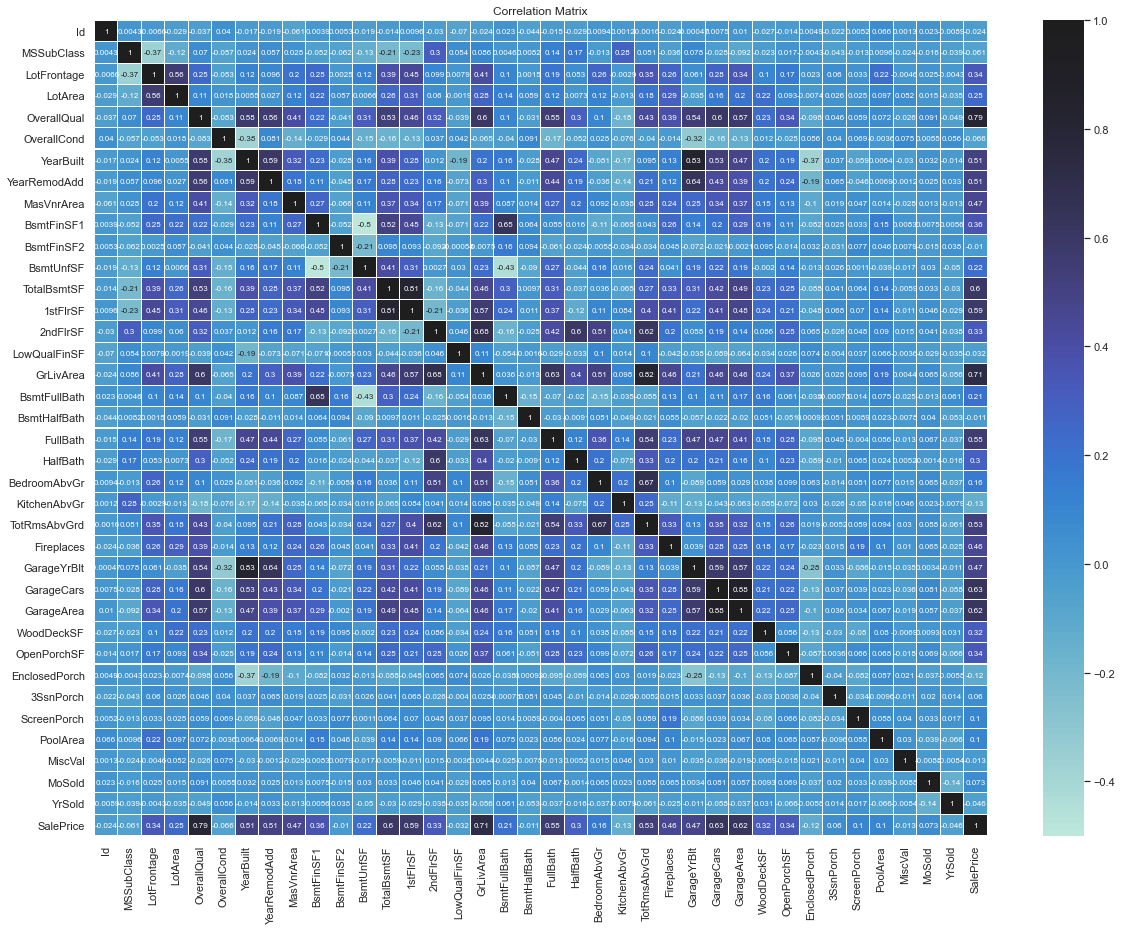

In [107]:
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True,linewidths=.1,center=True,annot_kws={'size':8})
plt.title('Correlation Matrix')
plt.show()

- Some features are having correlation with other features like, GarageYrBilt correlated with Yrbuilt, GarageCars correlated with GarageArea,1stFlrSF correlated with TotalBsmtSF.
- The features which are highly correlated with Sale price (label), OverallQual(0.79), GrLivArea(0.71).

#### Checking Multicolinearity : for test dataset

In [113]:
corr2 = test.corr()
corr2.shape

(38, 38)

#### for test dataset: 

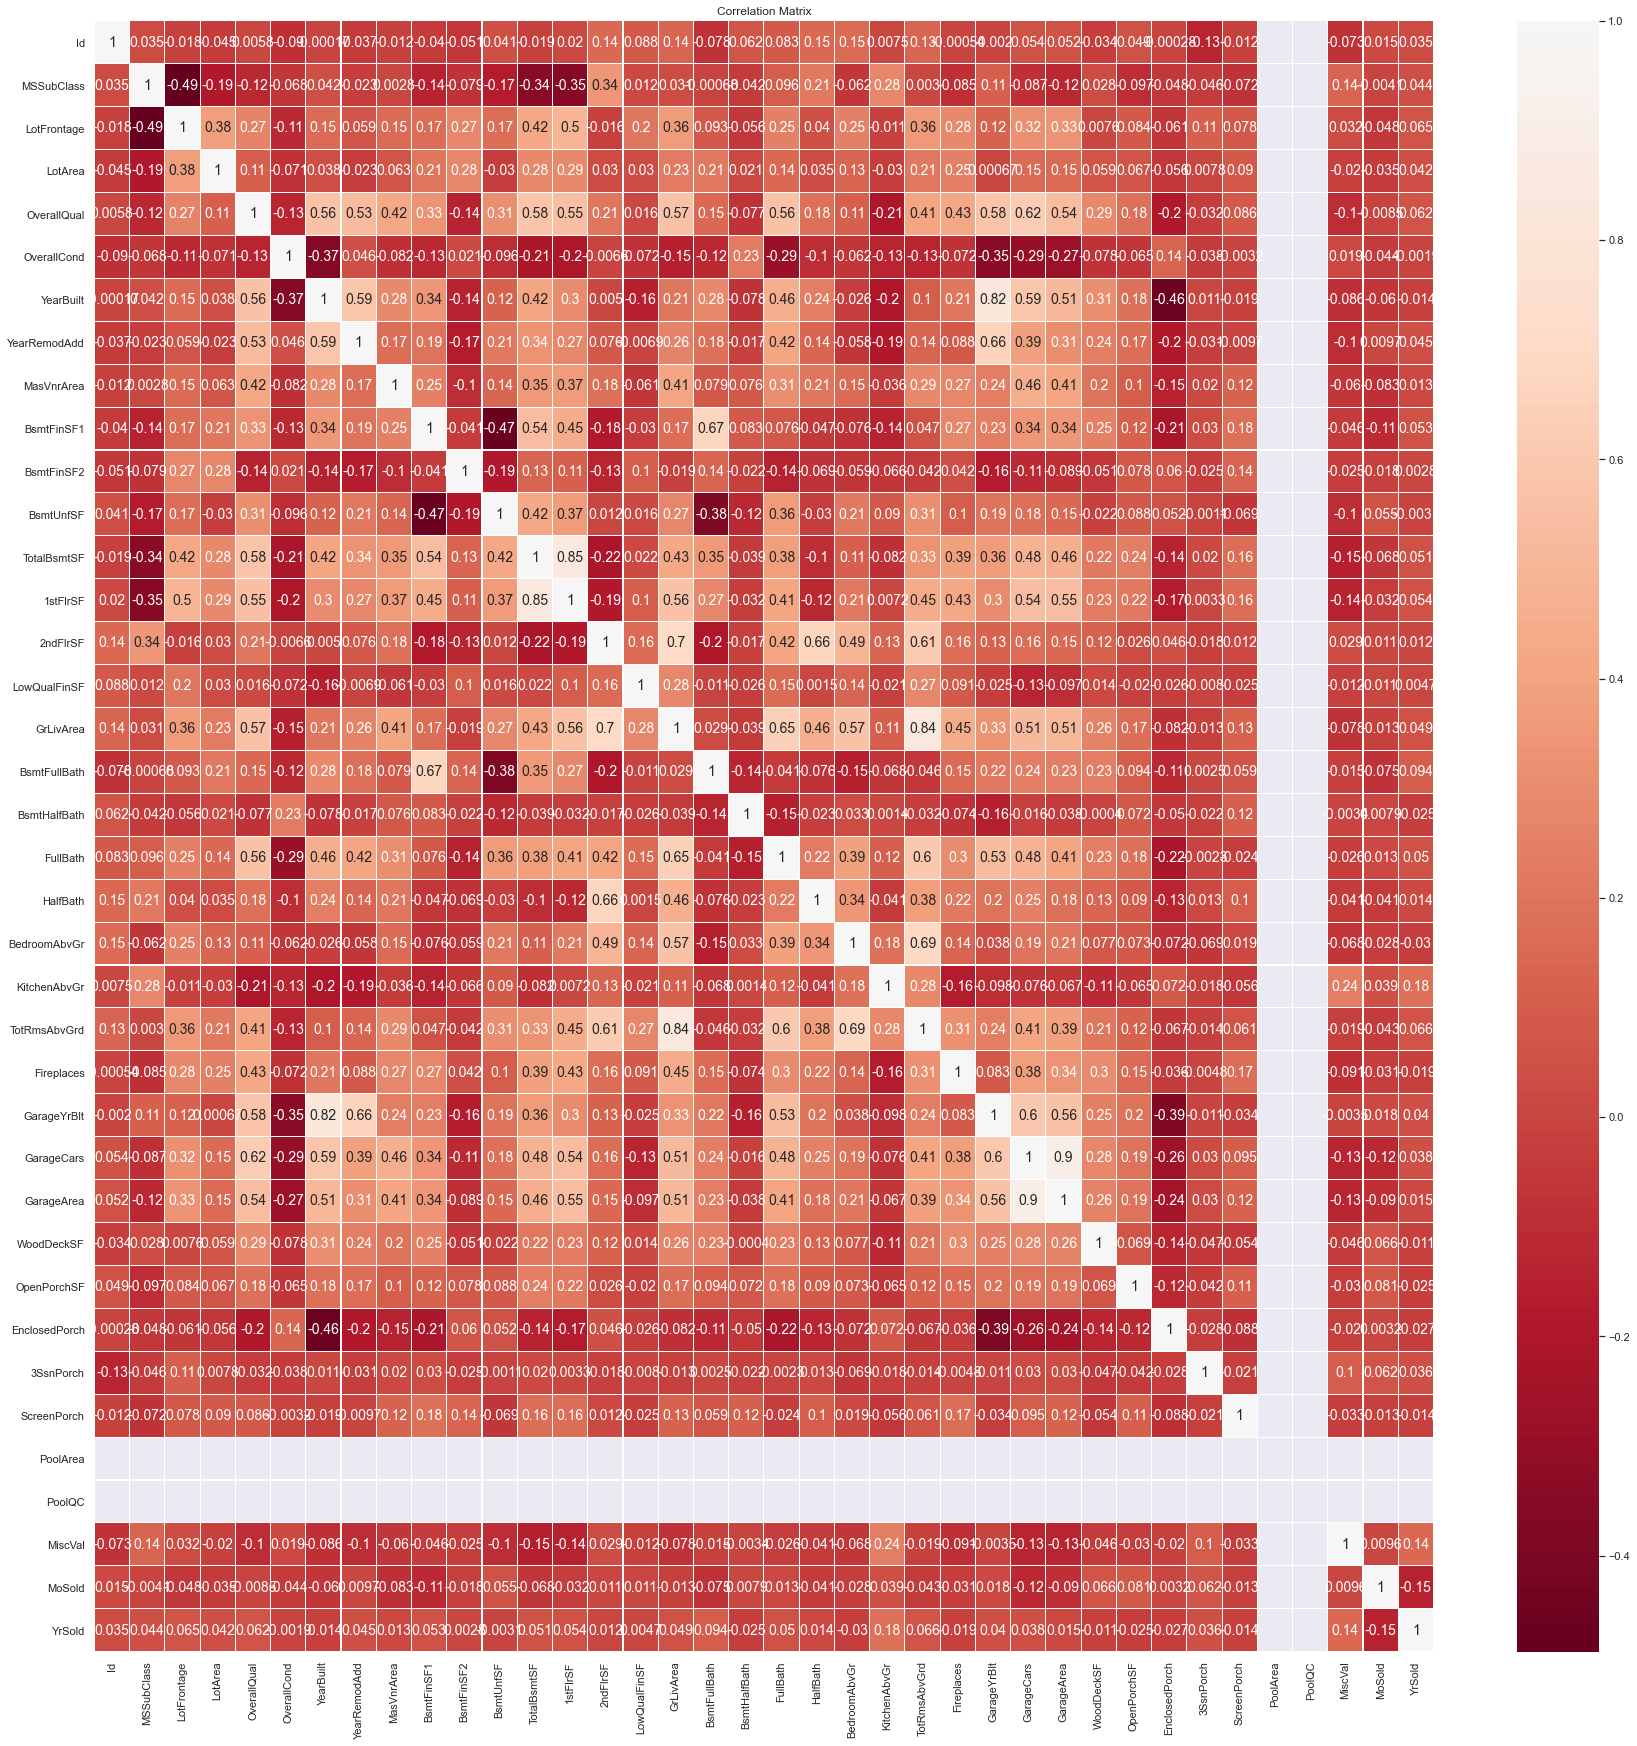

In [112]:
plt.figure(figsize=(30,30))
sns.heatmap(corr2,annot=True,linewidths=.1,center=True,annot_kws={'size':14},cmap='RdBu')
plt.title('Correlation Matrix')
plt.show()

- GarageCars and GarageArea are highly correlated.
- PoolArea And PoolQC features are not having any data.


In [136]:
# Checking the skewness as well for train dataset
train.skew()

Id                0.026526
MSSubClass        1.422019
LotFrontage       2.450241
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.826173
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.644564
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
S

#### Data Engineering and Data cleaning:

- 1. Treating Missing values:(train dataset)

In [7]:
## Fill Missing Values

train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())

In [8]:
train.drop(['Alley'],axis=1,inplace=True)

In [9]:
train['BsmtCond']=train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])
train['BsmtQual']=train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])
train['FireplaceQu']=train['FireplaceQu'].fillna(train['FireplaceQu'].mode()[0])
train['GarageType']=train['GarageType'].fillna(train['GarageType'].mode()[0])
train['GarageFinish']=train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
train['GarageQual']=train['GarageQual'].fillna(train['GarageQual'].mode()[0])
train['GarageCond']=train['GarageCond'].fillna(train['GarageCond'].mode()[0])
train['MasVnrType']=train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].mode()[0])
train['BsmtExposure']=train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])
train['BsmtFinType2']=train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])

In [10]:
train.drop(['GarageYrBlt'],axis=1,inplace=True)
train.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
train.drop(['Id'],axis=1,inplace=True)

In [11]:
train.shape

(1168, 75)

In [12]:
train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

<AxesSubplot:>

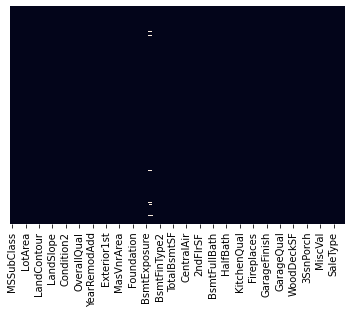

In [13]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [14]:
train.dropna(inplace=True)

<AxesSubplot:>

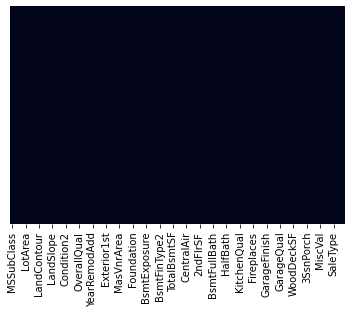

In [15]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [16]:
train.shape

(1138, 75)

In [17]:
train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL     70.98847     4928   Pave      IR1         Lvl   
1          20       RL     95.00000    15865   Pave      IR1         Lvl   
2          60       RL     92.00000     9920   Pave      IR1         Lvl   
3          20       RL    105.00000    11751   Pave      IR1         Lvl   
4          20       RL     70.98847    16635   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub    Inside       Mod  ...             0         0         224   
2    AllPub   CulDSac       Gtl  ...             0         0           0   
3    AllPub    Inside       Gtl  ...             0         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       2    2007        WD         Normal    128000  
1        0       0      10    2007        WD         Normal    268000  
2        0       0       6    2007        WD         Normal    269790  
3        0       0       1    2010       COD         Normal    190000  
4        0       0       6    2009        WD         Normal    215000  

[5 rows x 75 columns]

- As we had Missing values present in columns like LotFrontage, Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature columns we have cleaned those.
- Some of them were having mostly missing values so have drop those.

- 2. Outlier Removal:

In [18]:
train.skew()

MSSubClass        1.434555
LotFrontage       2.682628
LotArea          10.570292
OverallQual       0.213077
OverallCond       0.600933
YearBuilt        -0.603866
YearRemodAdd     -0.526921
MasVnrArea        2.823586
BsmtFinSF1        1.864461
BsmtFinSF2        4.301719
BsmtUnfSF         0.911528
TotalBsmtSF       2.450179
1stFlrSF          1.545811
2ndFlrSF          0.798435
LowQualFinSF      8.561046
GrLivArea         1.471110
BsmtFullBath      0.585490
BsmtHalfBath      4.200581
FullBath          0.057665
HalfBath          0.614719
BedroomAbvGr      0.211009
KitchenAbvGr      5.037803
TotRmsAbvGrd      0.661856
Fireplaces        0.655174
GarageCars       -0.338975
GarageArea        0.211320
WoodDeckSF        1.482858
OpenPorchSF       2.395399
EnclosedPorch     3.068346
3SsnPorch         9.933380
ScreenPorch       4.043944
PoolArea         13.070023
MiscVal          22.920502
MoSold            0.220003
YrSold            0.125708
SalePrice         1.964621
dtype: float64

In [19]:
train.drop(['PoolArea'],axis=1,inplace=True)

In [20]:
# taking all the features with skewness in a single list
features=['MSSubClass','LotArea','MasVnrArea','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
          'LowQualFinSF','BsmtHalfBath','KitchenAbvGr','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
          'ScreenPorch','MiscVal']

In [21]:
scaler=PowerTransformer(method='yeo-johnson')   # using yeo-johnson method

In [22]:
train[features]=scaler.fit_transform(train[features].values) # scaling the features

In [23]:
train[features]

MSSubClass  LotArea  MasVnrArea  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0       1.372832      0.0   -0.822960   -0.368413   0.890747     0.127027   
1      -1.170648      0.0   -0.822960    2.715967   1.021634     2.260271   
2       0.493341      0.0   -0.822960   -0.368413  -0.590963     0.227751   
3      -1.170648      0.0    1.381282   -0.368413   1.162897     1.696958   
4      -1.170648      0.0    1.136592   -0.368413  -0.300391     1.275356   
...          ...      ...         ...         ...        ...          ...   
1162   -0.517006      0.0   -0.822960   -0.368413   0.377475    -0.490224   
1163   -1.170648      0.0    0.786319   -0.368413  -0.109468    -0.433427   
1165    1.702018      0.0   -0.822960   -0.368413  -0.487344    -0.519013   
1166    0.699917      0.0   -0.822960   -0.368413   0.354406    -1.263525   
1167    0.493341      0.0   -0.822960   -0.368413  -0.381597    -0.759383   

      1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtHalfBath  KitchenAbvGr  \
0          0.0 -0.881044     -0.140404     -0.242084     -0.143956   
1          0.0 -0.881044     -0.140404     -0.242084     -0.143956   
2          0.0  1.164342     -0.140404     -0.242084     -0.143956   
3          0.0 -0.881044     -0.140404     -0.242084     -0.143956   
4          0.0 -0.881044     -0.140404      4.130798     -0.143956   
...        ...       ...           ...           ...           ...   
1162       0.0 -0.881044     -0.140404     -0.242084     -0.143956   
1163       0.0 -0.881044     -0.140404     -0.242084     -0.143956   
1165       0.0  1.086211     -0.140404     -0.242084     -0.143956   
1166       0.0  1.107836     -0.140404     -0.242084     -0.143956   
1167       0.0  1.117903     -0.140404     -0.242084     -0.143956   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch   MiscVal  
0      -0.973434     1.411963      -0.411799  -0.137114    -0.301800 -0.190866  
1       0.756339     1.416727      -0.411799  -0.137114     3.313479 -0.190866  
2       1.027229     1.189774      -0.411799  -0.137114    -0.301800 -0.190866  
3      -0.973434     1.159005      -0.411799  -0.137114    -0.301800 -0.190866  
4       1.122463    -1.079657      -0.411799  -0.137114    -0.301800 -0.190866  
...          ...          ...            ...        ...          ...       ...  
1162   -0.973434    -1.079657       2.427683  -0.137114    -0.301800 -0.190866  
1163   -0.973434    -1.079657      -0.411799  -0.137114    -0.301800 -0.190866  
1165    0.780956    -1.079657      -0.411799  -0.137114    -0.301800 -0.190866  
1166   -0.973434     0.769393       2.430469  -0.137114    -0.301800 -0.190866  
1167    0.828725     0.925190      -0.411799  -0.137114    -0.301800 -0.190866  

[1138 rows x 17 columns]

- We have used power transfer (yeo-johnson method) to remove the skewness from the features .

- 3. Encoding:

In [24]:
enc=OrdinalEncoder()
for i in train.columns:
    if train[i].dtypes=='object':
        train[i]=enc.fit_transform(train[i].values.reshape(-1,1))
train

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0       1.372832       3.0     70.98847      0.0     1.0       0.0   
1      -1.170648       3.0     95.00000      0.0     1.0       0.0   
2       0.493341       3.0     92.00000      0.0     1.0       0.0   
3      -1.170648       3.0    105.00000      0.0     1.0       0.0   
4      -1.170648       3.0     70.98847      0.0     1.0       0.0   
...          ...       ...          ...      ...     ...       ...   
1162   -0.517006       3.0     45.00000      0.0     1.0       3.0   
1163   -1.170648       3.0     70.98847      0.0     1.0       0.0   
1165    1.702018       3.0     24.00000      0.0     1.0       3.0   
1166    0.699917       0.0     50.00000      0.0     1.0       3.0   
1167    0.493341       3.0     70.98847      0.0     1.0       0.0   

      LandContour  Utilities  LotConfig  LandSlope  ...  OpenPorchSF  \
0             3.0        0.0        4.0        0.0  ...     1.411963   
1             3.0        0.0        4.0        1.0  ...     1.416727   
2             3.0        0.0        1.0        0.0  ...     1.189774   
3             3.0        0.0        4.0        0.0  ...     1.159005   
4             3.0        0.0        2.0        0.0  ...    -1.079657   
...           ...        ...        ...        ...  ...          ...   
1162          3.0        0.0        4.0        0.0  ...    -1.079657   
1163          3.0        0.0        4.0        0.0  ...    -1.079657   
1165          3.0        0.0        2.0        0.0  ...    -1.079657   
1166          3.0        0.0        4.0        0.0  ...     0.769393   
1167          3.0        0.0        4.0        0.0  ...     0.925190   

      EnclosedPorch  3SsnPorch  ScreenPorch   MiscVal  MoSold  YrSold  \
0         -0.411799  -0.137114    -0.301800 -0.190866       2    2007   
1         -0.411799  -0.137114     3.313479 -0.190866      10    2007   
2         -0.411799  -0.137114    -0.301800 -0.190866       6    2007   
3         -0.411799  -0.137114    -0.301800 -0.190866       1    2010   
4         -0.411799  -0.137114    -0.301800 -0.190866       6    2009   
...             ...        ...          ...       ...     ...     ...   
1162       2.427683  -0.137114    -0.301800 -0.190866       6    2010   
1163      -0.411799  -0.137114    -0.301800 -0.190866       2    2010   
1165      -0.411799  -0.137114    -0.301800 -0.190866       7    2009   
1166       2.430469  -0.137114    -0.301800 -0.190866       7    2008   
1167      -0.411799  -0.137114    -0.301800 -0.190866       6    2006   

      SaleType  SaleCondition  SalePrice  
0          8.0            4.0     128000  
1          8.0            4.0     268000  
2          8.0            4.0     269790  
3          0.0            4.0     190000  
4          8.0            4.0     215000  
...        ...            ...        ...  
1162       8.0            4.0      58500  
1163       8.0            4.0     122000  
1165       8.0            4.0     148500  
1166       8.0            4.0      40000  
1167       8.0            4.0     183200  

[1138 rows x 74 columns]

- 1. Treating Missing values:(test dataset)

In [26]:
## Fill Missing Values

test['LotFrontage']=test['LotFrontage'].fillna(test['LotFrontage'].mean())

In [27]:
test['MSZoning']=test['MSZoning'].fillna(test['MSZoning'].mode()[0])

In [28]:
test.shape

(292, 80)

In [29]:
test.drop(['Alley'],axis=1,inplace=True)

In [30]:
test['BsmtCond']=test['BsmtCond'].fillna(test['BsmtCond'].mode()[0])
test['BsmtQual']=test['BsmtQual'].fillna(test['BsmtQual'].mode()[0])
test['FireplaceQu']=test['FireplaceQu'].fillna(test['FireplaceQu'].mode()[0])
test['GarageType']=test['GarageType'].fillna(test['GarageType'].mode()[0])
test['GarageFinish']=test['GarageFinish'].fillna(test['GarageFinish'].mode()[0])
test['GarageQual']=test['GarageQual'].fillna(test['GarageQual'].mode()[0])
test['GarageCond']=test['GarageCond'].fillna(test['GarageCond'].mode()[0])
test['MasVnrType']=test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])
test['MasVnrArea']=test['MasVnrArea'].fillna(test['MasVnrArea'].mode()[0])
test['BsmtExposure']=test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])

In [31]:
test.drop(['GarageYrBlt'],axis=1,inplace=True)
test.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
test.drop(['Id'],axis=1,inplace=True)

<AxesSubplot:>

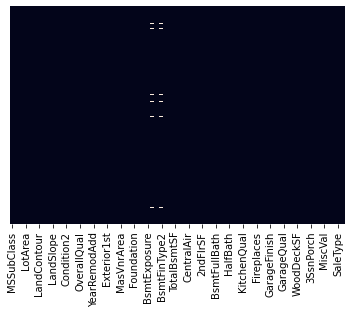

In [32]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

In [33]:
test['BsmtFinType2']=test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0])

In [34]:
test.shape

(292, 74)

<AxesSubplot:>

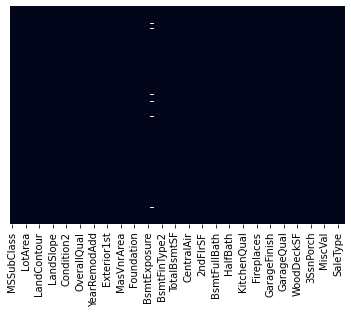

In [35]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

In [36]:
test.loc[:, test.isnull().any()].head()

BsmtFinType1 Electrical
0          GLQ      SBrkr
1          GLQ      SBrkr
2          Unf      SBrkr
3          Rec      SBrkr
4          Unf      SBrkr

In [37]:
test['BsmtFinType1']=test['BsmtFinType1'].fillna(test['BsmtFinType1'].mode()[0])
test['Electrical']=test['Electrical'].fillna(test['Electrical'].mode()[0])

<AxesSubplot:>

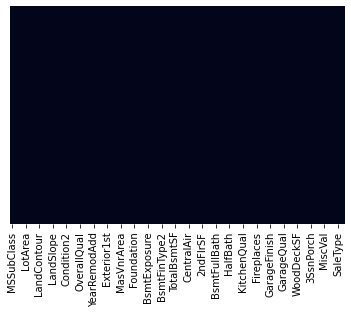

In [38]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

- In test dataset there were Missing values present in columns like LotFrontage, Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1,Electrical, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, Fence, MiscFeatureHence we have cleaned those. 
- Some of them were having mostly missing values so have drop those.
- PoolQC is having only 0 values that we had to drop it

- 2. Outlier Removal:

In [39]:
test.skew()

MSSubClass        1.358597
LotFrontage       0.466813
LotArea          12.781805
OverallQual       0.397312
OverallCond       1.209714
YearBuilt        -0.755233
YearRemodAdd     -0.535600
MasVnrArea        1.978463
BsmtFinSF1        0.739790
BsmtFinSF2        3.698543
BsmtUnfSF         0.960708
TotalBsmtSF       0.519257
1stFlrSF          0.692047
2ndFlrSF          0.765511
LowQualFinSF     10.929928
GrLivArea         1.010586
BsmtFullBath      0.463685
BsmtHalfBath      3.544994
FullBath         -0.049800
HalfBath          0.758892
BedroomAbvGr      0.075315
KitchenAbvGr      4.849432
TotRmsAbvGrd      0.805535
Fireplaces        0.540164
GarageCars       -0.280324
GarageArea        0.133547
WoodDeckSF        1.708221
OpenPorchSF       2.185030
EnclosedPorch     3.177046
3SsnPorch        12.277476
ScreenPorch       4.182351
PoolArea          0.000000
MiscVal          13.264758
MoSold            0.186504
YrSold            0.018412
dtype: float64

In [40]:
test.drop(['PoolArea'],axis=1,inplace=True)

In [41]:
# taking all the features with skewness in a single list
features=['MSSubClass','LotArea','MasVnrArea','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
          'LowQualFinSF','BsmtHalfBath','KitchenAbvGr','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
          'ScreenPorch','MiscVal']

In [42]:
scaler=PowerTransformer(method='yeo-johnson')   # using yeo-johnson method

In [43]:
test[features]=scaler.fit_transform(test[features].values) # scaling the features

In [44]:
test[features]

MSSubClass   LotArea  MasVnrArea  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0     -1.149768  0.842656    1.190680   -0.344636   0.455087     1.931242   
1      1.337666 -0.739104   -0.840837   -0.344636  -0.841820     0.451268   
2     -1.149768  0.524304   -0.840837   -0.344636   2.127575     1.587714   
3      0.705404  0.548484   -0.840837   -0.344636  -0.093395    -0.761116   
4      0.507343  0.897263    0.964275   -0.344636   0.870427    -0.297412   
..          ...       ...         ...         ...        ...          ...   
287   -1.149768  0.260474    1.350628   -0.344636   1.838240     1.192686   
288   -1.149768  0.084663   -0.840837   -0.344636  -0.436723    -0.071527   
289   -1.149768  0.432254    1.168809   -0.344636  -0.101000    -0.038996   
290    0.262613 -1.006703   -0.840837   -0.344636   0.313932    -0.038996   
291    1.639382 -2.671270    1.326705   -0.344636  -0.880894    -1.337263   

     1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtHalfBath  KitchenAbvGr  WoodDeckSF  \
0    1.814725 -0.870294     -0.101885     -0.263813     -0.222883    1.119038   
1    0.726749 -0.870294     -0.101885     -0.263813     -0.222883    0.813787   
2    1.586900 -0.870294     -0.101885     -0.263813     -0.222883    1.153748   
3   -0.705442  1.137231     -0.101885     -0.263813     -0.222883   -0.913570   
4   -0.584696  1.211129     -0.101885     -0.263813     -0.222883    0.954066   
..        ...       ...           ...           ...           ...         ...   
287  1.163629 -0.870294     -0.101885     -0.263813     -0.222883    1.059685   
288 -0.266685 -0.870294     -0.101885      3.790570     -0.222883   -0.913570   
289 -0.222862 -0.870294     -0.101885     -0.263813     -0.222883   -0.913570   
290 -0.222862  1.124621     -0.101885     -0.263813     -0.222883   -0.913570   
291 -2.492702  1.070797     -0.101885     -0.263813     -0.222883    0.855070   

     OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch   MiscVal  
0       0.718308      -0.392619  -0.083045    -0.278372 -0.188311  
1      -1.111540      -0.392619  -0.083045    -0.278372 -0.188311  
2       1.278346      -0.392619  -0.083045    -0.278372 -0.188311  
3      -1.111540      -0.392619  -0.083045    -0.278372 -0.188311  
4       0.218396      -0.392619  -0.083045    -0.278372 -0.188311  
..           ...            ...        ...          ...       ...  
287     1.056273      -0.392619  -0.083045    -0.278372 -0.188311  
288    -1.111540      -0.392619  -0.083045    -0.278372 -0.188311  
289    -1.111540      -0.392619  -0.083045    -0.278372  5.310367  
290     0.352262       2.540755  -0.083045    -0.278372 -0.188311  
291    -1.111540      -0.392619  -0.083045    -0.278372 -0.188311  

[292 rows x 17 columns]

- 3. Encoding:

In [45]:
enc=OrdinalEncoder()
for i in test.columns:
    if test[i].dtypes=='object':
        test[i]=enc.fit_transform(test[i].values.reshape(-1,1))
test

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  \
0     -1.149768       2.0    86.000000  0.842656     1.0       0.0   
1      1.337666       2.0    66.425101 -0.739104     1.0       0.0   
2     -1.149768       2.0    66.425101  0.524304     1.0       3.0   
3      0.705404       2.0    75.000000  0.548484     1.0       3.0   
4      0.507343       2.0    86.000000  0.897263     1.0       0.0   
..          ...       ...          ...       ...     ...       ...   
287   -1.149768       2.0    78.000000  0.260474     1.0       3.0   
288   -1.149768       2.0    57.000000  0.084663     1.0       1.0   
289   -1.149768       2.0    66.425101  0.432254     1.0       0.0   
290    0.262613       3.0    50.000000 -1.006703     1.0       3.0   
291    1.639382       3.0    21.000000 -2.671270     1.0       3.0   

     LandContour  Utilities  LotConfig  LandSlope  ...  WoodDeckSF  \
0            1.0        0.0        0.0        0.0  ...    1.119038   
1            3.0        0.0        1.0        0.0  ...    0.813787   
2            3.0        0.0        4.0        0.0  ...    1.153748   
3            0.0        0.0        4.0        0.0  ...   -0.913570   
4            3.0        0.0        1.0        0.0  ...    0.954066   
..           ...        ...        ...        ...  ...         ...   
287          3.0        0.0        4.0        0.0  ...    1.059685   
288          3.0        0.0        4.0        0.0  ...   -0.913570   
289          3.0        0.0        1.0        0.0  ...   -0.913570   
290          3.0        0.0        0.0        0.0  ...   -0.913570   
291          3.0        0.0        4.0        0.0  ...    0.855070   

     OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch   MiscVal  MoSold  \
0       0.718308      -0.392619  -0.083045    -0.278372 -0.188311       7   
1      -1.111540      -0.392619  -0.083045    -0.278372 -0.188311       8   
2       1.278346      -0.392619  -0.083045    -0.278372 -0.188311       6   
3      -1.111540      -0.392619  -0.083045    -0.278372 -0.188311       7   
4       0.218396      -0.392619  -0.083045    -0.278372 -0.188311       1   
..           ...            ...        ...          ...       ...     ...   
287     1.056273      -0.392619  -0.083045    -0.278372 -0.188311      10   
288    -1.111540      -0.392619  -0.083045    -0.278372 -0.188311       2   
289    -1.111540      -0.392619  -0.083045    -0.278372  5.310367       3   
290     0.352262       2.540755  -0.083045    -0.278372 -0.188311      10   
291    -1.111540      -0.392619  -0.083045    -0.278372 -0.188311       6   

     YrSold  SaleType  SaleCondition  
0      2007       5.0            2.0  
1      2009       0.0            0.0  
2      2009       5.0            2.0  
3      2009       5.0            2.0  
4      2008       5.0            2.0  
..      ...       ...            ...  
287    2008       5.0            2.0  
288    2008       5.0            2.0  
289    2010       5.0            2.0  
290    2006       5.0            2.0  
291    2006       5.0            2.0  

[292 rows x 73 columns]

In [46]:
train.shape

(1138, 74)

#### Separation of label and features:

In [47]:
y=train['SalePrice']
x=train.drop(columns=['SalePrice'])

#### Feature importance :
Feature selection to select the best features that have more influence on the label.

In [48]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [49]:
print(model.feature_importances_)

[3.99420102e-03 4.48453863e-03 5.90076909e-03 0.00000000e+00
 1.46996625e-04 2.82820737e-03 4.12723231e-03 0.00000000e+00
 3.58298570e-03 1.60984605e-03 6.59441310e-03 1.28310637e-03
 4.62253433e-04 2.31319959e-03 1.95732043e-03 2.55176567e-01
 5.79294075e-03 1.36329121e-02 1.31219250e-02 2.59904567e-03
 1.42779307e-03 2.58689152e-03 2.89304567e-03 1.96124655e-03
 3.27602332e-03 8.69292482e-02 1.80919332e-03 2.65925955e-03
 6.01068661e-02 1.07478698e-03 3.78201026e-03 2.81145357e-03
 1.78750334e-02 9.61765349e-04 6.74363344e-04 3.94919388e-03
 2.22373130e-02 3.32257669e-04 1.96145714e-03 5.56621907e-03
 4.23155262e-04 0.00000000e+00 7.70694070e-03 4.76975480e-04
 7.52677249e-02 7.77392330e-03 4.26228497e-03 6.81387550e-02
 3.30927342e-03 9.60185227e-03 9.50318016e-04 4.72766808e-02
 7.69060236e-03 1.22622893e-03 1.88090130e-02 3.29460318e-03
 5.90925387e-03 1.58803430e-02 1.13643680e-01 1.89429984e-02
 1.00360345e-03 1.85156683e-04 9.80721590e-04 3.75625202e-03
 3.99688725e-03 1.325648

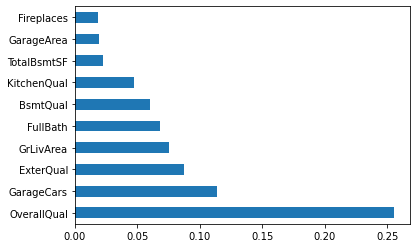

In [50]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

- As we can, the feature OverallQual is the most important independent variable for predicting the sale price. 

#### Standardization:

We have already divided the dataset into features and label, lets standardize now:

In [51]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#### Hold Out Method:

Models will be built on Hold Out method(75/25 training and test split)to gauge how well the Regressor is working.

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=21)

### Model Creation:

Now we are going to build 6 different models. And let's check which one is giving us the best Accuray. Those models are:

1. LinearRegression
2. KNeiborsRegressor
3. RandomForestRegressor
4. GradientBoostingRegressor
5. XGBRegressor
6. DecisionTreeRegressor


### LinearRegression:

In [53]:
#Model Training:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [54]:
#Model Prediction with trained data:
y_lr_pred = lr.predict(x_train)

In [55]:
print("R Square Score of lr:",metrics.r2_score(y_train,y_lr_pred))

R Square Score of lr: 0.8289364014557649


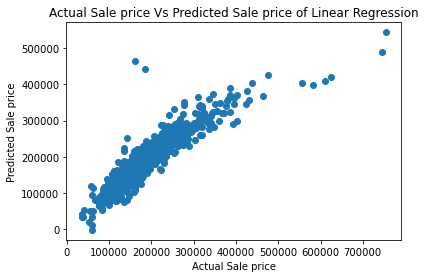

In [56]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_lr_pred)
plt.xlabel('Actual Sale price')
plt.ylabel('Predicted Sale price')
plt.title('Actual Sale price Vs Predicted Sale price of Linear Regression')
plt.show()

In [57]:
# Predicting test data with model:
y_test_lr_pred = lr.predict(x_test)

#### Evaluation of Linear Regression:

In [58]:
lr_accuracy = metrics.r2_score(y_test,y_test_lr_pred)
print("R Square Score of Linear Regression:",lr_accuracy)
print('Accuracy of LR :',lr_accuracy*100)

R Square Score of Linear Regression: 0.8264187856885615
Accuracy of LR : 82.64187856885616


In [59]:
print ('mean absolute error of linear regression is: ',mean_absolute_error(y_test,y_test_lr_pred))

mean absolute error of linear regression is:  21312.54656788011


In [60]:
print ('mean squared error of linear regression is: ',mean_squared_error(y_test,y_test_lr_pred))

mean squared error of linear regression is:  1005935238.9779623


In [61]:
print ('Root mean squared error of linear regression is: ',np.sqrt(mean_squared_error(y_test,y_test_lr_pred)))

Root mean squared error of linear regression is:  31716.482134340848


####  KNeighbors Regressor:

In [62]:
#Model Training:
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)

KNeighborsRegressor()

In [63]:
#Model Prediction with trained data:
y_kn_pred = kn.predict(x_train)

In [64]:
print("R Square Score of kn:",metrics.r2_score(y_train,y_kn_pred))

R Square Score of kn: 0.7747239469798581


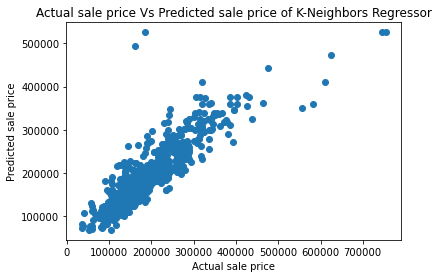

In [65]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_kn_pred)
plt.xlabel('Actual sale price')
plt.ylabel('Predicted sale price')
plt.title('Actual sale price Vs Predicted sale price of K-Neighbors Regressor')
plt.show()

In [66]:
# Predicting test data with model:
y_test_kn_pred = kn.predict(x_test)

#### Evaluation of KNeighbors Regressor:

In [67]:
kn_accuracy = metrics.r2_score(y_test,y_test_kn_pred)
print("R Square Score of K-Neighbors Regressor:",kn_accuracy)
print('Accuracy of knn :',kn_accuracy*100)

R Square Score of K-Neighbors Regressor: 0.7377999863910428
Accuracy of knn : 73.77999863910428


In [68]:
print ('mean absolute error of K-Neighbors Regressor is: ',mean_absolute_error(y_test,y_test_kn_pred))

mean absolute error of K-Neighbors Regressor is:  25893.941754385967


In [69]:
print ('mean squared error of K-Neighbors Regressor is: ',mean_squared_error(y_test,y_test_kn_pred))

mean squared error of K-Neighbors Regressor is:  1519497570.0338242


In [70]:
print ('Root mean squared error of K-Neighbors Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_kn_pred)))

Root mean squared error of K-Neighbors Regressor is:  38980.733318317965


####  Random Forest Regressor:

In [71]:
#Model Training:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [72]:
#Model Prediction with trained data:
y_rf_pred = rf.predict(x_train)

In [73]:
print("R Square Score of Random Forest Regressor:",metrics.r2_score(y_train,y_rf_pred))

R Square Score of Random Forest Regressor: 0.9722155303486426


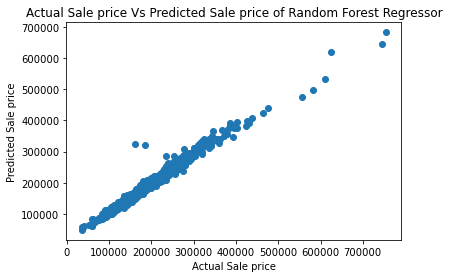

In [74]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_rf_pred)
plt.xlabel('Actual Sale price')
plt.ylabel('Predicted Sale price')
plt.title('Actual Sale price Vs Predicted Sale price of Random Forest Regressor')
plt.show()

In [75]:
# Predicting test data with model:
y_test_rf_pred = rf.predict(x_test)

#### Evaluation of Random Forest Regressor:

In [121]:
rf_accuracy = metrics.r2_score(y_test,y_test_rf_pred)
print("R Square Score of Random Forest Regressor:",rf_accuracy)
print('Accuracy of RFR :',rf_accuracy*100)

R Square Score of Random Forest Regressor: 0.8689810607124068
Accuracy of RFR : 86.89810607124068


In [77]:
print ('mean absolute error of Random Forest Regressor: ',mean_absolute_error(y_test,y_test_rf_pred))

mean absolute error of Random Forest Regressor:  18197.409789473684


In [78]:
print ('mean squared error of Random Forest Regressor is: ',mean_squared_error(y_test,y_test_rf_pred))

mean squared error of Random Forest Regressor is:  759278983.763966


In [79]:
print ('Root mean squared error of Random Forest Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_rf_pred)))

Root mean squared error of Random Forest Regressor is:  27555.017397272062


#### Gradient Boosting Regressor:

In [80]:
# Model Training:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [81]:
#Model Prediction with trained data:
y_gbr_pred = gbr.predict(x_train)

In [82]:
print("R Square Score of Random Forest Regressor:",metrics.r2_score(y_train,y_gbr_pred))

R Square Score of Random Forest Regressor: 0.9727076308294551


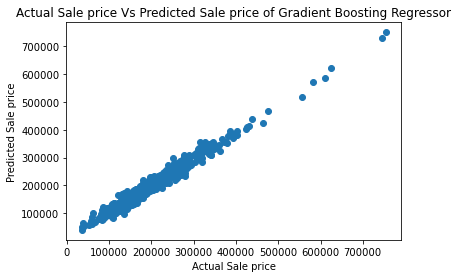

In [83]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_gbr_pred)
plt.xlabel('Actual Sale price')
plt.ylabel('Predicted Sale price')
plt.title('Actual Sale price Vs Predicted Sale price of Gradient Boosting Regressor')
plt.show()

In [84]:
# Predicting test data with model:
y_test_gbr_pred = gbr.predict(x_test)

#### Evaluation of Gradient Boosting Regressor:

In [85]:
gbr_accuracy = metrics.r2_score(y_test,y_test_gbr_pred)
print("R Square Score of Gradient Boosting Regressor:",gbr_accuracy)
print('Accuracy of GBR :',gbr_accuracy*100)

R Square Score of Gradient Boosting Regressor: 0.88926849218328
Accuracy of GBR : 88.926849218328


In [86]:
print ('mean absolute error of Gradient Boosting Regressor: ',mean_absolute_error(y_test,y_test_gbr_pred))

mean absolute error of Gradient Boosting Regressor:  16620.612109942536


In [87]:
print ('mean squared error of Gradient Boosting Regressor is: ',mean_squared_error(y_test,y_test_gbr_pred))

mean squared error of Gradient Boosting Regressor is:  641709566.4404635


In [88]:
print ('Root mean squared error of Gradient Boosting Regressor: ',np.sqrt(mean_squared_error(y_test,y_test_gbr_pred)))

Root mean squared error of Gradient Boosting Regressor:  25331.987021164834


####  Decision Tree Regressor:

In [89]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [90]:
#Model Prediction with trained data:
y_dt_pred = dt.predict(x_train)

In [91]:
print("R Square Score of Decision Tree Regressor: ",metrics.r2_score(y_train,y_dt_pred))

R Square Score of Decision Tree Regressor:  1.0


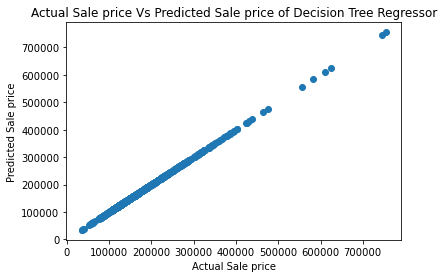

In [92]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_dt_pred)
plt.xlabel('Actual Sale price')
plt.ylabel('Predicted Sale price')
plt.title('Actual Sale price Vs Predicted Sale price of Decision Tree Regressor')
plt.show()

In [93]:
# Predicting test data with model:
y_test_dt_pred = dt.predict(x_test)

#### Evaluation of Decision Tree Regressor:

In [94]:
dt_accuracy = metrics.r2_score(y_test,y_test_dt_pred)
print("R Square Score of Decision Tree Regressor:",dt_accuracy)
print('Accuracy of dt :',dt_accuracy*100)

R Square Score of Decision Tree Regressor: 0.6702675963546934
Accuracy of dt : 67.02675963546933


In [95]:
print ('mean absolute error of Decision Tree Regressor: ',mean_absolute_error(y_test,y_test_dt_pred))

mean absolute error of Decision Tree Regressor:  30269.37192982456


In [96]:
print ('mean squared error of Decision Tree Regressor: ',mean_squared_error(y_test,y_test_dt_pred))

mean squared error of Decision Tree Regressor:  1910860259.708772


In [97]:
print ('Root mean squared error of Decision Tree Regressor: ',np.sqrt(mean_squared_error(y_test,y_test_dt_pred)))

Root mean squared error of Decision Tree Regressor:  43713.38764850846


####   XGBRegressor:

In [98]:
xgb=xgb.XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [99]:
#Model Prediction with trained data:
y_xgb_pred = xgb.predict(x_train)

In [100]:
print("R Square Score of xgb:",metrics.r2_score(y_train,y_xgb_pred))

R Square Score of xgb: 0.9999622677034589


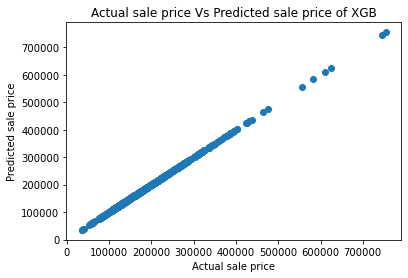

In [101]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_xgb_pred)
plt.xlabel('Actual sale price')
plt.ylabel('Predicted sale price')
plt.title('Actual sale price Vs Predicted sale price of XGB')
plt.show()

In [102]:
# Predicting test data with model:
y_test_xgb_pred = xgb.predict(x_test)

#### Evaluation of XGBRegressor:

In [103]:
xgb_accuracy =metrics.r2_score(y_test,y_test_xgb_pred)
print("R Square Score of xgb:",xgb_accuracy)

R Square Score of xgb: 0.8713810156382261


In [104]:
print ('mean absolute error of XGB: ',mean_absolute_error(y_test,y_test_xgb_pred))

mean absolute error of XGB:  18228.95504385965


In [105]:
print ('mean squared error of  XGB is: ',mean_squared_error(y_test,y_test_xgb_pred))

mean squared error of  XGB is:  745370801.1220999


In [106]:
print ('Root mean squared error of XGB is: ',np.sqrt(mean_squared_error(y_test,y_test_xgb_pred)))

Root mean squared error of XGB is:  27301.47983392292


#### Obsevation: 
Gradient Boosting Regressor has given the best accuracy of 88%. Let's check the Regularization techniques as well.


#### Regularization:

When we use regression models to train some data,there is a good chance the model will overfit the given training dataset. Regularization helps to sort this overfitting problem by restricting the degrees of freedom of a given equation. Regularization constraints the weights of features to avoid overfitting.


#### Regularization using Lasso:

In [107]:
lasscv = LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [108]:
#best alpha parameter
alpha = lasscv.alpha_
alpha

80.52542000392035

In [109]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=80.52542000392035)

In [110]:
lasso_reg.score(x_test,y_test)

0.8324803768089335

#### Regularization Using Ridge:

In [111]:
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [112]:
ridge_alpha= ridgecv.alpha_
ridge_alpha

0.09099999999999998

In [113]:
ridge_model = Ridge(ridge_alpha)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [114]:
ridge_model.score(x_test,y_test)

0.8265674611073467

- Lasso has given the accuracy of 83% and Ridge has given the best accuracy of 82%. Now let's check the cross validation score of each of the models.

#### Evaluating with Cross Validation:

Cross validation is widely used technique to evaluate the performance of Machine Learning Models. Cross Validation divides the data into parts, where one set is used for traning and other is used for testing purpose. And by applying CV, we can understand if our model is overfitting on training data or not.

In [115]:
lr_cv_score = cross_val_score(lr,x_train,y_train,cv=5,scoring='r2')
print(lr_cv_score)
print('mean :',lr_cv_score.mean()*100)

[0.86291888 0.77132651 0.80650897 0.79181119 0.26275072]
mean : 69.90632542522972


In [116]:
kn_cv_score = cross_val_score(kn,x_train,y_train,cv=5,scoring='r2')
print(kn_cv_score)
print('mean :',kn_cv_score.mean()*100)

[0.74945821 0.70858409 0.6773249  0.69911523 0.52357211]
mean : 67.16109083655051


In [122]:
rf_cv_score = cross_val_score(rf,x_train,y_train,cv=5,scoring='r2')
print(rf_cv_score)
print('mean :',rf_cv_score.mean()*100)

[0.87780178 0.85024027 0.87410016 0.86731047 0.51291067]
mean : 79.64726708913354


In [118]:
gbr_cv_score = cross_val_score(gbr,x_train,y_train,cv=5,scoring='r2')
print(gbr_cv_score)
print('mean :',gbr_cv_score.mean()*100)

[0.89050102 0.87394367 0.89568117 0.88210729 0.38369899]
mean : 78.51864278920642


In [119]:
dt_cv_score = cross_val_score(dt,x_train,y_train,cv=5,scoring='r2')
print(dt_cv_score)
print('mean :',dt_cv_score.mean()*100)

[0.67964745 0.80461181 0.80159484 0.75730083 0.02784027]
mean : 61.419903999973755


In [120]:
xgb_cv_score = cross_val_score(xgb,x_train,y_train,cv=5,scoring='r2')
print(xgb_cv_score)
print('mean :',xgb_cv_score.mean()*100)

[0.8637287  0.85926868 0.855174   0.87416574 0.38639262]
mean : 76.7745947107914


- As we can see the difference between accuracy score and cross validation score of Random Forest Regressor is least. Hence, we can use RFR for hyperparameter tuning.

In [128]:
rfr = RandomForestRegressor()
params={'n_estimators':[x for x in range(10,100)],
        'criterion': ['mse','mae'],
       'max_features':['auto', 'sqrt','log2'],
       'max_depth':[x for x in range(1,20)],
       'min_samples_split':[0.1,1.0,10],
       'min_samples_leaf':[1,3,4]}

rnd_srch= RandomizedSearchCV(rfr,cv=5,param_distributions=params)
rnd_srch.fit(x_train,y_train)
rnd_srch.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=11, max_features='sqrt',
                      min_samples_split=10, n_estimators=30)

- As we can see, the best hyperparameters are there like, criterion = 'mae', max_depth = 11, max_features = 'sqrt',min_samples_split = 10, n_estimators = 30

In [129]:
rfr = RandomForestRegressor(max_depth=19,max_features='sqrt',criterion='mae', min_samples_split=10,
                          n_estimators=41) 
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

In [130]:
print("*** Accuracy Post Tuning***")
print(metrics.r2_score(y_test,y_pred)*100)

*** Accuracy Post Tuning***
86.00628644714057


#### Observation:

After hyperparameter tuning with best parameters of Random Forest Regressor is giving the best accuracy of 86%. So, we are going to save RFR model and will do the predictions as well.


Let's check the graph after hyperparameter tuning as well.

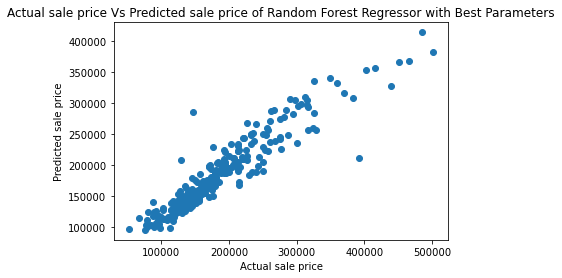

In [131]:
# Checking Actual sales Vs Predicted price using Graph after Hyperparameter tuning:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual sale price')
plt.ylabel('Predicted sale price')
plt.title('Actual sale price Vs Predicted sale price of Random Forest Regressor with Best Parameters')
plt.show()

#### Let's do prediction using the best model : 

In [132]:
X_test=test  # reinstantiating test column into a variable 

In [147]:
# Doing the prediction using the test dataset
rfr.fit(x_train, y_train)
rfr_pred = rfr.predict(X_test)
score=rfr.score(x_train,y_train)
print(score,rfr,':')

0.9285023383692875 RandomForestRegressor(criterion='mae', max_depth=19, max_features='sqrt',
                      min_samples_split=10, n_estimators=41) :


In [142]:
#model(test dataset) prediction using rfr
x_predict = list(rfr.predict(X_test))
df_new = {'predicted_values':x_predict[0:200],'orignal_values':y_test[0:200]}
print(pd.DataFrame(df_new))

      predicted_values  orignal_values
949      352053.975610          171000
189      190534.243902          141000
831      266621.365854           75500
422      169136.268293          167900
428      257481.890244          175000
...                ...             ...
555       83927.804878          194700
126      167110.170732          143000
185      194889.512195          182000
562      121349.707317          213250
1060     194955.987805          117000

[200 rows x 2 columns]


- Let's save the model.

In [148]:
#importing joblib
import joblib

joblib.dump(rfr,'house_price_pred.obj')

# SAVING THE MODEL

['house_price_pred.obj']

In [149]:
rfr_from_joblib=joblib.load('house_price_pred.obj')
rfr_from_joblib.predict(X_test)

#TESTING THE SAVED MODEL

array([330009.31707317, 196265.45121951, 261351.32926829, 155700.18292683,
       235867.02439024,  95139.96341463, 148568.02439024, 313085.31707317,
       223081.08536585, 169958.92682927,  89586.87804878, 146378.14634146,
       116877.20731707, 197158.03658537, 333264.34146341, 125710.67073171,
       123464.63414634, 130059.40243902, 172002.95121951, 199029.08536585,
       153866.07317073, 155506.12195122, 148892.68292683, 124477.36585366,
       102354.87804878, 134924.80487805, 177824.70731707, 144892.07317073,
       173357.92682927, 114361.7804878 , 165467.04878049, 192173.26829268,
       236039.31707317, 161361.5       , 120316.07317073, 176163.93902439,
       196285.53658537, 124063.63414634, 161889.46341463, 154368.93902439,
       113281.70731707, 310651.04878049, 210707.57317073, 179711.25609756,
       140900.48780488, 141834.14634146, 125208.29268293, 110693.75609756,
       202063.87804878, 317499.1097561 , 154012.17073171, 212737.2195122 ,
       103117.31707317,  

#### Conclusion:
As a house is one of the important estasblishment for a human or any living being, it is very important to understand that which of the features are related with sale price of the house because someone is selling and someone is obviously buying that house. So, Real Estate companies should be aware of what are the main things that people are looking for their house. So, in this dataset we have got all the features that are related to the houses and there is the sale price of those houses. Now, we have analyzed all the features extensively and got some idea about the house-price relation.

- But before that we have checked the null values and we have seen that both the train and test datasets are having missing data that we have taken care of by using mean and mode, and some of the columns like 'PoolQC', 'Fence','MiscFeature','GarageYrBlt' these we needed to drop.
- in train data set we have checked the relation between the feature and the label also. Like, yearbuilt, YearRemodAdd(Remodel date), MasVnrArea , BsmtFinSF1 (Type 1 finished square feet), BsmtFinSF2( Type 2 finished square fee), BsmtUnfSF (Unfinished square feet of basement area), TotalBsmtSF (Total square feet of basement area), 1stFlrSF, 2ndFlrSF,GrlivArea(Above grade (ground) living area square feet), GarageYrBlt(Year garage was built),WoodDeckSF (Wood deck area in square feet),OpenPorchSF(Open porch area in square feet),EnclosedPorch(Enclosed porch area in square feet) features are having somewhat positive linear relation with sale price. 
- We have encoded the nominal data by using Ordinal Encoder.
- Then we have made 6 different models by using the train data and have seen that Random Forest Regressor has given the best accuracy of 84% and we have choose this model because the difference between the CV and accuracy score of Random Forest Regressor was least.
- Then we have used criterion = 'mae', max_depth = 11, max_features = 'sqrt',min_samples_split = 10, n_estimators = 30 these hyperparameters to obtain the best accuracy of RFR. And the accuracy has increased to 86%
- and the most important feature that impacted the most on sale price is OverallQual.

 
